 # Age and Gender Detection

### Importing Necessary libraries

In [1]:
!pip install opencv--python

In [91]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [3]:
!pip install tensorflow

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Input, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta,Adamax, RMSprop
from tensorflow.keras.regularizers import l2

### Extract data from dataset

In [5]:
fldr = "./UTKFace"

In [6]:
import os
files = os.listdir(fldr)

In [7]:
ages = []
genders = []
images = []
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total = fldr+'/'+fle
    print(total)
    
    image = cv2.imread(total)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

./UTKFace/110_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/110_0_2_20170112223734562.jpg.chip.jpg
./UTKFace/110_1_0_20170120134701015.jpg.chip.jpg
./UTKFace/110_1_1_20170110155201038.jpg.chip.jpg
./UTKFace/110_1_3_20170110155139762.jpg.chip.jpg
./UTKFace/111_1_0_20170120134646399.jpg.chip.jpg
./UTKFace/115_1_0_20170120134725990.jpg.chip.jpg
./UTKFace/115_1_0_20170120134725991.jpg.chip.jpg
./UTKFace/115_1_1_20170112213257263.jpg.chip.jpg
./UTKFace/116_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/116_1_0_20170120134921760.jpg.chip.jpg
./UTKFace/116_1_2_20170112220255503.jpg.chip.jpg
./UTKFace/116_1_3_20170120134744096.jpg.chip.jpg
./UTKFace/11_0_0_20170103200509559.jpg.chip.jpg
./UTKFace/11_0_0_20170103200824775.jpg.chip.jpg
./UTKFace/11_0_0_20170104012556563.jpg.chip.jpg
./UTKFace/11_0_0_20170110220408722.jpg.chip.jpg
./UTKFace/11_0_0_20170110220453002.jpg.chip.jpg
./UTKFace/11_0_0_20170110220500946.jpg.chip.jpg
./UTKFace/11_0_0_20170110220518578.jpg.chip.jpg
./UTKFace/11_0_0_2017011022

./UTKFace/12_1_0_20170117154622148.jpg.chip.jpg
./UTKFace/12_1_0_20170117181943783.jpg.chip.jpg
./UTKFace/12_1_0_20170117193148948.jpg.chip.jpg
./UTKFace/12_1_1_20170109204024091.jpg.chip.jpg
./UTKFace/12_1_1_20170109204809866.jpg.chip.jpg
./UTKFace/12_1_1_20170109214204794.jpg.chip.jpg
./UTKFace/12_1_1_20170109214642524.jpg.chip.jpg
./UTKFace/12_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/12_1_1_20170116225216163.jpg.chip.jpg
./UTKFace/12_1_1_20170116233629728.jpg.chip.jpg
./UTKFace/12_1_2_20170103200649030.jpg.chip.jpg
./UTKFace/12_1_2_20170103200922406.jpg.chip.jpg
./UTKFace/12_1_2_20170103201240488.jpg.chip.jpg
./UTKFace/12_1_2_20170104012405785.jpg.chip.jpg
./UTKFace/12_1_2_20170109203838187.jpg.chip.jpg
./UTKFace/12_1_2_20170109214246240.jpg.chip.jpg
./UTKFace/12_1_2_20170116190115810.jpg.chip.jpg
./UTKFace/12_1_2_20170116194059753.jpg.chip.jpg
./UTKFace/12_1_2_20170117145333545.jpg.chip.jpg
./UTKFace/12_1_2_20170117165908225.jpg.chip.jpg
./UTKFace/12_1_2_20170117194013371.jpg.c

./UTKFace/14_0_3_20170104013434256.jpg.chip.jpg
./UTKFace/14_0_3_20170104225245755.jpg.chip.jpg
./UTKFace/14_0_3_20170104225533201.jpg.chip.jpg
./UTKFace/14_0_3_20170104225721488.jpg.chip.jpg
./UTKFace/14_0_3_20170104225858160.jpg.chip.jpg
./UTKFace/14_0_3_20170104230143521.jpg.chip.jpg
./UTKFace/14_0_3_20170109131758363.jpg.chip.jpg
./UTKFace/14_0_3_20170117181642515.jpg.chip.jpg
./UTKFace/14_0_4_20170103200528094.jpg.chip.jpg
./UTKFace/14_0_4_20170103200608359.jpg.chip.jpg
./UTKFace/14_0_4_20170103200837103.jpg.chip.jpg
./UTKFace/14_0_4_20170103201105568.jpg.chip.jpg
./UTKFace/14_0_4_20170103201644927.jpg.chip.jpg
./UTKFace/14_0_4_20170103205138666.jpg.chip.jpg
./UTKFace/14_0_4_20170113145202254.jpg.chip.jpg
./UTKFace/14_0_4_20170117192737955.jpg.chip.jpg
./UTKFace/14_0_4_20170117193432868.jpg.chip.jpg
./UTKFace/14_0_4_20170117204503401.jpg.chip.jpg
./UTKFace/14_1_0_20170103163023120.jpg.chip.jpg
./UTKFace/14_1_0_20170103183504594.jpg.chip.jpg
./UTKFace/14_1_0_20170103200702463.jpg.c

./UTKFace/15_0_3_20170105183235993.jpg.chip.jpg
./UTKFace/15_0_3_20170110225627090.jpg.chip.jpg
./UTKFace/15_0_4_20170103201002253.jpg.chip.jpg
./UTKFace/15_0_4_20170103201013615.jpg.chip.jpg
./UTKFace/15_0_4_20170103233214059.jpg.chip.jpg
./UTKFace/15_0_4_20170104011201568.jpg.chip.jpg
./UTKFace/15_0_4_20170110232416743.jpg.chip.jpg
./UTKFace/15_1_0_20170103200925950.jpg.chip.jpg
./UTKFace/15_1_0_20170103201148510.jpg.chip.jpg
./UTKFace/15_1_0_20170103201844088.jpg.chip.jpg
./UTKFace/15_1_0_20170104013418578.jpg.chip.jpg
./UTKFace/15_1_0_20170104013549874.jpg.chip.jpg
./UTKFace/15_1_0_20170105000525758.jpg.chip.jpg
./UTKFace/15_1_0_20170109203414090.jpg.chip.jpg
./UTKFace/15_1_0_20170109203912357.jpg.chip.jpg
./UTKFace/15_1_0_20170109204142217.jpg.chip.jpg
./UTKFace/15_1_0_20170109204150999.jpg.chip.jpg
./UTKFace/15_1_0_20170109204203014.jpg.chip.jpg
./UTKFace/15_1_0_20170109204210842.jpg.chip.jpg
./UTKFace/15_1_0_20170109204237329.jpg.chip.jpg
./UTKFace/15_1_0_20170109204314585.jpg.c

./UTKFace/16_0_0_20170110232301837.jpg.chip.jpg
./UTKFace/16_0_0_20170110232302818.jpg.chip.jpg
./UTKFace/16_0_0_20170110232307970.jpg.chip.jpg
./UTKFace/16_0_0_20170110232313053.jpg.chip.jpg
./UTKFace/16_0_0_20170110232315216.jpg.chip.jpg
./UTKFace/16_0_0_20170110232316211.jpg.chip.jpg
./UTKFace/16_0_0_20170110232332618.jpg.chip.jpg
./UTKFace/16_0_0_20170110232429214.jpg.chip.jpg
./UTKFace/16_0_0_20170110232432328.jpg.chip.jpg
./UTKFace/16_0_0_20170110232434079.jpg.chip.jpg
./UTKFace/16_0_0_20170110232444834.jpg.chip.jpg
./UTKFace/16_0_0_20170110232450588.jpg.chip.jpg
./UTKFace/16_0_0_20170110232451479.jpg.chip.jpg
./UTKFace/16_0_0_20170110232528586.jpg.chip.jpg
./UTKFace/16_0_0_20170110232605131.jpg.chip.jpg
./UTKFace/16_0_0_20170110232611516.jpg.chip.jpg
./UTKFace/16_0_0_20170110232613101.jpg.chip.jpg
./UTKFace/16_0_0_20170110232647979.jpg.chip.jpg
./UTKFace/16_0_0_20170110232714508.jpg.chip.jpg
./UTKFace/16_0_0_20170110232724382.jpg.chip.jpg
./UTKFace/16_0_0_20170110232725516.jpg.c

./UTKFace/17_0_0_20170103201534007.jpg.chip.jpg
./UTKFace/17_0_0_20170104003852806.jpg.chip.jpg
./UTKFace/17_0_0_20170104011408904.jpg.chip.jpg
./UTKFace/17_0_0_20170104011953696.jpg.chip.jpg
./UTKFace/17_0_0_20170104230556561.jpg.chip.jpg
./UTKFace/17_0_0_20170105183357879.jpg.chip.jpg
./UTKFace/17_0_0_20170105183607439.jpg.chip.jpg
./UTKFace/17_0_0_20170105183615673.jpg.chip.jpg
./UTKFace/17_0_0_20170110231210547.jpg.chip.jpg
./UTKFace/17_0_0_20170110231233724.jpg.chip.jpg
./UTKFace/17_0_0_20170110231535087.jpg.chip.jpg
./UTKFace/17_0_0_20170110231605793.jpg.chip.jpg
./UTKFace/17_0_0_20170110231615651.jpg.chip.jpg
./UTKFace/17_0_0_20170110231640217.jpg.chip.jpg
./UTKFace/17_0_0_20170110231711354.jpg.chip.jpg
./UTKFace/17_0_0_20170110231719325.jpg.chip.jpg
./UTKFace/17_0_0_20170110231748137.jpg.chip.jpg
./UTKFace/17_0_0_20170110231752726.jpg.chip.jpg
./UTKFace/17_0_0_20170110231820806.jpg.chip.jpg
./UTKFace/17_0_0_20170110231830374.jpg.chip.jpg
./UTKFace/17_0_0_20170110232017297.jpg.c

./UTKFace/18_0_0_20170110232624418.jpg.chip.jpg
./UTKFace/18_0_0_20170117133102084.jpg.chip.jpg
./UTKFace/18_0_0_20170117135529944.jpg.chip.jpg
./UTKFace/18_0_0_20170117135727463.jpg.chip.jpg
./UTKFace/18_0_0_20170117140123048.jpg.chip.jpg
./UTKFace/18_0_0_20170117140126568.jpg.chip.jpg
./UTKFace/18_0_0_20170117140129888.jpg.chip.jpg
./UTKFace/18_0_0_20170117140132816.jpg.chip.jpg
./UTKFace/18_0_0_20170117140723690.jpg.chip.jpg
./UTKFace/18_0_0_20170117140759528.jpg.chip.jpg
./UTKFace/18_0_0_20170117175618980.jpg.chip.jpg
./UTKFace/18_0_0_20170117175643037.jpg.chip.jpg
./UTKFace/18_0_0_20170117193153029.jpg.chip.jpg
./UTKFace/18_0_1_20170109214734802.jpg.chip.jpg
./UTKFace/18_0_1_20170113132623905.jpg.chip.jpg
./UTKFace/18_0_1_20170113132626633.jpg.chip.jpg
./UTKFace/18_0_1_20170113132627873.jpg.chip.jpg
./UTKFace/18_0_1_20170113132629362.jpg.chip.jpg
./UTKFace/18_0_1_20170113135429329.jpg.chip.jpg
./UTKFace/18_0_1_20170113151656761.jpg.chip.jpg
./UTKFace/18_0_1_20170113175555906.jpg.c

./UTKFace/18_1_1_20170114030232014.jpg.chip.jpg
./UTKFace/18_1_1_20170114030253404.jpg.chip.jpg
./UTKFace/18_1_1_20170114030258171.jpg.chip.jpg
./UTKFace/18_1_1_20170114030334837.jpg.chip.jpg
./UTKFace/18_1_1_20170114030339628.jpg.chip.jpg
./UTKFace/18_1_1_20170114030424059.jpg.chip.jpg
./UTKFace/18_1_1_20170116000609057.jpg.chip.jpg
./UTKFace/18_1_1_20170116164854853.jpg.chip.jpg
./UTKFace/18_1_1_20170116211857195.jpg.chip.jpg
./UTKFace/18_1_1_20170117140105352.jpg.chip.jpg
./UTKFace/18_1_1_20170117140201823.jpg.chip.jpg
./UTKFace/18_1_1_20170117140433352.jpg.chip.jpg
./UTKFace/18_1_2_20170102234846172.jpg.chip.jpg
./UTKFace/18_1_2_20170102234919571.jpg.chip.jpg
./UTKFace/18_1_2_20170103223049176.jpg.chip.jpg
./UTKFace/18_1_2_20170104020418380.jpg.chip.jpg
./UTKFace/18_1_2_20170104020424141.jpg.chip.jpg
./UTKFace/18_1_2_20170104020428878.jpg.chip.jpg
./UTKFace/18_1_2_20170104020841204.jpg.chip.jpg
./UTKFace/18_1_2_20170105183417710.jpg.chip.jpg
./UTKFace/18_1_2_20170105183420463.jpg.c

./UTKFace/1_0_0_20161219194756275.jpg.chip.jpg
./UTKFace/1_0_0_20161219195753899.jpg.chip.jpg
./UTKFace/1_0_0_20161219200139603.jpg.chip.jpg
./UTKFace/1_0_0_20161219200250923.jpg.chip.jpg
./UTKFace/1_0_0_20161219200338012.jpg.chip.jpg
./UTKFace/1_0_0_20161219202455708.jpg.chip.jpg
./UTKFace/1_0_0_20161219203009924.jpg.chip.jpg
./UTKFace/1_0_0_20161219203503252.jpg.chip.jpg
./UTKFace/1_0_0_20161219203657925.jpg.chip.jpg
./UTKFace/1_0_0_20161219204512212.jpg.chip.jpg
./UTKFace/1_0_0_20161219204552941.jpg.chip.jpg
./UTKFace/1_0_0_20161219204741557.jpg.chip.jpg
./UTKFace/1_0_0_20161219204759412.jpg.chip.jpg
./UTKFace/1_0_0_20161219205141196.jpg.chip.jpg
./UTKFace/1_0_0_20161219205145821.jpg.chip.jpg
./UTKFace/1_0_0_20161219205230805.jpg.chip.jpg
./UTKFace/1_0_0_20161219205817093.jpg.chip.jpg
./UTKFace/1_0_0_20161219210307125.jpg.chip.jpg
./UTKFace/1_0_0_20161219211413621.jpg.chip.jpg
./UTKFace/1_0_0_20161219211607517.jpg.chip.jpg
./UTKFace/1_0_0_20161219212409141.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_2_20161219155411381.jpg.chip.jpg
./UTKFace/1_0_2_20161219155413397.jpg.chip.jpg
./UTKFace/1_0_2_20161219155542229.jpg.chip.jpg
./UTKFace/1_0_2_20161219155655085.jpg.chip.jpg
./UTKFace/1_0_2_20161219155659165.jpg.chip.jpg
./UTKFace/1_0_2_20161219155701277.jpg.chip.jpg
./UTKFace/1_0_2_20161219155744942.jpg.chip.jpg
./UTKFace/1_0_2_20161219155748349.jpg.chip.jpg
./UTKFace/1_0_2_20161219155759221.jpg.chip.jpg
./UTKFace/1_0_2_20161219155802845.jpg.chip.jpg
./UTKFace/1_0_2_20161219155822605.jpg.chip.jpg
./UTKFace/1_0_2_20161219155850477.jpg.chip.jpg
./UTKFace/1_0_2_20161219155854085.jpg.chip.jpg
./UTKFace/1_0_2_20161219155855829.jpg.chip.jpg
./UTKFace/1_0_2_20161219155857576.jpg.chip.jpg
./UTKFace/1_0_2_20161219155859061.jpg.chip.jpg
./UTKFace/1_0_2_20161219155902022.jpg.chip.jpg
./UTKFace/1_0_2_20161219160107597.jpg.chip.jpg
./UTKFace/1_0_2_20161219160450054.jpg.chip.jpg
./UTKFace/1_0_2_20161219160747326.jpg.chip.jpg
./UTKFace/1_0_2_20161219160949398.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_2_20161219212510086.jpg.chip.jpg
./UTKFace/1_0_2_20161219212516942.jpg.chip.jpg
./UTKFace/1_0_2_20161219212535950.jpg.chip.jpg
./UTKFace/1_0_2_20161219212555694.jpg.chip.jpg
./UTKFace/1_0_2_20161219212557190.jpg.chip.jpg
./UTKFace/1_0_2_20161219212648582.jpg.chip.jpg
./UTKFace/1_0_2_20161219212700566.jpg.chip.jpg
./UTKFace/1_0_2_20161219212824950.jpg.chip.jpg
./UTKFace/1_0_2_20161219212929702.jpg.chip.jpg
./UTKFace/1_0_2_20161219213454832.jpg.chip.jpg
./UTKFace/1_0_2_20161219215433975.jpg.chip.jpg
./UTKFace/1_0_2_20161219220247471.jpg.chip.jpg
./UTKFace/1_0_2_20161219220503943.jpg.chip.jpg
./UTKFace/1_0_2_20161219221744255.jpg.chip.jpg
./UTKFace/1_0_2_20161219221751759.jpg.chip.jpg
./UTKFace/1_0_2_20161219221816327.jpg.chip.jpg
./UTKFace/1_0_2_20161219221845695.jpg.chip.jpg
./UTKFace/1_0_2_20161219221908887.jpg.chip.jpg
./UTKFace/1_0_2_20161219221912695.jpg.chip.jpg
./UTKFace/1_0_2_20161219221919847.jpg.chip.jpg
./UTKFace/1_0_2_20161219222014119.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_3_20161220223247506.jpg.chip.jpg
./UTKFace/1_0_3_20161220223250813.jpg.chip.jpg
./UTKFace/1_0_3_20170104230640081.jpg.chip.jpg
./UTKFace/1_0_4_20161219195147803.jpg.chip.jpg
./UTKFace/1_0_4_20161221192548675.jpg.chip.jpg
./UTKFace/1_0_4_20161221192552629.jpg.chip.jpg
./UTKFace/1_0_4_20161221192554517.jpg.chip.jpg
./UTKFace/1_0_4_20161221192555965.jpg.chip.jpg
./UTKFace/1_0_4_20161221192558436.jpg.chip.jpg
./UTKFace/1_0_4_20161221192601052.jpg.chip.jpg
./UTKFace/1_0_4_20161221192604164.jpg.chip.jpg
./UTKFace/1_0_4_20161221192855037.jpg.chip.jpg
./UTKFace/1_0_4_20161221193016140.jpg.chip.jpg
./UTKFace/1_0_4_20161221193041157.jpg.chip.jpg
./UTKFace/1_0_4_20161221193434166.jpg.chip.jpg
./UTKFace/1_0_4_20161221193446478.jpg.chip.jpg
./UTKFace/1_0_4_20161221193531198.jpg.chip.jpg
./UTKFace/1_0_4_20161221193604223.jpg.chip.jpg
./UTKFace/1_0_4_20161221193606310.jpg.chip.jpg
./UTKFace/1_0_4_20161221194937848.jpg.chip.jpg
./UTKFace/1_0_4_20161221195030936.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_1_0_20170109193022683.jpg.chip.jpg
./UTKFace/1_1_0_20170109193026103.jpg.chip.jpg
./UTKFace/1_1_0_20170109193120893.jpg.chip.jpg
./UTKFace/1_1_0_20170109193401456.jpg.chip.jpg
./UTKFace/1_1_0_20170109193407724.jpg.chip.jpg
./UTKFace/1_1_0_20170109193408973.jpg.chip.jpg
./UTKFace/1_1_0_20170109193427612.jpg.chip.jpg
./UTKFace/1_1_0_20170109193455503.jpg.chip.jpg
./UTKFace/1_1_0_20170109193704430.jpg.chip.jpg
./UTKFace/1_1_0_20170109193717283.jpg.chip.jpg
./UTKFace/1_1_0_20170109193726686.jpg.chip.jpg
./UTKFace/1_1_0_20170109193830378.jpg.chip.jpg
./UTKFace/1_1_0_20170109194032969.jpg.chip.jpg
./UTKFace/1_1_0_20170109194038813.jpg.chip.jpg
./UTKFace/1_1_0_20170109194117865.jpg.chip.jpg
./UTKFace/1_1_0_20170109194131667.jpg.chip.jpg
./UTKFace/1_1_0_20170109194137393.jpg.chip.jpg
./UTKFace/1_1_0_20170109194142307.jpg.chip.jpg
./UTKFace/1_1_0_20170109194143550.jpg.chip.jpg
./UTKFace/1_1_0_20170109194146279.jpg.chip.jpg
./UTKFace/1_1_0_20170109194212472.jpg.chip.jpg
./UTKFace/1_1

./UTKFace/1_1_2_20161219221253335.jpg.chip.jpg
./UTKFace/1_1_2_20161219221706807.jpg.chip.jpg
./UTKFace/1_1_2_20161219221915303.jpg.chip.jpg
./UTKFace/1_1_2_20161219221943799.jpg.chip.jpg
./UTKFace/1_1_2_20161219222021335.jpg.chip.jpg
./UTKFace/1_1_2_20161219222144951.jpg.chip.jpg
./UTKFace/1_1_2_20161219222154119.jpg.chip.jpg
./UTKFace/1_1_2_20161219222703503.jpg.chip.jpg
./UTKFace/1_1_2_20161219222758263.jpg.chip.jpg
./UTKFace/1_1_2_20161219222801647.jpg.chip.jpg
./UTKFace/1_1_2_20161220220018380.jpg.chip.jpg
./UTKFace/1_1_2_20161221192810669.jpg.chip.jpg
./UTKFace/1_1_2_20170109190752762.jpg.chip.jpg
./UTKFace/1_1_2_20170109193557242.jpg.chip.jpg
./UTKFace/1_1_2_20170109193844660.jpg.chip.jpg
./UTKFace/1_1_2_20170109194007910.jpg.chip.jpg
./UTKFace/1_1_2_20170117192827229.jpg.chip.jpg
./UTKFace/1_1_3_20161219224454728.jpg.chip.jpg
./UTKFace/1_1_3_20161219224457585.jpg.chip.jpg
./UTKFace/1_1_3_20161219224458872.jpg.chip.jpg
./UTKFace/1_1_3_20161219224539488.jpg.chip.jpg
./UTKFace/1_1

./UTKFace/1_1_4_20170103212217155.jpg.chip.jpg
./UTKFace/1_1_4_20170103212653844.jpg.chip.jpg
./UTKFace/1_1_4_20170103213044557.jpg.chip.jpg
./UTKFace/1_1_4_20170109191515501.jpg.chip.jpg
./UTKFace/1_1_4_20170109193346573.jpg.chip.jpg
./UTKFace/1_1_4_20170109193938953.jpg.chip.jpg
./UTKFace/1_1_4_20170109194502921.jpg.chip.jpg
./UTKFace/1_1_4_20170117192625477.jpg.chip.jpg
./UTKFace/1_1_4_20170117192656755.jpg.chip.jpg
./UTKFace/20_0_0_20170104020603909.jpg.chip.jpg
./UTKFace/20_0_0_20170104230025073.jpg.chip.jpg
./UTKFace/20_0_0_20170104230042553.jpg.chip.jpg
./UTKFace/20_0_0_20170104230048181.jpg.chip.jpg
./UTKFace/20_0_0_20170104230051977.jpg.chip.jpg
./UTKFace/20_0_0_20170104230054071.jpg.chip.jpg
./UTKFace/20_0_0_20170105161704786.jpg.chip.jpg
./UTKFace/20_0_0_20170105161706251.jpg.chip.jpg
./UTKFace/20_0_0_20170105183430767.jpg.chip.jpg
./UTKFace/20_0_0_20170105184038831.jpg.chip.jpg
./UTKFace/20_0_0_20170110231653536.jpg.chip.jpg
./UTKFace/20_0_0_20170110232156775.jpg.chip.jpg
.

./UTKFace/20_1_0_20170119153717575.jpg.chip.jpg
./UTKFace/20_1_0_20170119153738075.jpg.chip.jpg
./UTKFace/20_1_0_20170120140127200.jpg.chip.jpg
./UTKFace/20_1_1_20170105002448621.jpg.chip.jpg
./UTKFace/20_1_1_20170112191224819.jpg.chip.jpg
./UTKFace/20_1_1_20170112191230798.jpg.chip.jpg
./UTKFace/20_1_1_20170112191255227.jpg.chip.jpg
./UTKFace/20_1_1_20170112191323933.jpg.chip.jpg
./UTKFace/20_1_1_20170112192922677.jpg.chip.jpg
./UTKFace/20_1_1_20170112205029995.jpg.chip.jpg
./UTKFace/20_1_1_20170112230604949.jpg.chip.jpg
./UTKFace/20_1_1_20170112230742277.jpg.chip.jpg
./UTKFace/20_1_1_20170112231407182.jpg.chip.jpg
./UTKFace/20_1_1_20170112231413086.jpg.chip.jpg
./UTKFace/20_1_1_20170112231449708.jpg.chip.jpg
./UTKFace/20_1_1_20170112231738487.jpg.chip.jpg
./UTKFace/20_1_1_20170112231743279.jpg.chip.jpg
./UTKFace/20_1_1_20170112231744071.jpg.chip.jpg
./UTKFace/20_1_1_20170112231844733.jpg.chip.jpg
./UTKFace/20_1_1_20170113005339990.jpg.chip.jpg
./UTKFace/20_1_1_20170113005418295.jpg.c

./UTKFace/21_0_1_20170116215541940.jpg.chip.jpg
./UTKFace/21_0_1_20170116215700416.jpg.chip.jpg
./UTKFace/21_0_1_20170117135810975.jpg.chip.jpg
./UTKFace/21_0_1_20170117142001073.jpg.chip.jpg
./UTKFace/21_0_1_20170117195323136.jpg.chip.jpg
./UTKFace/21_0_1_20170120133302908.jpg.chip.jpg
./UTKFace/21_0_1_20170120133601830.jpg.chip.jpg
./UTKFace/21_0_2_20170103234754659.jpg.chip.jpg
./UTKFace/21_0_2_20170107213417643.jpg.chip.jpg
./UTKFace/21_0_2_20170112192931470.jpg.chip.jpg
./UTKFace/21_0_2_20170116161452673.jpg.chip.jpg
./UTKFace/21_0_2_20170116164809162.jpg.chip.jpg
./UTKFace/21_0_2_20170116165220655.jpg.chip.jpg
./UTKFace/21_0_2_20170116170638620.jpg.chip.jpg
./UTKFace/21_0_2_20170116170741864.jpg.chip.jpg
./UTKFace/21_0_2_20170116170907317.jpg.chip.jpg
./UTKFace/21_0_2_20170117193634310.jpg.chip.jpg
./UTKFace/21_0_3_20161220221819298.jpg.chip.jpg
./UTKFace/21_0_3_20170104214322765.jpg.chip.jpg
./UTKFace/21_0_3_20170104225749698.jpg.chip.jpg
./UTKFace/21_0_3_20170104225826937.jpg.c

./UTKFace/21_1_2_20170105002530429.jpg.chip.jpg
./UTKFace/21_1_2_20170105183505385.jpg.chip.jpg
./UTKFace/21_1_2_20170109132112364.jpg.chip.jpg
./UTKFace/21_1_2_20170109213056053.jpg.chip.jpg
./UTKFace/21_1_2_20170116163803744.jpg.chip.jpg
./UTKFace/21_1_2_20170116163813584.jpg.chip.jpg
./UTKFace/21_1_2_20170116164805815.jpg.chip.jpg
./UTKFace/21_1_2_20170116165009080.jpg.chip.jpg
./UTKFace/21_1_2_20170116170625776.jpg.chip.jpg
./UTKFace/21_1_2_20170116170710327.jpg.chip.jpg
./UTKFace/21_1_2_20170116170727930.jpg.chip.jpg
./UTKFace/21_1_2_20170116170750376.jpg.chip.jpg
./UTKFace/21_1_2_20170116170754019.jpg.chip.jpg
./UTKFace/21_1_2_20170116170801014.jpg.chip.jpg
./UTKFace/21_1_2_20170116170950166.jpg.chip.jpg
./UTKFace/21_1_2_20170116170952380.jpg.chip.jpg
./UTKFace/21_1_2_20170116171009058.jpg.chip.jpg
./UTKFace/21_1_2_20170116171010589.jpg.chip.jpg
./UTKFace/21_1_2_20170116171016270.jpg.chip.jpg
./UTKFace/21_1_2_20170116171134381.jpg.chip.jpg
./UTKFace/21_1_2_20170116171144567.jpg.c

./UTKFace/22_0_1_20170113193211629.jpg.chip.jpg
./UTKFace/22_0_1_20170113195509981.jpg.chip.jpg
./UTKFace/22_0_1_20170113195511076.jpg.chip.jpg
./UTKFace/22_0_1_20170114030000815.jpg.chip.jpg
./UTKFace/22_0_1_20170114032119562.jpg.chip.jpg
./UTKFace/22_0_1_20170114032251671.jpg.chip.jpg
./UTKFace/22_0_1_20170114033114683.jpg.chip.jpg
./UTKFace/22_0_1_20170114033132392.jpg.chip.jpg
./UTKFace/22_0_1_20170114033134437.jpg.chip.jpg
./UTKFace/22_0_1_20170114033210195.jpg.chip.jpg
./UTKFace/22_0_1_20170114033213586.jpg.chip.jpg
./UTKFace/22_0_1_20170116144518064.jpg.chip.jpg
./UTKFace/22_0_1_20170116214330918.jpg.chip.jpg
./UTKFace/22_0_1_20170117020724763.jpg.chip.jpg
./UTKFace/22_0_2_20170104015701971.jpg.chip.jpg
./UTKFace/22_0_2_20170104020041910.jpg.chip.jpg
./UTKFace/22_0_2_20170104021111388.jpg.chip.jpg
./UTKFace/22_0_2_20170104021125111.jpg.chip.jpg
./UTKFace/22_0_2_20170104021129925.jpg.chip.jpg
./UTKFace/22_0_2_20170104021322853.jpg.chip.jpg
./UTKFace/22_0_2_20170104021348142.jpg.c

./UTKFace/22_1_2_20170104022012028.jpg.chip.jpg
./UTKFace/22_1_2_20170104022959942.jpg.chip.jpg
./UTKFace/22_1_2_20170104231245440.jpg.chip.jpg
./UTKFace/22_1_2_20170105183412088.jpg.chip.jpg
./UTKFace/22_1_2_20170108224643996.jpg.chip.jpg
./UTKFace/22_1_2_20170114033415747.jpg.chip.jpg
./UTKFace/22_1_2_20170116161424702.jpg.chip.jpg
./UTKFace/22_1_2_20170116162023656.jpg.chip.jpg
./UTKFace/22_1_2_20170116162441662.jpg.chip.jpg
./UTKFace/22_1_2_20170116162522559.jpg.chip.jpg
./UTKFace/22_1_2_20170116162853367.jpg.chip.jpg
./UTKFace/22_1_2_20170116162903793.jpg.chip.jpg
./UTKFace/22_1_2_20170116162938834.jpg.chip.jpg
./UTKFace/22_1_2_20170116162944219.jpg.chip.jpg
./UTKFace/22_1_2_20170116164534125.jpg.chip.jpg
./UTKFace/22_1_2_20170116165023471.jpg.chip.jpg
./UTKFace/22_1_2_20170116165351984.jpg.chip.jpg
./UTKFace/22_1_2_20170116165447905.jpg.chip.jpg
./UTKFace/22_1_2_20170116165605354.jpg.chip.jpg
./UTKFace/22_1_2_20170116165942740.jpg.chip.jpg
./UTKFace/22_1_2_20170116170405273.jpg.c

./UTKFace/23_0_0_20170117144517953.jpg.chip.jpg
./UTKFace/23_0_0_20170117144526121.jpg.chip.jpg
./UTKFace/23_0_0_20170117144545593.jpg.chip.jpg
./UTKFace/23_0_0_20170117144550331.jpg.chip.jpg
./UTKFace/23_0_0_20170117144552915.jpg.chip.jpg
./UTKFace/23_0_0_20170117144555155.jpg.chip.jpg
./UTKFace/23_0_0_20170117144618155.jpg.chip.jpg
./UTKFace/23_0_0_20170117144620972.jpg.chip.jpg
./UTKFace/23_0_0_20170117144622811.jpg.chip.jpg
./UTKFace/23_0_0_20170117144642723.jpg.chip.jpg
./UTKFace/23_0_0_20170117144706803.jpg.chip.jpg
./UTKFace/23_0_0_20170117194023317.jpg.chip.jpg
./UTKFace/23_0_0_20170117194039724.jpg.chip.jpg
./UTKFace/23_0_0_20170117194041797.jpg.chip.jpg
./UTKFace/23_0_0_20170117194151965.jpg.chip.jpg
./UTKFace/23_0_0_20170119145312190.jpg.chip.jpg
./UTKFace/23_0_0_20170119163828336.jpg.chip.jpg
./UTKFace/23_0_1_20170113133721489.jpg.chip.jpg
./UTKFace/23_0_1_20170113133832321.jpg.chip.jpg
./UTKFace/23_0_1_20170113133833362.jpg.chip.jpg
./UTKFace/23_0_1_20170113133840296.jpg.c

./UTKFace/23_1_0_20170117142807780.jpg.chip.jpg
./UTKFace/23_1_0_20170117144712244.jpg.chip.jpg
./UTKFace/23_1_0_20170117144727035.jpg.chip.jpg
./UTKFace/23_1_0_20170117144740562.jpg.chip.jpg
./UTKFace/23_1_0_20170117144757777.jpg.chip.jpg
./UTKFace/23_1_0_20170117144809468.jpg.chip.jpg
./UTKFace/23_1_0_20170117144812555.jpg.chip.jpg
./UTKFace/23_1_0_20170117144822363.jpg.chip.jpg
./UTKFace/23_1_0_20170117144825371.jpg.chip.jpg
./UTKFace/23_1_0_20170117144839499.jpg.chip.jpg
./UTKFace/23_1_0_20170117144901132.jpg.chip.jpg
./UTKFace/23_1_0_20170117144910291.jpg.chip.jpg
./UTKFace/23_1_0_20170117144933457.jpg.chip.jpg
./UTKFace/23_1_0_20170117144945297.jpg.chip.jpg
./UTKFace/23_1_0_20170117144947570.jpg.chip.jpg
./UTKFace/23_1_0_20170117145019683.jpg.chip.jpg
./UTKFace/23_1_0_20170117145031171.jpg.chip.jpg
./UTKFace/23_1_0_20170117145105755.jpg.chip.jpg
./UTKFace/23_1_0_20170117145123986.jpg.chip.jpg
./UTKFace/23_1_0_20170117145132068.jpg.chip.jpg
./UTKFace/23_1_0_20170117171803722.jpg.c

./UTKFace/23_1_3_20170119164501885.jpg.chip.jpg
./UTKFace/23_1_3_20170119164502773.jpg.chip.jpg
./UTKFace/23_1_3_20170119164504597.jpg.chip.jpg
./UTKFace/23_1_3_20170119164507828.jpg.chip.jpg
./UTKFace/23_1_3_20170119164509213.jpg.chip.jpg
./UTKFace/23_1_3_20170119164532542.jpg.chip.jpg
./UTKFace/23_1_3_20170119164534718.jpg.chip.jpg
./UTKFace/23_1_3_20170119164536502.jpg.chip.jpg
./UTKFace/23_1_3_20170119164537949.jpg.chip.jpg
./UTKFace/23_1_3_20170119164539192.jpg.chip.jpg
./UTKFace/23_1_3_20170119164541157.jpg.chip.jpg
./UTKFace/23_1_3_20170119164542581.jpg.chip.jpg
./UTKFace/23_1_3_20170119164543837.jpg.chip.jpg
./UTKFace/23_1_3_20170119164545181.jpg.chip.jpg
./UTKFace/23_1_3_20170119164546693.jpg.chip.jpg
./UTKFace/23_1_3_20170119164548942.jpg.chip.jpg
./UTKFace/23_1_3_20170119164550198.jpg.chip.jpg
./UTKFace/23_1_3_20170119164552438.jpg.chip.jpg
./UTKFace/23_1_3_20170119164553534.jpg.chip.jpg
./UTKFace/23_1_3_20170119164555733.jpg.chip.jpg
./UTKFace/23_1_3_20170119164557957.jpg.c

./UTKFace/24_0_1_20170117194359125.jpg.chip.jpg
./UTKFace/24_0_1_20170117194403765.jpg.chip.jpg
./UTKFace/24_0_1_20170117194551093.jpg.chip.jpg
./UTKFace/24_0_1_20170117194748068.jpg.chip.jpg
./UTKFace/24_0_1_20170117204434040.jpg.chip.jpg
./UTKFace/24_0_1_20170117204443327.jpg.chip.jpg
./UTKFace/24_0_1_20170120133915911.jpg.chip.jpg
./UTKFace/24_0_2_20161219190613907.jpg.chip.jpg
./UTKFace/24_0_2_20161219192221394.jpg.chip.jpg
./UTKFace/24_0_2_20161219192432539.jpg.chip.jpg
./UTKFace/24_0_2_20170103223924087.jpg.chip.jpg
./UTKFace/24_0_2_20170104015809173.jpg.chip.jpg
./UTKFace/24_0_2_20170104020029454.jpg.chip.jpg
./UTKFace/24_0_2_20170104020102786.jpg.chip.jpg
./UTKFace/24_0_2_20170104020112732.jpg.chip.jpg
./UTKFace/24_0_2_20170104021847349.jpg.chip.jpg
./UTKFace/24_0_2_20170104234829387.jpg.chip.jpg
./UTKFace/24_0_2_20170112003933482.jpg.chip.jpg
./UTKFace/24_0_2_20170112192345078.jpg.chip.jpg
./UTKFace/24_0_2_20170116001001063.jpg.chip.jpg
./UTKFace/24_0_2_20170116161806363.jpg.c

./UTKFace/24_1_0_20170111182452774.jpg.chip.jpg
./UTKFace/24_1_0_20170111182452781.jpg.chip.jpg
./UTKFace/24_1_0_20170112204907819.jpg.chip.jpg
./UTKFace/24_1_0_20170112230455412.jpg.chip.jpg
./UTKFace/24_1_0_20170112231916526.jpg.chip.jpg
./UTKFace/24_1_0_20170112234608449.jpg.chip.jpg
./UTKFace/24_1_0_20170112234658946.jpg.chip.jpg
./UTKFace/24_1_0_20170116000527997.jpg.chip.jpg
./UTKFace/24_1_0_20170116172723427.jpg.chip.jpg
./UTKFace/24_1_0_20170116174513932.jpg.chip.jpg
./UTKFace/24_1_0_20170116174738833.jpg.chip.jpg
./UTKFace/24_1_0_20170116205746244.jpg.chip.jpg
./UTKFace/24_1_0_20170116205900085.jpg.chip.jpg
./UTKFace/24_1_0_20170116205903763.jpg.chip.jpg
./UTKFace/24_1_0_20170116211847315.jpg.chip.jpg
./UTKFace/24_1_0_20170116211912644.jpg.chip.jpg
./UTKFace/24_1_0_20170116211933213.jpg.chip.jpg
./UTKFace/24_1_0_20170116214212261.jpg.chip.jpg
./UTKFace/24_1_0_20170116214224254.jpg.chip.jpg
./UTKFace/24_1_0_20170116214235749.jpg.chip.jpg
./UTKFace/24_1_0_20170116214311227.jpg.c

./UTKFace/24_1_1_20170116200854756.jpg.chip.jpg
./UTKFace/24_1_1_20170116222611638.jpg.chip.jpg
./UTKFace/24_1_1_20170116222720224.jpg.chip.jpg
./UTKFace/24_1_1_20170116222821392.jpg.chip.jpg
./UTKFace/24_1_1_20170116224913775.jpg.chip.jpg
./UTKFace/24_1_1_20170116225255798.jpg.chip.jpg
./UTKFace/24_1_1_20170117013833600.jpg.chip.jpg
./UTKFace/24_1_1_20170117022255162.jpg.chip.jpg
./UTKFace/24_1_1_20170117164614871.jpg.chip.jpg
./UTKFace/24_1_1_20170117194553428.jpg.chip.jpg
./UTKFace/24_1_1_20170117194632596.jpg.chip.jpg
./UTKFace/24_1_2_20161219201505604.jpg.chip.jpg
./UTKFace/24_1_2_20170103212931444.jpg.chip.jpg
./UTKFace/24_1_2_20170103223948600.jpg.chip.jpg
./UTKFace/24_1_2_20170103235106308.jpg.chip.jpg
./UTKFace/24_1_2_20170104015713028.jpg.chip.jpg
./UTKFace/24_1_2_20170104015726796.jpg.chip.jpg
./UTKFace/24_1_2_20170104020224692.jpg.chip.jpg
./UTKFace/24_1_2_20170104020244348.jpg.chip.jpg
./UTKFace/24_1_2_20170104020306436.jpg.chip.jpg
./UTKFace/24_1_2_20170104020359556.jpg.c

./UTKFace/24_1_2_20170116174523538.jpg.chip.jpg
./UTKFace/24_1_2_20170116174525250.jpg.chip.jpg
./UTKFace/24_1_2_20170116174526687.jpg.chip.jpg
./UTKFace/24_1_2_20170116174528024.jpg.chip.jpg
./UTKFace/24_1_2_20170116174531148.jpg.chip.jpg
./UTKFace/24_1_2_20170116174534993.jpg.chip.jpg
./UTKFace/24_1_2_20170116174538267.jpg.chip.jpg
./UTKFace/24_1_2_20170116174610352.jpg.chip.jpg
./UTKFace/24_1_2_20170116174612535.jpg.chip.jpg
./UTKFace/24_1_2_20170116174621192.jpg.chip.jpg
./UTKFace/24_1_2_20170116174646221.jpg.chip.jpg
./UTKFace/24_1_2_20170116174805466.jpg.chip.jpg
./UTKFace/24_1_2_20170116174806841.jpg.chip.jpg
./UTKFace/24_1_2_20170116175450531.jpg.chip.jpg
./UTKFace/24_1_2_20170116192946857.jpg.chip.jpg
./UTKFace/24_1_2_20170116193511273.jpg.chip.jpg
./UTKFace/24_1_2_20170116222614742.jpg.chip.jpg
./UTKFace/24_1_2_20170116222629764.jpg.chip.jpg
./UTKFace/24_1_2_20170117145644747.jpg.chip.jpg
./UTKFace/24_1_2_20170117194430613.jpg.chip.jpg
./UTKFace/24_1_2_20170117194935363.jpg.c

./UTKFace/24_1_4_20170117010442715.jpg.chip.jpg
./UTKFace/24_1_4_20170117145459404.jpg.chip.jpg
./UTKFace/24_1_4_20170117150332484.jpg.chip.jpg
./UTKFace/24_1_4_20170117150458348.jpg.chip.jpg
./UTKFace/24_1_4_20170117150521764.jpg.chip.jpg
./UTKFace/24_1_4_20170117150615516.jpg.chip.jpg
./UTKFace/24_1_4_20170117150618462.jpg.chip.jpg
./UTKFace/24_1_4_20170117150622299.jpg.chip.jpg
./UTKFace/24_1_4_20170117150624909.jpg.chip.jpg
./UTKFace/24_1_4_20170117150626732.jpg.chip.jpg
./UTKFace/24_1_4_20170117150628875.jpg.chip.jpg
./UTKFace/24_1_4_20170117150635877.jpg.chip.jpg
./UTKFace/24_1_4_20170117150727939.jpg.chip.jpg
./UTKFace/24_1_4_20170117150737098.jpg.chip.jpg
./UTKFace/24_1_4_20170117194337597.jpg.chip.jpg
./UTKFace/24_1_4_20170117194745325.jpg.chip.jpg
./UTKFace/24_1_4_20170117194806829.jpg.chip.jpg
./UTKFace/24_1_4_20170117194809365.jpg.chip.jpg
./UTKFace/24_1_4_20170117194821716.jpg.chip.jpg
./UTKFace/24_1_4_20170117194829684.jpg.chip.jpg
./UTKFace/24_1_4_20170117194833796.jpg.c

./UTKFace/25_0_1_20170116001049632.jpg.chip.jpg
./UTKFace/25_0_1_20170116001340216.jpg.chip.jpg
./UTKFace/25_0_1_20170116001410569.jpg.chip.jpg
./UTKFace/25_0_1_20170116002228362.jpg.chip.jpg
./UTKFace/25_0_1_20170116002246923.jpg.chip.jpg
./UTKFace/25_0_1_20170116002254660.jpg.chip.jpg
./UTKFace/25_0_1_20170116002302626.jpg.chip.jpg
./UTKFace/25_0_1_20170116002332648.jpg.chip.jpg
./UTKFace/25_0_1_20170116002531253.jpg.chip.jpg
./UTKFace/25_0_1_20170116002814761.jpg.chip.jpg
./UTKFace/25_0_1_20170116002835308.jpg.chip.jpg
./UTKFace/25_0_1_20170116002837310.jpg.chip.jpg
./UTKFace/25_0_1_20170116003017226.jpg.chip.jpg
./UTKFace/25_0_1_20170116003121821.jpg.chip.jpg
./UTKFace/25_0_1_20170116003152620.jpg.chip.jpg
./UTKFace/25_0_1_20170116025959945.jpg.chip.jpg
./UTKFace/25_0_1_20170116205335757.jpg.chip.jpg
./UTKFace/25_0_1_20170116205628998.jpg.chip.jpg
./UTKFace/25_0_1_20170116220224657.jpg.chip.jpg
./UTKFace/25_0_1_20170117012445920.jpg.chip.jpg
./UTKFace/25_0_1_20170117140732133.jpg.c

./UTKFace/25_1_0_20170109213201198.jpg.chip.jpg
./UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
./UTKFace/25_1_0_20170109213630541.jpg.chip.jpg
./UTKFace/25_1_0_20170109214731480.jpg.chip.jpg
./UTKFace/25_1_0_20170111182452788.jpg.chip.jpg
./UTKFace/25_1_0_20170112205049764.jpg.chip.jpg
./UTKFace/25_1_0_20170112235132967.jpg.chip.jpg
./UTKFace/25_1_0_20170113005444622.jpg.chip.jpg
./UTKFace/25_1_0_20170116001327790.jpg.chip.jpg
./UTKFace/25_1_0_20170116002134414.jpg.chip.jpg
./UTKFace/25_1_0_20170116002150531.jpg.chip.jpg
./UTKFace/25_1_0_20170116002343174.jpg.chip.jpg
./UTKFace/25_1_0_20170116003458183.jpg.chip.jpg
./UTKFace/25_1_0_20170116003513392.jpg.chip.jpg
./UTKFace/25_1_0_20170116165420657.jpg.chip.jpg
./UTKFace/25_1_0_20170116165638421.jpg.chip.jpg
./UTKFace/25_1_0_20170116201701430.jpg.chip.jpg
./UTKFace/25_1_0_20170116201835487.jpg.chip.jpg
./UTKFace/25_1_0_20170116204011908.jpg.chip.jpg
./UTKFace/25_1_0_20170116205342932.jpg.chip.jpg
./UTKFace/25_1_0_20170116205838424.jpg.c

./UTKFace/25_1_1_20170116223829647.jpg.chip.jpg
./UTKFace/25_1_1_20170117010028966.jpg.chip.jpg
./UTKFace/25_1_1_20170117014005144.jpg.chip.jpg
./UTKFace/25_1_1_20170117125908204.jpg.chip.jpg
./UTKFace/25_1_1_20170117135941266.jpg.chip.jpg
./UTKFace/25_1_1_20170117140352370.jpg.chip.jpg
./UTKFace/25_1_1_20170117140407096.jpg.chip.jpg
./UTKFace/25_1_1_20170117142659506.jpg.chip.jpg
./UTKFace/25_1_1_20170117142853127.jpg.chip.jpg
./UTKFace/25_1_1_20170117151909157.jpg.chip.jpg
./UTKFace/25_1_1_20170117154035392.jpg.chip.jpg
./UTKFace/25_1_1_20170117164610754.jpg.chip.jpg
./UTKFace/25_1_1_20170117170628763.jpg.chip.jpg
./UTKFace/25_1_1_20170117171908418.jpg.chip.jpg
./UTKFace/25_1_1_20170117192036085.jpg.chip.jpg
./UTKFace/25_1_1_20170117195334509.jpg.chip.jpg
./UTKFace/25_1_2_20161219194224315.jpg.chip.jpg
./UTKFace/25_1_2_20161219194415803.jpg.chip.jpg
./UTKFace/25_1_2_20170103183748779.jpg.chip.jpg
./UTKFace/25_1_2_20170104015630471.jpg.chip.jpg
./UTKFace/25_1_2_20170104015640427.jpg.c

./UTKFace/25_1_3_20170119171917192.jpg.chip.jpg
./UTKFace/25_1_3_20170119171920688.jpg.chip.jpg
./UTKFace/25_1_3_20170119171923120.jpg.chip.jpg
./UTKFace/25_1_3_20170119171925976.jpg.chip.jpg
./UTKFace/25_1_3_20170119171943592.jpg.chip.jpg
./UTKFace/25_1_3_20170119171949009.jpg.chip.jpg
./UTKFace/25_1_3_20170119171956657.jpg.chip.jpg
./UTKFace/25_1_3_20170119172014464.jpg.chip.jpg
./UTKFace/25_1_3_20170119172028785.jpg.chip.jpg
./UTKFace/25_1_3_20170119172045713.jpg.chip.jpg
./UTKFace/25_1_3_20170119172047553.jpg.chip.jpg
./UTKFace/25_1_3_20170119172048666.jpg.chip.jpg
./UTKFace/25_1_3_20170119172049633.jpg.chip.jpg
./UTKFace/25_1_3_20170119172050673.jpg.chip.jpg
./UTKFace/25_1_3_20170119172052720.jpg.chip.jpg
./UTKFace/25_1_3_20170119172053938.jpg.chip.jpg
./UTKFace/25_1_3_20170119172101233.jpg.chip.jpg
./UTKFace/25_1_3_20170119172102729.jpg.chip.jpg
./UTKFace/25_1_3_20170119172104288.jpg.chip.jpg
./UTKFace/25_1_3_20170119172106986.jpg.chip.jpg
./UTKFace/25_1_3_20170119172134400.jpg.c

./UTKFace/26_0_0_20170116215521714.jpg.chip.jpg
./UTKFace/26_0_0_20170116215855605.jpg.chip.jpg
./UTKFace/26_0_0_20170116224759206.jpg.chip.jpg
./UTKFace/26_0_0_20170116224814179.jpg.chip.jpg
./UTKFace/26_0_0_20170116224821430.jpg.chip.jpg
./UTKFace/26_0_0_20170116224826344.jpg.chip.jpg
./UTKFace/26_0_0_20170116224830372.jpg.chip.jpg
./UTKFace/26_0_0_20170116224849492.jpg.chip.jpg
./UTKFace/26_0_0_20170116224921695.jpg.chip.jpg
./UTKFace/26_0_0_20170116224934139.jpg.chip.jpg
./UTKFace/26_0_0_20170116225120267.jpg.chip.jpg
./UTKFace/26_0_0_20170116225130512.jpg.chip.jpg
./UTKFace/26_0_0_20170116232418087.jpg.chip.jpg
./UTKFace/26_0_0_20170116232422006.jpg.chip.jpg
./UTKFace/26_0_0_20170116232619054.jpg.chip.jpg
./UTKFace/26_0_0_20170116232725357.jpg.chip.jpg
./UTKFace/26_0_0_20170116232936514.jpg.chip.jpg
./UTKFace/26_0_0_20170116233047853.jpg.chip.jpg
./UTKFace/26_0_0_20170116233436547.jpg.chip.jpg
./UTKFace/26_0_0_20170116235217494.jpg.chip.jpg
./UTKFace/26_0_0_20170117000343982.jpg.c

./UTKFace/26_0_1_20170113134233888.jpg.chip.jpg
./UTKFace/26_0_1_20170113134235602.jpg.chip.jpg
./UTKFace/26_0_1_20170113134247025.jpg.chip.jpg
./UTKFace/26_0_1_20170113134249474.jpg.chip.jpg
./UTKFace/26_0_1_20170113134255295.jpg.chip.jpg
./UTKFace/26_0_1_20170113134328745.jpg.chip.jpg
./UTKFace/26_0_1_20170113134330586.jpg.chip.jpg
./UTKFace/26_0_1_20170113134332736.jpg.chip.jpg
./UTKFace/26_0_1_20170113134349843.jpg.chip.jpg
./UTKFace/26_0_1_20170113134354008.jpg.chip.jpg
./UTKFace/26_0_1_20170113134355472.jpg.chip.jpg
./UTKFace/26_0_1_20170113134356512.jpg.chip.jpg
./UTKFace/26_0_1_20170113134358506.jpg.chip.jpg
./UTKFace/26_0_1_20170113134400497.jpg.chip.jpg
./UTKFace/26_0_1_20170113134653322.jpg.chip.jpg
./UTKFace/26_0_1_20170113134729040.jpg.chip.jpg
./UTKFace/26_0_1_20170113134737474.jpg.chip.jpg
./UTKFace/26_0_1_20170113134739602.jpg.chip.jpg
./UTKFace/26_0_1_20170113134742393.jpg.chip.jpg
./UTKFace/26_0_1_20170113134802314.jpg.chip.jpg
./UTKFace/26_0_1_20170113134808970.jpg.c

./UTKFace/26_0_1_20170116205014747.jpg.chip.jpg
./UTKFace/26_0_1_20170116205224008.jpg.chip.jpg
./UTKFace/26_0_1_20170116205225231.jpg.chip.jpg
./UTKFace/26_0_1_20170116205227300.jpg.chip.jpg
./UTKFace/26_0_1_20170116205301942.jpg.chip.jpg
./UTKFace/26_0_1_20170116205326371.jpg.chip.jpg
./UTKFace/26_0_1_20170116205549440.jpg.chip.jpg
./UTKFace/26_0_1_20170116205647025.jpg.chip.jpg
./UTKFace/26_0_1_20170116210257827.jpg.chip.jpg
./UTKFace/26_0_1_20170116210358725.jpg.chip.jpg
./UTKFace/26_0_1_20170116210425844.jpg.chip.jpg
./UTKFace/26_0_1_20170116210432431.jpg.chip.jpg
./UTKFace/26_0_1_20170116210446985.jpg.chip.jpg
./UTKFace/26_0_1_20170116210505191.jpg.chip.jpg
./UTKFace/26_0_1_20170116214531552.jpg.chip.jpg
./UTKFace/26_0_1_20170116220218880.jpg.chip.jpg
./UTKFace/26_0_1_20170116220224657.jpg.chip.jpg
./UTKFace/26_0_1_20170116221022120.jpg.chip.jpg
./UTKFace/26_0_1_20170116221029791.jpg.chip.jpg
./UTKFace/26_0_1_20170116221037571.jpg.chip.jpg
./UTKFace/26_0_1_20170116224835545.jpg.c

./UTKFace/26_0_2_20170116183022038.jpg.chip.jpg
./UTKFace/26_0_2_20170116183023692.jpg.chip.jpg
./UTKFace/26_0_2_20170116183029241.jpg.chip.jpg
./UTKFace/26_0_2_20170116183647463.jpg.chip.jpg
./UTKFace/26_0_2_20170116183713007.jpg.chip.jpg
./UTKFace/26_0_2_20170116184103544.jpg.chip.jpg
./UTKFace/26_0_2_20170116184137536.jpg.chip.jpg
./UTKFace/26_0_2_20170116184500032.jpg.chip.jpg
./UTKFace/26_0_2_20170116184700065.jpg.chip.jpg
./UTKFace/26_0_2_20170116184721092.jpg.chip.jpg
./UTKFace/26_0_2_20170116210411437.jpg.chip.jpg
./UTKFace/26_0_2_20170116233100347.jpg.chip.jpg
./UTKFace/26_0_2_20170117172558276.jpg.chip.jpg
./UTKFace/26_0_2_20170117172618124.jpg.chip.jpg
./UTKFace/26_0_2_20170117172630501.jpg.chip.jpg
./UTKFace/26_0_2_20170117172714981.jpg.chip.jpg
./UTKFace/26_0_2_20170117172733502.jpg.chip.jpg
./UTKFace/26_0_2_20170117201336782.jpg.chip.jpg
./UTKFace/26_0_2_20170119180202654.jpg.chip.jpg
./UTKFace/26_0_2_20170119180632923.jpg.chip.jpg
./UTKFace/26_0_2_20170119184042373.jpg.c

./UTKFace/26_0_3_20170119183051629.jpg.chip.jpg
./UTKFace/26_0_3_20170119183101318.jpg.chip.jpg
./UTKFace/26_0_3_20170119183103830.jpg.chip.jpg
./UTKFace/26_0_3_20170119183138486.jpg.chip.jpg
./UTKFace/26_0_3_20170119183150981.jpg.chip.jpg
./UTKFace/26_0_3_20170119183158500.jpg.chip.jpg
./UTKFace/26_0_3_20170119183240167.jpg.chip.jpg
./UTKFace/26_0_3_20170119183255877.jpg.chip.jpg
./UTKFace/26_0_3_20170119183323670.jpg.chip.jpg
./UTKFace/26_0_3_20170119183334094.jpg.chip.jpg
./UTKFace/26_0_3_20170119183349137.jpg.chip.jpg
./UTKFace/26_0_3_20170119183349949.jpg.chip.jpg
./UTKFace/26_0_3_20170119183421709.jpg.chip.jpg
./UTKFace/26_0_3_20170119183458846.jpg.chip.jpg
./UTKFace/26_0_3_20170119183545783.jpg.chip.jpg
./UTKFace/26_0_3_20170119183546909.jpg.chip.jpg
./UTKFace/26_0_3_20170119183552806.jpg.chip.jpg
./UTKFace/26_0_3_20170119183721996.jpg.chip.jpg
./UTKFace/26_0_3_20170119183729879.jpg.chip.jpg
./UTKFace/26_0_3_20170119183730738.jpg.chip.jpg
./UTKFace/26_0_3_20170119183739782.jpg.c

./UTKFace/26_1_0_20170105003228731.jpg.chip.jpg
./UTKFace/26_1_0_20170105163250483.jpg.chip.jpg
./UTKFace/26_1_0_20170105163517523.jpg.chip.jpg
./UTKFace/26_1_0_20170105183644799.jpg.chip.jpg
./UTKFace/26_1_0_20170105183649031.jpg.chip.jpg
./UTKFace/26_1_0_20170105183657951.jpg.chip.jpg
./UTKFace/26_1_0_20170105183935352.jpg.chip.jpg
./UTKFace/26_1_0_20170109002353702.jpg.chip.jpg
./UTKFace/26_1_0_20170109002602686.jpg.chip.jpg
./UTKFace/26_1_0_20170109132910372.jpg.chip.jpg
./UTKFace/26_1_0_20170109134235854.jpg.chip.jpg
./UTKFace/26_1_0_20170109141214949.jpg.chip.jpg
./UTKFace/26_1_0_20170110173815028.jpg.chip.jpg
./UTKFace/26_1_0_20170111182452795.jpg.chip.jpg
./UTKFace/26_1_0_20170112203844509.jpg.chip.jpg
./UTKFace/26_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/26_1_0_20170112231759374.jpg.chip.jpg
./UTKFace/26_1_0_20170112234157545.jpg.chip.jpg
./UTKFace/26_1_0_20170112235918563.jpg.chip.jpg
./UTKFace/26_1_0_20170113000016345.jpg.chip.jpg
./UTKFace/26_1_0_20170113000527784.jpg.c

./UTKFace/26_1_0_20170117174933551.jpg.chip.jpg
./UTKFace/26_1_0_20170117174948312.jpg.chip.jpg
./UTKFace/26_1_0_20170117175124289.jpg.chip.jpg
./UTKFace/26_1_0_20170117175227641.jpg.chip.jpg
./UTKFace/26_1_0_20170117175240971.jpg.chip.jpg
./UTKFace/26_1_0_20170117175311145.jpg.chip.jpg
./UTKFace/26_1_0_20170117175313606.jpg.chip.jpg
./UTKFace/26_1_0_20170117175315496.jpg.chip.jpg
./UTKFace/26_1_0_20170117175317465.jpg.chip.jpg
./UTKFace/26_1_0_20170117175343265.jpg.chip.jpg
./UTKFace/26_1_0_20170117175344913.jpg.chip.jpg
./UTKFace/26_1_0_20170117191528652.jpg.chip.jpg
./UTKFace/26_1_0_20170117195825620.jpg.chip.jpg
./UTKFace/26_1_0_20170117200248981.jpg.chip.jpg
./UTKFace/26_1_0_20170117200514416.jpg.chip.jpg
./UTKFace/26_1_0_20170117200517726.jpg.chip.jpg
./UTKFace/26_1_0_20170117200527405.jpg.chip.jpg
./UTKFace/26_1_0_20170117200604086.jpg.chip.jpg
./UTKFace/26_1_0_20170117200609068.jpg.chip.jpg
./UTKFace/26_1_0_20170117200657181.jpg.chip.jpg
./UTKFace/26_1_0_20170117200744612.jpg.c

./UTKFace/26_1_1_20170113193242959.jpg.chip.jpg
./UTKFace/26_1_1_20170113193249379.jpg.chip.jpg
./UTKFace/26_1_1_20170114024504169.jpg.chip.jpg
./UTKFace/26_1_1_20170114024803585.jpg.chip.jpg
./UTKFace/26_1_1_20170114031102802.jpg.chip.jpg
./UTKFace/26_1_1_20170114034141360.jpg.chip.jpg
./UTKFace/26_1_1_20170116011336602.jpg.chip.jpg
./UTKFace/26_1_1_20170116011345690.jpg.chip.jpg
./UTKFace/26_1_1_20170116011354096.jpg.chip.jpg
./UTKFace/26_1_1_20170116011406006.jpg.chip.jpg
./UTKFace/26_1_1_20170116011408805.jpg.chip.jpg
./UTKFace/26_1_1_20170116011413001.jpg.chip.jpg
./UTKFace/26_1_1_20170116011417813.jpg.chip.jpg
./UTKFace/26_1_1_20170116011422334.jpg.chip.jpg
./UTKFace/26_1_1_20170116011425192.jpg.chip.jpg
./UTKFace/26_1_1_20170116011427995.jpg.chip.jpg
./UTKFace/26_1_1_20170116012157847.jpg.chip.jpg
./UTKFace/26_1_1_20170116012224668.jpg.chip.jpg
./UTKFace/26_1_1_20170116013104528.jpg.chip.jpg
./UTKFace/26_1_1_20170116013947455.jpg.chip.jpg
./UTKFace/26_1_1_20170116014015136.jpg.c

./UTKFace/26_1_1_20170116232800401.jpg.chip.jpg
./UTKFace/26_1_1_20170116232801830.jpg.chip.jpg
./UTKFace/26_1_1_20170116232803092.jpg.chip.jpg
./UTKFace/26_1_1_20170116232807177.jpg.chip.jpg
./UTKFace/26_1_1_20170116232808475.jpg.chip.jpg
./UTKFace/26_1_1_20170116232809522.jpg.chip.jpg
./UTKFace/26_1_1_20170116232810500.jpg.chip.jpg
./UTKFace/26_1_1_20170116232824362.jpg.chip.jpg
./UTKFace/26_1_1_20170116233044289.jpg.chip.jpg
./UTKFace/26_1_1_20170116233048680.jpg.chip.jpg
./UTKFace/26_1_1_20170116233051385.jpg.chip.jpg
./UTKFace/26_1_1_20170116233102426.jpg.chip.jpg
./UTKFace/26_1_1_20170116233337587.jpg.chip.jpg
./UTKFace/26_1_1_20170116233457700.jpg.chip.jpg
./UTKFace/26_1_1_20170116233502567.jpg.chip.jpg
./UTKFace/26_1_1_20170116233519519.jpg.chip.jpg
./UTKFace/26_1_1_20170116233613793.jpg.chip.jpg
./UTKFace/26_1_1_20170116233641024.jpg.chip.jpg
./UTKFace/26_1_1_20170116234436659.jpg.chip.jpg
./UTKFace/26_1_1_20170116234630017.jpg.chip.jpg
./UTKFace/26_1_1_20170116234738082.jpg.c

./UTKFace/26_1_2_20170116180658254.jpg.chip.jpg
./UTKFace/26_1_2_20170116180722613.jpg.chip.jpg
./UTKFace/26_1_2_20170116180753524.jpg.chip.jpg
./UTKFace/26_1_2_20170116180824329.jpg.chip.jpg
./UTKFace/26_1_2_20170116180828579.jpg.chip.jpg
./UTKFace/26_1_2_20170116180854138.jpg.chip.jpg
./UTKFace/26_1_2_20170116180913581.jpg.chip.jpg
./UTKFace/26_1_2_20170116181301976.jpg.chip.jpg
./UTKFace/26_1_2_20170116182159301.jpg.chip.jpg
./UTKFace/26_1_2_20170116182201405.jpg.chip.jpg
./UTKFace/26_1_2_20170116182203278.jpg.chip.jpg
./UTKFace/26_1_2_20170116182218057.jpg.chip.jpg
./UTKFace/26_1_2_20170116182219997.jpg.chip.jpg
./UTKFace/26_1_2_20170116182242873.jpg.chip.jpg
./UTKFace/26_1_2_20170116182332585.jpg.chip.jpg
./UTKFace/26_1_2_20170116182351803.jpg.chip.jpg
./UTKFace/26_1_2_20170116182406083.jpg.chip.jpg
./UTKFace/26_1_2_20170116182434267.jpg.chip.jpg
./UTKFace/26_1_2_20170116182442130.jpg.chip.jpg
./UTKFace/26_1_2_20170116182615565.jpg.chip.jpg
./UTKFace/26_1_2_20170116182624014.jpg.c

./UTKFace/26_1_3_20170104232435586.jpg.chip.jpg
./UTKFace/26_1_3_20170104232510106.jpg.chip.jpg
./UTKFace/26_1_3_20170104232518026.jpg.chip.jpg
./UTKFace/26_1_3_20170104232550697.jpg.chip.jpg
./UTKFace/26_1_3_20170104232952337.jpg.chip.jpg
./UTKFace/26_1_3_20170104234454339.jpg.chip.jpg
./UTKFace/26_1_3_20170104235016242.jpg.chip.jpg
./UTKFace/26_1_3_20170104235019355.jpg.chip.jpg
./UTKFace/26_1_3_20170104235102538.jpg.chip.jpg
./UTKFace/26_1_3_20170104235111171.jpg.chip.jpg
./UTKFace/26_1_3_20170104235113586.jpg.chip.jpg
./UTKFace/26_1_3_20170104235148954.jpg.chip.jpg
./UTKFace/26_1_3_20170104235151882.jpg.chip.jpg
./UTKFace/26_1_3_20170104235406507.jpg.chip.jpg
./UTKFace/26_1_3_20170104235414180.jpg.chip.jpg
./UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
./UTKFace/26_1_3_20170104235435739.jpg.chip.jpg
./UTKFace/26_1_3_20170109133009799.jpg.chip.jpg
./UTKFace/26_1_3_20170109133014151.jpg.chip.jpg
./UTKFace/26_1_3_20170109133227729.jpg.chip.jpg
./UTKFace/26_1_3_20170109133424931.jpg.c

./UTKFace/26_1_3_20170119193113194.jpg.chip.jpg
./UTKFace/26_1_3_20170119193113828.jpg.chip.jpg
./UTKFace/26_1_3_20170119193114418.jpg.chip.jpg
./UTKFace/26_1_3_20170119193115082.jpg.chip.jpg
./UTKFace/26_1_3_20170119193115729.jpg.chip.jpg
./UTKFace/26_1_3_20170119193116354.jpg.chip.jpg
./UTKFace/26_1_3_20170119193116961.jpg.chip.jpg
./UTKFace/26_1_3_20170119193117522.jpg.chip.jpg
./UTKFace/26_1_3_20170119193118067.jpg.chip.jpg
./UTKFace/26_1_3_20170119193118682.jpg.chip.jpg
./UTKFace/26_1_3_20170119193119393.jpg.chip.jpg
./UTKFace/26_1_3_20170119193120042.jpg.chip.jpg
./UTKFace/26_1_3_20170119193120649.jpg.chip.jpg
./UTKFace/26_1_3_20170119193121281.jpg.chip.jpg
./UTKFace/26_1_3_20170119193121906.jpg.chip.jpg
./UTKFace/26_1_3_20170119193122986.jpg.chip.jpg
./UTKFace/26_1_3_20170119193123985.jpg.chip.jpg
./UTKFace/26_1_3_20170119193125362.jpg.chip.jpg
./UTKFace/26_1_3_20170119193126243.jpg.chip.jpg
./UTKFace/26_1_3_20170119193126946.jpg.chip.jpg
./UTKFace/26_1_3_20170119193127730.jpg.c

./UTKFace/27_0_0_20170116205311022.jpg.chip.jpg
./UTKFace/27_0_0_20170116205321366.jpg.chip.jpg
./UTKFace/27_0_0_20170116205604495.jpg.chip.jpg
./UTKFace/27_0_0_20170116205629794.jpg.chip.jpg
./UTKFace/27_0_0_20170116213542860.jpg.chip.jpg
./UTKFace/27_0_0_20170116215525646.jpg.chip.jpg
./UTKFace/27_0_0_20170116220601280.jpg.chip.jpg
./UTKFace/27_0_0_20170116220641348.jpg.chip.jpg
./UTKFace/27_0_0_20170116220751583.jpg.chip.jpg
./UTKFace/27_0_0_20170116232646294.jpg.chip.jpg
./UTKFace/27_0_0_20170117010049965.jpg.chip.jpg
./UTKFace/27_0_0_20170117010719987.jpg.chip.jpg
./UTKFace/27_0_0_20170117010746791.jpg.chip.jpg
./UTKFace/27_0_0_20170117012331112.jpg.chip.jpg
./UTKFace/27_0_0_20170117012803721.jpg.chip.jpg
./UTKFace/27_0_0_20170117012806890.jpg.chip.jpg
./UTKFace/27_0_0_20170117012808138.jpg.chip.jpg
./UTKFace/27_0_0_20170117013636316.jpg.chip.jpg
./UTKFace/27_0_0_20170117013702526.jpg.chip.jpg
./UTKFace/27_0_0_20170117013808240.jpg.chip.jpg
./UTKFace/27_0_0_20170117020138207.jpg.c

./UTKFace/27_0_2_20170119193329569.jpg.chip.jpg
./UTKFace/27_0_2_20170119193330242.jpg.chip.jpg
./UTKFace/27_0_2_20170119193331082.jpg.chip.jpg
./UTKFace/27_0_2_20170119193331714.jpg.chip.jpg
./UTKFace/27_0_2_20170119193332498.jpg.chip.jpg
./UTKFace/27_0_2_20170119193349130.jpg.chip.jpg
./UTKFace/27_0_3_20161220221833874.jpg.chip.jpg
./UTKFace/27_0_3_20170104200540418.jpg.chip.jpg
./UTKFace/27_0_3_20170104214210099.jpg.chip.jpg
./UTKFace/27_0_3_20170104214439206.jpg.chip.jpg
./UTKFace/27_0_3_20170104214555317.jpg.chip.jpg
./UTKFace/27_0_3_20170104220227054.jpg.chip.jpg
./UTKFace/27_0_3_20170104225852088.jpg.chip.jpg
./UTKFace/27_0_3_20170104230153993.jpg.chip.jpg
./UTKFace/27_0_3_20170104230231577.jpg.chip.jpg
./UTKFace/27_0_3_20170104230432785.jpg.chip.jpg
./UTKFace/27_0_3_20170104230550273.jpg.chip.jpg
./UTKFace/27_0_3_20170117144316835.jpg.chip.jpg
./UTKFace/27_0_3_20170117151048707.jpg.chip.jpg
./UTKFace/27_0_3_20170117175425208.jpg.chip.jpg
./UTKFace/27_0_3_20170117175516521.jpg.c

./UTKFace/27_1_1_20170112213535591.jpg.chip.jpg
./UTKFace/27_1_1_20170112213549597.jpg.chip.jpg
./UTKFace/27_1_1_20170112213555559.jpg.chip.jpg
./UTKFace/27_1_1_20170112231925888.jpg.chip.jpg
./UTKFace/27_1_1_20170112231931030.jpg.chip.jpg
./UTKFace/27_1_1_20170112233524752.jpg.chip.jpg
./UTKFace/27_1_1_20170112234022671.jpg.chip.jpg
./UTKFace/27_1_1_20170112234058559.jpg.chip.jpg
./UTKFace/27_1_1_20170112234238832.jpg.chip.jpg
./UTKFace/27_1_1_20170112234451680.jpg.chip.jpg
./UTKFace/27_1_1_20170112234549479.jpg.chip.jpg
./UTKFace/27_1_1_20170113000852746.jpg.chip.jpg
./UTKFace/27_1_1_20170113000855147.jpg.chip.jpg
./UTKFace/27_1_1_20170113001019472.jpg.chip.jpg
./UTKFace/27_1_1_20170113001021322.jpg.chip.jpg
./UTKFace/27_1_1_20170113001031147.jpg.chip.jpg
./UTKFace/27_1_1_20170113001034770.jpg.chip.jpg
./UTKFace/27_1_1_20170113002029522.jpg.chip.jpg
./UTKFace/27_1_1_20170113011238888.jpg.chip.jpg
./UTKFace/27_1_1_20170113011433800.jpg.chip.jpg
./UTKFace/27_1_1_20170113012330703.jpg.c

./UTKFace/27_1_3_20170117175954467.jpg.chip.jpg
./UTKFace/27_1_3_20170117175958932.jpg.chip.jpg
./UTKFace/27_1_3_20170117180001178.jpg.chip.jpg
./UTKFace/27_1_3_20170117180032189.jpg.chip.jpg
./UTKFace/27_1_3_20170117183509909.jpg.chip.jpg
./UTKFace/27_1_3_20170117191505796.jpg.chip.jpg
./UTKFace/27_1_3_20170119144021952.jpg.chip.jpg
./UTKFace/27_1_3_20170119145528477.jpg.chip.jpg
./UTKFace/27_1_3_20170119153535105.jpg.chip.jpg
./UTKFace/27_1_3_20170119155424633.jpg.chip.jpg
./UTKFace/27_1_3_20170119155634673.jpg.chip.jpg
./UTKFace/27_1_3_20170119163731380.jpg.chip.jpg
./UTKFace/27_1_3_20170119164348390.jpg.chip.jpg
./UTKFace/27_1_3_20170119193219282.jpg.chip.jpg
./UTKFace/27_1_3_20170119193234322.jpg.chip.jpg
./UTKFace/27_1_3_20170119194359132.jpg.chip.jpg
./UTKFace/27_1_3_20170119194359962.jpg.chip.jpg
./UTKFace/27_1_3_20170119194407555.jpg.chip.jpg
./UTKFace/27_1_3_20170119194417435.jpg.chip.jpg
./UTKFace/27_1_3_20170119194419338.jpg.chip.jpg
./UTKFace/27_1_3_20170119194421382.jpg.c

./UTKFace/28_0_0_20170120220122514.jpg.chip.jpg
./UTKFace/28_0_0_20170120221639941.jpg.chip.jpg
./UTKFace/28_0_0_20170120221648261.jpg.chip.jpg
./UTKFace/28_0_1_20170103225933161.jpg.chip.jpg
./UTKFace/28_0_1_20170104202028882.jpg.chip.jpg
./UTKFace/28_0_1_20170109012501213.jpg.chip.jpg
./UTKFace/28_0_1_20170112211810813.jpg.chip.jpg
./UTKFace/28_0_1_20170112211816014.jpg.chip.jpg
./UTKFace/28_0_1_20170112211822909.jpg.chip.jpg
./UTKFace/28_0_1_20170113011940681.jpg.chip.jpg
./UTKFace/28_0_1_20170113133340457.jpg.chip.jpg
./UTKFace/28_0_1_20170113133358713.jpg.chip.jpg
./UTKFace/28_0_1_20170113133624449.jpg.chip.jpg
./UTKFace/28_0_1_20170113133920440.jpg.chip.jpg
./UTKFace/28_0_1_20170113133943577.jpg.chip.jpg
./UTKFace/28_0_1_20170113134036488.jpg.chip.jpg
./UTKFace/28_0_1_20170113134041024.jpg.chip.jpg
./UTKFace/28_0_1_20170113134056728.jpg.chip.jpg
./UTKFace/28_0_1_20170113134125498.jpg.chip.jpg
./UTKFace/28_0_1_20170113134134481.jpg.chip.jpg
./UTKFace/28_0_1_20170113134651866.jpg.c

./UTKFace/28_0_2_20170116164346840.jpg.chip.jpg
./UTKFace/28_0_2_20170116164352558.jpg.chip.jpg
./UTKFace/28_0_2_20170116165016235.jpg.chip.jpg
./UTKFace/28_0_2_20170116170649686.jpg.chip.jpg
./UTKFace/28_0_2_20170116170855714.jpg.chip.jpg
./UTKFace/28_0_2_20170116170900610.jpg.chip.jpg
./UTKFace/28_0_2_20170116172213528.jpg.chip.jpg
./UTKFace/28_0_2_20170116173230898.jpg.chip.jpg
./UTKFace/28_0_2_20170116175154482.jpg.chip.jpg
./UTKFace/28_0_2_20170116180337639.jpg.chip.jpg
./UTKFace/28_0_2_20170116190025951.jpg.chip.jpg
./UTKFace/28_0_2_20170116190048260.jpg.chip.jpg
./UTKFace/28_0_2_20170116190050357.jpg.chip.jpg
./UTKFace/28_0_2_20170116190109349.jpg.chip.jpg
./UTKFace/28_0_2_20170116190154379.jpg.chip.jpg
./UTKFace/28_0_2_20170116191256645.jpg.chip.jpg
./UTKFace/28_0_2_20170116191441850.jpg.chip.jpg
./UTKFace/28_0_2_20170116191850216.jpg.chip.jpg
./UTKFace/28_0_2_20170116192652371.jpg.chip.jpg
./UTKFace/28_0_2_20170116192951554.jpg.chip.jpg
./UTKFace/28_0_2_20170116193003015.jpg.c

./UTKFace/28_1_0_20170103180500095.jpg.chip.jpg
./UTKFace/28_1_0_20170103180926608.jpg.chip.jpg
./UTKFace/28_1_0_20170103181241664.jpg.chip.jpg
./UTKFace/28_1_0_20170103181535329.jpg.chip.jpg
./UTKFace/28_1_0_20170103181722585.jpg.chip.jpg
./UTKFace/28_1_0_20170103182217768.jpg.chip.jpg
./UTKFace/28_1_0_20170103182242233.jpg.chip.jpg
./UTKFace/28_1_0_20170103182305562.jpg.chip.jpg
./UTKFace/28_1_0_20170103182323771.jpg.chip.jpg
./UTKFace/28_1_0_20170103183935666.jpg.chip.jpg
./UTKFace/28_1_0_20170104021158812.jpg.chip.jpg
./UTKFace/28_1_0_20170104165123368.jpg.chip.jpg
./UTKFace/28_1_0_20170104165233241.jpg.chip.jpg
./UTKFace/28_1_0_20170104171611673.jpg.chip.jpg
./UTKFace/28_1_0_20170104172639340.jpg.chip.jpg
./UTKFace/28_1_0_20170104181551957.jpg.chip.jpg
./UTKFace/28_1_0_20170104181556245.jpg.chip.jpg
./UTKFace/28_1_0_20170104183435637.jpg.chip.jpg
./UTKFace/28_1_0_20170104233637946.jpg.chip.jpg
./UTKFace/28_1_0_20170105000649036.jpg.chip.jpg
./UTKFace/28_1_0_20170105162423130.jpg.c

./UTKFace/28_1_1_20170115235613653.jpg.chip.jpg
./UTKFace/28_1_1_20170116000515902.jpg.chip.jpg
./UTKFace/28_1_1_20170116013959188.jpg.chip.jpg
./UTKFace/28_1_1_20170116014109875.jpg.chip.jpg
./UTKFace/28_1_1_20170116021913149.jpg.chip.jpg
./UTKFace/28_1_1_20170116021944520.jpg.chip.jpg
./UTKFace/28_1_1_20170116023923708.jpg.chip.jpg
./UTKFace/28_1_1_20170116024015361.jpg.chip.jpg
./UTKFace/28_1_1_20170116152550099.jpg.chip.jpg
./UTKFace/28_1_1_20170116164109844.jpg.chip.jpg
./UTKFace/28_1_1_20170116164405234.jpg.chip.jpg
./UTKFace/28_1_1_20170116164832811.jpg.chip.jpg
./UTKFace/28_1_1_20170116170856613.jpg.chip.jpg
./UTKFace/28_1_1_20170116171225686.jpg.chip.jpg
./UTKFace/28_1_1_20170116171301974.jpg.chip.jpg
./UTKFace/28_1_1_20170116175812597.jpg.chip.jpg
./UTKFace/28_1_1_20170116180035164.jpg.chip.jpg
./UTKFace/28_1_1_20170116215513416.jpg.chip.jpg
./UTKFace/28_1_1_20170116223115624.jpg.chip.jpg
./UTKFace/28_1_1_20170116225020910.jpg.chip.jpg
./UTKFace/28_1_1_20170116225303264.jpg.c

./UTKFace/28_1_3_20170104223537760.jpg.chip.jpg
./UTKFace/28_1_3_20170104223603809.jpg.chip.jpg
./UTKFace/28_1_3_20170104231422265.jpg.chip.jpg
./UTKFace/28_1_3_20170104231433217.jpg.chip.jpg
./UTKFace/28_1_3_20170104231509930.jpg.chip.jpg
./UTKFace/28_1_3_20170104231853785.jpg.chip.jpg
./UTKFace/28_1_3_20170104232440417.jpg.chip.jpg
./UTKFace/28_1_3_20170104232916497.jpg.chip.jpg
./UTKFace/28_1_3_20170104232946267.jpg.chip.jpg
./UTKFace/28_1_3_20170104235045746.jpg.chip.jpg
./UTKFace/28_1_3_20170109131950179.jpg.chip.jpg
./UTKFace/28_1_3_20170109132327888.jpg.chip.jpg
./UTKFace/28_1_3_20170109132749602.jpg.chip.jpg
./UTKFace/28_1_3_20170109132821495.jpg.chip.jpg
./UTKFace/28_1_3_20170109132916902.jpg.chip.jpg
./UTKFace/28_1_3_20170109133054332.jpg.chip.jpg
./UTKFace/28_1_3_20170109134902771.jpg.chip.jpg
./UTKFace/28_1_3_20170109140238810.jpg.chip.jpg
./UTKFace/28_1_3_20170109141400528.jpg.chip.jpg
./UTKFace/28_1_3_20170109142213006.jpg.chip.jpg
./UTKFace/28_1_3_20170116162504864.jpg.c

./UTKFace/29_0_0_20170117190157234.jpg.chip.jpg
./UTKFace/29_0_0_20170117202637960.jpg.chip.jpg
./UTKFace/29_0_0_20170117202647791.jpg.chip.jpg
./UTKFace/29_0_0_20170117202649479.jpg.chip.jpg
./UTKFace/29_0_0_20170117202657886.jpg.chip.jpg
./UTKFace/29_0_0_20170119195119659.jpg.chip.jpg
./UTKFace/29_0_0_20170119195149987.jpg.chip.jpg
./UTKFace/29_0_0_20170119195323402.jpg.chip.jpg
./UTKFace/29_0_1_20170103235915646.jpg.chip.jpg
./UTKFace/29_0_1_20170104172519610.jpg.chip.jpg
./UTKFace/29_0_1_20170104202114602.jpg.chip.jpg
./UTKFace/29_0_1_20170104220317630.jpg.chip.jpg
./UTKFace/29_0_1_20170108235740510.jpg.chip.jpg
./UTKFace/29_0_1_20170112214947864.jpg.chip.jpg
./UTKFace/29_0_1_20170113133129655.jpg.chip.jpg
./UTKFace/29_0_1_20170113133201673.jpg.chip.jpg
./UTKFace/29_0_1_20170113133331563.jpg.chip.jpg
./UTKFace/29_0_1_20170113134101015.jpg.chip.jpg
./UTKFace/29_0_1_20170113134253537.jpg.chip.jpg
./UTKFace/29_0_1_20170113134817225.jpg.chip.jpg
./UTKFace/29_0_1_20170113141729547.jpg.c

./UTKFace/29_0_3_20170119195500659.jpg.chip.jpg
./UTKFace/29_0_4_20170103234728788.jpg.chip.jpg
./UTKFace/29_0_4_20170103235032708.jpg.chip.jpg
./UTKFace/29_0_4_20170103235130284.jpg.chip.jpg
./UTKFace/29_0_4_20170103235201420.jpg.chip.jpg
./UTKFace/29_0_4_20170103235516820.jpg.chip.jpg
./UTKFace/29_0_4_20170103235840396.jpg.chip.jpg
./UTKFace/29_0_4_20170103235921692.jpg.chip.jpg
./UTKFace/29_0_4_20170104200625561.jpg.chip.jpg
./UTKFace/29_0_4_20170104200952009.jpg.chip.jpg
./UTKFace/29_0_4_20170108223951591.jpg.chip.jpg
./UTKFace/29_0_4_20170114033029580.jpg.chip.jpg
./UTKFace/29_0_4_20170116210407115.jpg.chip.jpg
./UTKFace/29_0_4_20170117094742046.jpg.chip.jpg
./UTKFace/29_0_4_20170117100325932.jpg.chip.jpg
./UTKFace/29_0_4_20170117180903787.jpg.chip.jpg
./UTKFace/29_0_4_20170117180914972.jpg.chip.jpg
./UTKFace/29_0_4_20170117202634086.jpg.chip.jpg
./UTKFace/29_0_4_20170117202710430.jpg.chip.jpg
./UTKFace/29_0_4_20170117202712541.jpg.chip.jpg
./UTKFace/29_0_4_20170119170835447.jpg.c

./UTKFace/29_1_1_20170116023929751.jpg.chip.jpg
./UTKFace/29_1_1_20170116161645150.jpg.chip.jpg
./UTKFace/29_1_1_20170116162458302.jpg.chip.jpg
./UTKFace/29_1_1_20170116164102690.jpg.chip.jpg
./UTKFace/29_1_1_20170116171310427.jpg.chip.jpg
./UTKFace/29_1_1_20170116171830504.jpg.chip.jpg
./UTKFace/29_1_1_20170116173431601.jpg.chip.jpg
./UTKFace/29_1_1_20170116195846538.jpg.chip.jpg
./UTKFace/29_1_1_20170116222109155.jpg.chip.jpg
./UTKFace/29_1_1_20170116222451557.jpg.chip.jpg
./UTKFace/29_1_1_20170116222853534.jpg.chip.jpg
./UTKFace/29_1_1_20170116231359922.jpg.chip.jpg
./UTKFace/29_1_1_20170116231405050.jpg.chip.jpg
./UTKFace/29_1_1_20170116231920226.jpg.chip.jpg
./UTKFace/29_1_1_20170117022224947.jpg.chip.jpg
./UTKFace/29_1_1_20170117094934398.jpg.chip.jpg
./UTKFace/29_1_1_20170117105204369.jpg.chip.jpg
./UTKFace/29_1_1_20170117105207326.jpg.chip.jpg
./UTKFace/29_1_1_20170117123750232.jpg.chip.jpg
./UTKFace/29_1_1_20170117123810096.jpg.chip.jpg
./UTKFace/29_1_1_20170117130623479.jpg.c

./UTKFace/2_0_1_20170113175826133.jpg.chip.jpg
./UTKFace/2_0_2_20161219140712432.jpg.chip.jpg
./UTKFace/2_0_2_20161219140845808.jpg.chip.jpg
./UTKFace/2_0_2_20161219140905480.jpg.chip.jpg
./UTKFace/2_0_2_20161219141143184.jpg.chip.jpg
./UTKFace/2_0_2_20161219141147608.jpg.chip.jpg
./UTKFace/2_0_2_20161219141152081.jpg.chip.jpg
./UTKFace/2_0_2_20161219141211674.jpg.chip.jpg
./UTKFace/2_0_2_20161219141236632.jpg.chip.jpg
./UTKFace/2_0_2_20161219141245497.jpg.chip.jpg
./UTKFace/2_0_2_20161219141643337.jpg.chip.jpg
./UTKFace/2_0_2_20161219141647272.jpg.chip.jpg
./UTKFace/2_0_2_20161219141650121.jpg.chip.jpg
./UTKFace/2_0_2_20161219142207513.jpg.chip.jpg
./UTKFace/2_0_2_20161219142243497.jpg.chip.jpg
./UTKFace/2_0_2_20161219142258121.jpg.chip.jpg
./UTKFace/2_0_2_20161219142335801.jpg.chip.jpg
./UTKFace/2_0_2_20161219142522753.jpg.chip.jpg
./UTKFace/2_0_2_20161219142704833.jpg.chip.jpg
./UTKFace/2_0_2_20161219151045020.jpg.chip.jpg
./UTKFace/2_0_2_20161219151144107.jpg.chip.jpg
./UTKFace/2_0

./UTKFace/2_1_0_20170109190714105.jpg.chip.jpg
./UTKFace/2_1_0_20170109190758562.jpg.chip.jpg
./UTKFace/2_1_0_20170109191147581.jpg.chip.jpg
./UTKFace/2_1_0_20170109191311166.jpg.chip.jpg
./UTKFace/2_1_0_20170109191520985.jpg.chip.jpg
./UTKFace/2_1_0_20170109191543990.jpg.chip.jpg
./UTKFace/2_1_0_20170109191548450.jpg.chip.jpg
./UTKFace/2_1_0_20170109191715669.jpg.chip.jpg
./UTKFace/2_1_0_20170109191720148.jpg.chip.jpg
./UTKFace/2_1_0_20170109191752762.jpg.chip.jpg
./UTKFace/2_1_0_20170109191758501.jpg.chip.jpg
./UTKFace/2_1_0_20170109191803520.jpg.chip.jpg
./UTKFace/2_1_0_20170109191841423.jpg.chip.jpg
./UTKFace/2_1_0_20170109192428145.jpg.chip.jpg
./UTKFace/2_1_0_20170109192459049.jpg.chip.jpg
./UTKFace/2_1_0_20170109193339281.jpg.chip.jpg
./UTKFace/2_1_0_20170109193728905.jpg.chip.jpg
./UTKFace/2_1_0_20170109193848145.jpg.chip.jpg
./UTKFace/2_1_0_20170109194017380.jpg.chip.jpg
./UTKFace/2_1_0_20170109194054994.jpg.chip.jpg
./UTKFace/2_1_0_20170109194125822.jpg.chip.jpg
./UTKFace/2_1

./UTKFace/2_1_3_20161220145350335.jpg.chip.jpg
./UTKFace/2_1_3_20161220220209321.jpg.chip.jpg
./UTKFace/2_1_3_20161220221639986.jpg.chip.jpg
./UTKFace/2_1_3_20161220222013834.jpg.chip.jpg
./UTKFace/2_1_3_20161220222832003.jpg.chip.jpg
./UTKFace/2_1_4_20161221192715844.jpg.chip.jpg
./UTKFace/2_1_4_20161221192754807.jpg.chip.jpg
./UTKFace/2_1_4_20161221192821980.jpg.chip.jpg
./UTKFace/2_1_4_20161221192849749.jpg.chip.jpg
./UTKFace/2_1_4_20161221193634726.jpg.chip.jpg
./UTKFace/2_1_4_20161221193638214.jpg.chip.jpg
./UTKFace/2_1_4_20161221195003500.jpg.chip.jpg
./UTKFace/2_1_4_20161221195057952.jpg.chip.jpg
./UTKFace/2_1_4_20161221195137728.jpg.chip.jpg
./UTKFace/2_1_4_20161221195142095.jpg.chip.jpg
./UTKFace/2_1_4_20161221195222927.jpg.chip.jpg
./UTKFace/2_1_4_20161221195444552.jpg.chip.jpg
./UTKFace/2_1_4_20161221195838329.jpg.chip.jpg
./UTKFace/2_1_4_20161221200336416.jpg.chip.jpg
./UTKFace/2_1_4_20161221200558048.jpg.chip.jpg
./UTKFace/2_1_4_20161221201419633.jpg.chip.jpg
./UTKFace/2_1

./UTKFace/30_0_0_20170117181235740.jpg.chip.jpg
./UTKFace/30_0_0_20170117181238996.jpg.chip.jpg
./UTKFace/30_0_0_20170117181257163.jpg.chip.jpg
./UTKFace/30_0_0_20170117181259219.jpg.chip.jpg
./UTKFace/30_0_0_20170117181302740.jpg.chip.jpg
./UTKFace/30_0_0_20170117181320940.jpg.chip.jpg
./UTKFace/30_0_0_20170117181322508.jpg.chip.jpg
./UTKFace/30_0_0_20170117190440778.jpg.chip.jpg
./UTKFace/30_0_0_20170117190708466.jpg.chip.jpg
./UTKFace/30_0_0_20170117191438986.jpg.chip.jpg
./UTKFace/30_0_0_20170117202947322.jpg.chip.jpg
./UTKFace/30_0_0_20170117204614223.jpg.chip.jpg
./UTKFace/30_0_0_20170119145340944.jpg.chip.jpg
./UTKFace/30_0_0_20170119145357069.jpg.chip.jpg
./UTKFace/30_0_0_20170119150440126.jpg.chip.jpg
./UTKFace/30_0_0_20170119180139147.jpg.chip.jpg
./UTKFace/30_0_0_20170119180216577.jpg.chip.jpg
./UTKFace/30_0_0_20170119195539771.jpg.chip.jpg
./UTKFace/30_0_0_20170119195542220.jpg.chip.jpg
./UTKFace/30_0_0_20170119195624116.jpg.chip.jpg
./UTKFace/30_0_0_20170120134230135.jpg.c

./UTKFace/30_0_3_20170117150038298.jpg.chip.jpg
./UTKFace/30_0_3_20170117151144661.jpg.chip.jpg
./UTKFace/30_0_3_20170117154921159.jpg.chip.jpg
./UTKFace/30_0_3_20170117181147603.jpg.chip.jpg
./UTKFace/30_0_3_20170119144749349.jpg.chip.jpg
./UTKFace/30_0_3_20170119150736157.jpg.chip.jpg
./UTKFace/30_0_3_20170119151354302.jpg.chip.jpg
./UTKFace/30_0_3_20170119153044871.jpg.chip.jpg
./UTKFace/30_0_3_20170119155828315.jpg.chip.jpg
./UTKFace/30_0_3_20170119155845146.jpg.chip.jpg
./UTKFace/30_0_3_20170119162644734.jpg.chip.jpg
./UTKFace/30_0_3_20170119164115989.jpg.chip.jpg
./UTKFace/30_0_3_20170119195646516.jpg.chip.jpg
./UTKFace/30_0_3_20170119195653219.jpg.chip.jpg
./UTKFace/30_0_3_20170119195729476.jpg.chip.jpg
./UTKFace/30_0_3_20170119195732475.jpg.chip.jpg
./UTKFace/30_0_3_20170119195740600.jpg.chip.jpg
./UTKFace/30_0_3_20170119195741363.jpg.chip.jpg
./UTKFace/30_0_3_20170119195759283.jpg.chip.jpg
./UTKFace/30_0_3_20170119195800379.jpg.chip.jpg
./UTKFace/30_0_3_20170119195801076.jpg.c

./UTKFace/30_1_0_20170117193709509.jpg.chip.jpg
./UTKFace/30_1_0_20170117193827524.jpg.chip.jpg
./UTKFace/30_1_0_20170117203639423.jpg.chip.jpg
./UTKFace/30_1_0_20170117204651319.jpg.chip.jpg
./UTKFace/30_1_0_20170120133648501.jpg.chip.jpg
./UTKFace/30_1_0_20170120220732969.jpg.chip.jpg
./UTKFace/30_1_0_20170120220742867.jpg.chip.jpg
./UTKFace/30_1_1_20170110120856819.jpg.chip.jpg
./UTKFace/30_1_1_20170112193112574.jpg.chip.jpg
./UTKFace/30_1_1_20170112203939596.jpg.chip.jpg
./UTKFace/30_1_1_20170112204445843.jpg.chip.jpg
./UTKFace/30_1_1_20170112205111027.jpg.chip.jpg
./UTKFace/30_1_1_20170112210336469.jpg.chip.jpg
./UTKFace/30_1_1_20170112210348446.jpg.chip.jpg
./UTKFace/30_1_1_20170112210433845.jpg.chip.jpg
./UTKFace/30_1_1_20170112210943668.jpg.chip.jpg
./UTKFace/30_1_1_20170112211330988.jpg.chip.jpg
./UTKFace/30_1_1_20170112212046598.jpg.chip.jpg
./UTKFace/30_1_1_20170112213021902.jpg.chip.jpg
./UTKFace/30_1_1_20170112215039472.jpg.chip.jpg
./UTKFace/30_1_1_20170112215047361.jpg.c

./UTKFace/30_1_3_20170104231945705.jpg.chip.jpg
./UTKFace/30_1_3_20170104232147226.jpg.chip.jpg
./UTKFace/30_1_3_20170104232156258.jpg.chip.jpg
./UTKFace/30_1_3_20170104232539161.jpg.chip.jpg
./UTKFace/30_1_3_20170104232927250.jpg.chip.jpg
./UTKFace/30_1_3_20170104235219219.jpg.chip.jpg
./UTKFace/30_1_3_20170104235527578.jpg.chip.jpg
./UTKFace/30_1_3_20170104235542236.jpg.chip.jpg
./UTKFace/30_1_3_20170104235553643.jpg.chip.jpg
./UTKFace/30_1_3_20170109132828919.jpg.chip.jpg
./UTKFace/30_1_3_20170109134035009.jpg.chip.jpg
./UTKFace/30_1_3_20170109134515826.jpg.chip.jpg
./UTKFace/30_1_3_20170109141047511.jpg.chip.jpg
./UTKFace/30_1_3_20170109141058153.jpg.chip.jpg
./UTKFace/30_1_3_20170116185958458.jpg.chip.jpg
./UTKFace/30_1_3_20170117120626251.jpg.chip.jpg
./UTKFace/30_1_3_20170117132645658.jpg.chip.jpg
./UTKFace/30_1_3_20170117132700450.jpg.chip.jpg
./UTKFace/30_1_3_20170117142506618.jpg.chip.jpg
./UTKFace/30_1_3_20170117144459082.jpg.chip.jpg
./UTKFace/30_1_3_20170117145238579.jpg.c

./UTKFace/31_0_1_20170117165741027.jpg.chip.jpg
./UTKFace/31_0_1_20170117181933252.jpg.chip.jpg
./UTKFace/31_0_1_20170117183828950.jpg.chip.jpg
./UTKFace/31_0_1_20170117193258978.jpg.chip.jpg
./UTKFace/31_0_1_20170117203020591.jpg.chip.jpg
./UTKFace/31_0_2_20161219192759515.jpg.chip.jpg
./UTKFace/31_0_2_20170104021231011.jpg.chip.jpg
./UTKFace/31_0_2_20170109001137996.jpg.chip.jpg
./UTKFace/31_0_2_20170112003835278.jpg.chip.jpg
./UTKFace/31_0_2_20170112191137663.jpg.chip.jpg
./UTKFace/31_0_2_20170115205946148.jpg.chip.jpg
./UTKFace/31_0_2_20170115231427920.jpg.chip.jpg
./UTKFace/31_0_2_20170116170837254.jpg.chip.jpg
./UTKFace/31_0_2_20170116170840810.jpg.chip.jpg
./UTKFace/31_0_2_20170116170844078.jpg.chip.jpg
./UTKFace/31_0_2_20170116170847276.jpg.chip.jpg
./UTKFace/31_0_2_20170116170946512.jpg.chip.jpg
./UTKFace/31_0_2_20170116183822859.jpg.chip.jpg
./UTKFace/31_0_2_20170116191320975.jpg.chip.jpg
./UTKFace/31_0_2_20170116191327593.jpg.chip.jpg
./UTKFace/31_0_2_20170116191334762.jpg.c

./UTKFace/31_1_2_20170104020444076.jpg.chip.jpg
./UTKFace/31_1_2_20170104020811717.jpg.chip.jpg
./UTKFace/31_1_2_20170104020928085.jpg.chip.jpg
./UTKFace/31_1_2_20170104022004181.jpg.chip.jpg
./UTKFace/31_1_2_20170104023111549.jpg.chip.jpg
./UTKFace/31_1_2_20170104234746818.jpg.chip.jpg
./UTKFace/31_1_2_20170105161436755.jpg.chip.jpg
./UTKFace/31_1_2_20170109003538257.jpg.chip.jpg
./UTKFace/31_1_2_20170109141257277.jpg.chip.jpg
./UTKFace/31_1_2_20170116170736523.jpg.chip.jpg
./UTKFace/31_1_2_20170116191228244.jpg.chip.jpg
./UTKFace/31_1_2_20170116191331056.jpg.chip.jpg
./UTKFace/31_1_2_20170116191358099.jpg.chip.jpg
./UTKFace/31_1_2_20170116191358955.jpg.chip.jpg
./UTKFace/31_1_2_20170116191359803.jpg.chip.jpg
./UTKFace/31_1_2_20170117131205330.jpg.chip.jpg
./UTKFace/31_1_2_20170117164748522.jpg.chip.jpg
./UTKFace/31_1_3_20170104220156327.jpg.chip.jpg
./UTKFace/31_1_3_20170104222647935.jpg.chip.jpg
./UTKFace/31_1_3_20170104223106921.jpg.chip.jpg
./UTKFace/31_1_3_20170104223314431.jpg.c

./UTKFace/32_0_1_20170113001322715.jpg.chip.jpg
./UTKFace/32_0_1_20170113133956457.jpg.chip.jpg
./UTKFace/32_0_1_20170113134029255.jpg.chip.jpg
./UTKFace/32_0_1_20170113134154346.jpg.chip.jpg
./UTKFace/32_0_1_20170113134404473.jpg.chip.jpg
./UTKFace/32_0_1_20170113134657712.jpg.chip.jpg
./UTKFace/32_0_1_20170113134708200.jpg.chip.jpg
./UTKFace/32_0_1_20170113135300458.jpg.chip.jpg
./UTKFace/32_0_1_20170113135328377.jpg.chip.jpg
./UTKFace/32_0_1_20170113135620561.jpg.chip.jpg
./UTKFace/32_0_1_20170113135737704.jpg.chip.jpg
./UTKFace/32_0_1_20170113135916978.jpg.chip.jpg
./UTKFace/32_0_1_20170113135924858.jpg.chip.jpg
./UTKFace/32_0_1_20170113141038018.jpg.chip.jpg
./UTKFace/32_0_1_20170113141523611.jpg.chip.jpg
./UTKFace/32_0_1_20170113141719572.jpg.chip.jpg
./UTKFace/32_0_1_20170113141920028.jpg.chip.jpg
./UTKFace/32_0_1_20170113141930308.jpg.chip.jpg
./UTKFace/32_0_1_20170113141942205.jpg.chip.jpg
./UTKFace/32_0_1_20170113142304517.jpg.chip.jpg
./UTKFace/32_0_1_20170113142343044.jpg.c

./UTKFace/32_0_3_20170119200337060.jpg.chip.jpg
./UTKFace/32_0_3_20170119200338100.jpg.chip.jpg
./UTKFace/32_0_3_20170119200338892.jpg.chip.jpg
./UTKFace/32_0_3_20170119200339548.jpg.chip.jpg
./UTKFace/32_0_3_20170119200340188.jpg.chip.jpg
./UTKFace/32_0_3_20170119200348476.jpg.chip.jpg
./UTKFace/32_0_3_20170119200350043.jpg.chip.jpg
./UTKFace/32_0_3_20170119200350788.jpg.chip.jpg
./UTKFace/32_0_3_20170119200351460.jpg.chip.jpg
./UTKFace/32_0_3_20170119200400215.jpg.chip.jpg
./UTKFace/32_0_3_20170119200401517.jpg.chip.jpg
./UTKFace/32_0_3_20170119200432788.jpg.chip.jpg
./UTKFace/32_0_3_20170120220937948.jpg.chip.jpg
./UTKFace/32_0_3_20170120221502100.jpg.chip.jpg
./UTKFace/32_0_4_20170103235323876.jpg.chip.jpg
./UTKFace/32_0_4_20170103235510730.jpg.chip.jpg
./UTKFace/32_0_4_20170104000716333.jpg.chip.jpg
./UTKFace/32_0_4_20170104005921031.jpg.chip.jpg
./UTKFace/32_0_4_20170104170351168.jpg.chip.jpg
./UTKFace/32_0_4_20170104170633305.jpg.chip.jpg
./UTKFace/32_0_4_20170104172421138.jpg.c

./UTKFace/32_1_1_20170112220414584.jpg.chip.jpg
./UTKFace/32_1_1_20170112223744219.jpg.chip.jpg
./UTKFace/32_1_1_20170112224100250.jpg.chip.jpg
./UTKFace/32_1_1_20170112224337978.jpg.chip.jpg
./UTKFace/32_1_1_20170112224739469.jpg.chip.jpg
./UTKFace/32_1_1_20170112232000909.jpg.chip.jpg
./UTKFace/32_1_1_20170112234109369.jpg.chip.jpg
./UTKFace/32_1_1_20170112234515247.jpg.chip.jpg
./UTKFace/32_1_1_20170112235029546.jpg.chip.jpg
./UTKFace/32_1_1_20170113000027033.jpg.chip.jpg
./UTKFace/32_1_1_20170113000438328.jpg.chip.jpg
./UTKFace/32_1_1_20170113000450474.jpg.chip.jpg
./UTKFace/32_1_1_20170113000615118.jpg.chip.jpg
./UTKFace/32_1_1_20170113000704411.jpg.chip.jpg
./UTKFace/32_1_1_20170113000731466.jpg.chip.jpg
./UTKFace/32_1_1_20170113000950242.jpg.chip.jpg
./UTKFace/32_1_1_20170113000955116.jpg.chip.jpg
./UTKFace/32_1_1_20170113001227602.jpg.chip.jpg
./UTKFace/32_1_1_20170113001310242.jpg.chip.jpg
./UTKFace/32_1_1_20170113001546316.jpg.chip.jpg
./UTKFace/32_1_1_20170113001556123.jpg.c

./UTKFace/32_1_4_20170103230129305.jpg.chip.jpg
./UTKFace/32_1_4_20170103230259201.jpg.chip.jpg
./UTKFace/32_1_4_20170103230317985.jpg.chip.jpg
./UTKFace/32_1_4_20170104000720352.jpg.chip.jpg
./UTKFace/32_1_4_20170104011318584.jpg.chip.jpg
./UTKFace/32_1_4_20170104171544210.jpg.chip.jpg
./UTKFace/32_1_4_20170105162431387.jpg.chip.jpg
./UTKFace/32_1_4_20170105164210618.jpg.chip.jpg
./UTKFace/32_1_4_20170105164252747.jpg.chip.jpg
./UTKFace/32_1_4_20170105165021555.jpg.chip.jpg
./UTKFace/32_1_4_20170113000945786.jpg.chip.jpg
./UTKFace/32_1_4_20170116201655721.jpg.chip.jpg
./UTKFace/32_1_4_20170117203112816.jpg.chip.jpg
./UTKFace/32_1_4_20170117203121712.jpg.chip.jpg
./UTKFace/32_1_4_20170117203123744.jpg.chip.jpg
./UTKFace/32_1_4_20170117203127032.jpg.chip.jpg
./UTKFace/32_1_4_20170117203133752.jpg.chip.jpg
./UTKFace/33_0_0_20170104165103473.jpg.chip.jpg
./UTKFace/33_0_0_20170104165541073.jpg.chip.jpg
./UTKFace/33_0_0_20170104192751495.jpg.chip.jpg
./UTKFace/33_0_0_20170104202119290.jpg.c

./UTKFace/34_0_0_20170109001224685.jpg.chip.jpg
./UTKFace/34_0_0_20170109002826967.jpg.chip.jpg
./UTKFace/34_0_0_20170109013537513.jpg.chip.jpg
./UTKFace/34_0_0_20170113142058154.jpg.chip.jpg
./UTKFace/34_0_0_20170114031602748.jpg.chip.jpg
./UTKFace/34_0_0_20170116030432644.jpg.chip.jpg
./UTKFace/34_0_0_20170116182356566.jpg.chip.jpg
./UTKFace/34_0_0_20170116191654862.jpg.chip.jpg
./UTKFace/34_0_0_20170116192050166.jpg.chip.jpg
./UTKFace/34_0_0_20170116193345729.jpg.chip.jpg
./UTKFace/34_0_0_20170116193401057.jpg.chip.jpg
./UTKFace/34_0_0_20170116214408892.jpg.chip.jpg
./UTKFace/34_0_0_20170116215618294.jpg.chip.jpg
./UTKFace/34_0_0_20170116232429422.jpg.chip.jpg
./UTKFace/34_0_0_20170116232927836.jpg.chip.jpg
./UTKFace/34_0_0_20170117021640307.jpg.chip.jpg
./UTKFace/34_0_0_20170117103412719.jpg.chip.jpg
./UTKFace/34_0_0_20170117104600843.jpg.chip.jpg
./UTKFace/34_0_0_20170117105018453.jpg.chip.jpg
./UTKFace/34_0_0_20170117120149082.jpg.chip.jpg
./UTKFace/34_0_0_20170117120553243.jpg.c

./UTKFace/34_0_3_20170119172218345.jpg.chip.jpg
./UTKFace/34_0_3_20170119175413876.jpg.chip.jpg
./UTKFace/34_0_3_20170119175427012.jpg.chip.jpg
./UTKFace/34_0_3_20170119181337573.jpg.chip.jpg
./UTKFace/34_0_3_20170119183347270.jpg.chip.jpg
./UTKFace/34_0_3_20170119194724475.jpg.chip.jpg
./UTKFace/34_0_3_20170119194900548.jpg.chip.jpg
./UTKFace/34_0_3_20170119194902451.jpg.chip.jpg
./UTKFace/34_0_3_20170119195442526.jpg.chip.jpg
./UTKFace/34_0_3_20170119200547004.jpg.chip.jpg
./UTKFace/34_0_3_20170119200559340.jpg.chip.jpg
./UTKFace/34_0_3_20170119200600229.jpg.chip.jpg
./UTKFace/34_0_3_20170119200611509.jpg.chip.jpg
./UTKFace/34_0_3_20170119200626788.jpg.chip.jpg
./UTKFace/34_0_3_20170119200628579.jpg.chip.jpg
./UTKFace/34_0_3_20170119200635028.jpg.chip.jpg
./UTKFace/34_0_3_20170119200716509.jpg.chip.jpg
./UTKFace/34_0_3_20170119200717205.jpg.chip.jpg
./UTKFace/34_0_3_20170119200718133.jpg.chip.jpg
./UTKFace/34_0_3_20170119200728660.jpg.chip.jpg
./UTKFace/34_0_3_20170119200729796.jpg.c

./UTKFace/34_1_2_20170109140259136.jpg.chip.jpg
./UTKFace/34_1_2_20170116171155691.jpg.chip.jpg
./UTKFace/34_1_2_20170116191659122.jpg.chip.jpg
./UTKFace/34_1_2_20170116193448303.jpg.chip.jpg
./UTKFace/34_1_3_20170104220713478.jpg.chip.jpg
./UTKFace/34_1_3_20170104235039092.jpg.chip.jpg
./UTKFace/34_1_3_20170104235537715.jpg.chip.jpg
./UTKFace/34_1_3_20170104235729572.jpg.chip.jpg
./UTKFace/34_1_3_20170105000852573.jpg.chip.jpg
./UTKFace/34_1_3_20170105001226421.jpg.chip.jpg
./UTKFace/34_1_3_20170105002136348.jpg.chip.jpg
./UTKFace/34_1_3_20170109141950796.jpg.chip.jpg
./UTKFace/34_1_3_20170119152405425.jpg.chip.jpg
./UTKFace/34_1_3_20170119152656528.jpg.chip.jpg
./UTKFace/34_1_3_20170119152703935.jpg.chip.jpg
./UTKFace/34_1_3_20170119155627753.jpg.chip.jpg
./UTKFace/34_1_3_20170119163642029.jpg.chip.jpg
./UTKFace/34_1_3_20170119164445358.jpg.chip.jpg
./UTKFace/34_1_3_20170119165307574.jpg.chip.jpg
./UTKFace/34_1_3_20170119200614779.jpg.chip.jpg
./UTKFace/34_1_3_20170119200846595.jpg.c

./UTKFace/35_0_0_20170117171336427.jpg.chip.jpg
./UTKFace/35_0_0_20170117171451970.jpg.chip.jpg
./UTKFace/35_0_0_20170117171459931.jpg.chip.jpg
./UTKFace/35_0_0_20170117171508484.jpg.chip.jpg
./UTKFace/35_0_0_20170117171756675.jpg.chip.jpg
./UTKFace/35_0_0_20170117172025987.jpg.chip.jpg
./UTKFace/35_0_0_20170117172131883.jpg.chip.jpg
./UTKFace/35_0_0_20170117172438851.jpg.chip.jpg
./UTKFace/35_0_0_20170117172452115.jpg.chip.jpg
./UTKFace/35_0_0_20170117172848396.jpg.chip.jpg
./UTKFace/35_0_0_20170117172908485.jpg.chip.jpg
./UTKFace/35_0_0_20170117172936549.jpg.chip.jpg
./UTKFace/35_0_0_20170117173130228.jpg.chip.jpg
./UTKFace/35_0_0_20170117173311533.jpg.chip.jpg
./UTKFace/35_0_0_20170117173401692.jpg.chip.jpg
./UTKFace/35_0_0_20170117174409006.jpg.chip.jpg
./UTKFace/35_0_0_20170117175619787.jpg.chip.jpg
./UTKFace/35_0_0_20170117175724098.jpg.chip.jpg
./UTKFace/35_0_0_20170117175758802.jpg.chip.jpg
./UTKFace/35_0_0_20170117175811427.jpg.chip.jpg
./UTKFace/35_0_0_20170117180339845.jpg.c

./UTKFace/35_0_1_20170117135116141.jpg.chip.jpg
./UTKFace/35_0_1_20170117135244149.jpg.chip.jpg
./UTKFace/35_0_1_20170117135949737.jpg.chip.jpg
./UTKFace/35_0_1_20170117141822660.jpg.chip.jpg
./UTKFace/35_0_1_20170117141825261.jpg.chip.jpg
./UTKFace/35_0_1_20170117141828539.jpg.chip.jpg
./UTKFace/35_0_1_20170117141830394.jpg.chip.jpg
./UTKFace/35_0_1_20170117141840057.jpg.chip.jpg
./UTKFace/35_0_1_20170117142612894.jpg.chip.jpg
./UTKFace/35_0_1_20170117142753565.jpg.chip.jpg
./UTKFace/35_0_1_20170117143106996.jpg.chip.jpg
./UTKFace/35_0_1_20170117143112391.jpg.chip.jpg
./UTKFace/35_0_1_20170117143116001.jpg.chip.jpg
./UTKFace/35_0_1_20170117143129752.jpg.chip.jpg
./UTKFace/35_0_1_20170117143130961.jpg.chip.jpg
./UTKFace/35_0_1_20170117143139491.jpg.chip.jpg
./UTKFace/35_0_1_20170117143142516.jpg.chip.jpg
./UTKFace/35_0_1_20170117143145454.jpg.chip.jpg
./UTKFace/35_0_1_20170117143158631.jpg.chip.jpg
./UTKFace/35_0_1_20170117143202320.jpg.chip.jpg
./UTKFace/35_0_1_20170117143358264.jpg.c

./UTKFace/35_0_4_20170103234956580.jpg.chip.jpg
./UTKFace/35_0_4_20170104000753052.jpg.chip.jpg
./UTKFace/35_0_4_20170104011337576.jpg.chip.jpg
./UTKFace/35_0_4_20170104165959561.jpg.chip.jpg
./UTKFace/35_0_4_20170104181306061.jpg.chip.jpg
./UTKFace/35_0_4_20170104192501919.jpg.chip.jpg
./UTKFace/35_0_4_20170104201734834.jpg.chip.jpg
./UTKFace/35_0_4_20170105162641195.jpg.chip.jpg
./UTKFace/35_0_4_20170109001216009.jpg.chip.jpg
./UTKFace/35_0_4_20170113133347977.jpg.chip.jpg
./UTKFace/35_0_4_20170116191747403.jpg.chip.jpg
./UTKFace/35_0_4_20170116212042685.jpg.chip.jpg
./UTKFace/35_0_4_20170116214549746.jpg.chip.jpg
./UTKFace/35_0_4_20170117121605150.jpg.chip.jpg
./UTKFace/35_0_4_20170117130521027.jpg.chip.jpg
./UTKFace/35_0_4_20170117132531670.jpg.chip.jpg
./UTKFace/35_0_4_20170117141858070.jpg.chip.jpg
./UTKFace/35_0_4_20170117142259383.jpg.chip.jpg
./UTKFace/35_0_4_20170117152542891.jpg.chip.jpg
./UTKFace/35_0_4_20170117153010428.jpg.chip.jpg
./UTKFace/35_0_4_20170117153235020.jpg.c

./UTKFace/35_1_0_20170120225310113.jpg.chip.jpg
./UTKFace/35_1_1_20170109132740903.jpg.chip.jpg
./UTKFace/35_1_1_20170112191127473.jpg.chip.jpg
./UTKFace/35_1_1_20170112191352903.jpg.chip.jpg
./UTKFace/35_1_1_20170112193019582.jpg.chip.jpg
./UTKFace/35_1_1_20170112203826226.jpg.chip.jpg
./UTKFace/35_1_1_20170112204427427.jpg.chip.jpg
./UTKFace/35_1_1_20170112204654001.jpg.chip.jpg
./UTKFace/35_1_1_20170112205159460.jpg.chip.jpg
./UTKFace/35_1_1_20170112210358868.jpg.chip.jpg
./UTKFace/35_1_1_20170112210403180.jpg.chip.jpg
./UTKFace/35_1_1_20170112210437469.jpg.chip.jpg
./UTKFace/35_1_1_20170112211404045.jpg.chip.jpg
./UTKFace/35_1_1_20170112211524197.jpg.chip.jpg
./UTKFace/35_1_1_20170112211938516.jpg.chip.jpg
./UTKFace/35_1_1_20170112213029215.jpg.chip.jpg
./UTKFace/35_1_1_20170112213036050.jpg.chip.jpg
./UTKFace/35_1_1_20170112213143485.jpg.chip.jpg
./UTKFace/35_1_1_20170112215224384.jpg.chip.jpg
./UTKFace/35_1_1_20170112215240346.jpg.chip.jpg
./UTKFace/35_1_1_20170112215253641.jpg.c

./UTKFace/35_1_3_20170119163902152.jpg.chip.jpg
./UTKFace/35_1_3_20170119201055428.jpg.chip.jpg
./UTKFace/35_1_3_20170119201519805.jpg.chip.jpg
./UTKFace/35_1_3_20170119201541494.jpg.chip.jpg
./UTKFace/35_1_3_20170119201542462.jpg.chip.jpg
./UTKFace/35_1_3_20170119201543070.jpg.chip.jpg
./UTKFace/35_1_4_20170104181328997.jpg.chip.jpg
./UTKFace/35_1_4_20170109003348401.jpg.chip.jpg
./UTKFace/35_1_4_20170113182827279.jpg.chip.jpg
./UTKFace/35_1_4_20170116221035151.jpg.chip.jpg
./UTKFace/35_1_4_20170117121903506.jpg.chip.jpg
./UTKFace/35_1_4_20170117193701109.jpg.chip.jpg
./UTKFace/35_1_4_20170117194818924.jpg.chip.jpg
./UTKFace/35_1_4_20170117195230500.jpg.chip.jpg
./UTKFace/35_1_4_20170117200255252.jpg.chip.jpg
./UTKFace/35_1_4_20170117200719931.jpg.chip.jpg
./UTKFace/35_1_4_20170117201052046.jpg.chip.jpg
./UTKFace/35_1_4_20170117201436958.jpg.chip.jpg
./UTKFace/35_1_4_20170117201724582.jpg.chip.jpg
./UTKFace/35_1_4_20170117201754494.jpg.chip.jpg
./UTKFace/35_1_4_20170117203326008.jpg.c

./UTKFace/36_0_1_20170116010728979.jpg.chip.jpg
./UTKFace/36_0_1_20170116024228249.jpg.chip.jpg
./UTKFace/36_0_1_20170116030116849.jpg.chip.jpg
./UTKFace/36_0_1_20170116030200366.jpg.chip.jpg
./UTKFace/36_0_1_20170116030458993.jpg.chip.jpg
./UTKFace/36_0_1_20170116144540721.jpg.chip.jpg
./UTKFace/36_0_1_20170116191931354.jpg.chip.jpg
./UTKFace/36_0_1_20170116193840027.jpg.chip.jpg
./UTKFace/36_0_1_20170116193844474.jpg.chip.jpg
./UTKFace/36_0_1_20170116195829062.jpg.chip.jpg
./UTKFace/36_0_1_20170116200634306.jpg.chip.jpg
./UTKFace/36_0_1_20170116203518157.jpg.chip.jpg
./UTKFace/36_0_1_20170116205322430.jpg.chip.jpg
./UTKFace/36_0_1_20170116205444602.jpg.chip.jpg
./UTKFace/36_0_1_20170117010044349.jpg.chip.jpg
./UTKFace/36_0_1_20170117135448300.jpg.chip.jpg
./UTKFace/36_0_1_20170117135812577.jpg.chip.jpg
./UTKFace/36_0_1_20170117154315346.jpg.chip.jpg
./UTKFace/36_0_1_20170117154338564.jpg.chip.jpg
./UTKFace/36_0_1_20170117163203851.jpg.chip.jpg
./UTKFace/36_0_1_20170117163205356.jpg.c

./UTKFace/36_1_0_20170109134045116.jpg.chip.jpg
./UTKFace/36_1_0_20170109134525414.jpg.chip.jpg
./UTKFace/36_1_0_20170109141845861.jpg.chip.jpg
./UTKFace/36_1_0_20170110173815028.jpg.chip.jpg
./UTKFace/36_1_0_20170112230658796.jpg.chip.jpg
./UTKFace/36_1_0_20170113000608163.jpg.chip.jpg
./UTKFace/36_1_0_20170113000620083.jpg.chip.jpg
./UTKFace/36_1_0_20170113005733903.jpg.chip.jpg
./UTKFace/36_1_0_20170113010354991.jpg.chip.jpg
./UTKFace/36_1_0_20170113182833573.jpg.chip.jpg
./UTKFace/36_1_0_20170116003333930.jpg.chip.jpg
./UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
./UTKFace/36_1_0_20170116192006771.jpg.chip.jpg
./UTKFace/36_1_0_20170116221129203.jpg.chip.jpg
./UTKFace/36_1_0_20170116222807886.jpg.chip.jpg
./UTKFace/36_1_0_20170117005907450.jpg.chip.jpg
./UTKFace/36_1_0_20170117091529401.jpg.chip.jpg
./UTKFace/36_1_0_20170117091600475.jpg.chip.jpg
./UTKFace/36_1_0_20170117091609131.jpg.chip.jpg
./UTKFace/36_1_0_20170117091704944.jpg.chip.jpg
./UTKFace/36_1_0_20170117091726944.jpg.c

./UTKFace/37_0_0_20170105172903283.jpg.chip.jpg
./UTKFace/37_0_0_20170105173125404.jpg.chip.jpg
./UTKFace/37_0_0_20170105183948391.jpg.chip.jpg
./UTKFace/37_0_0_20170108235752354.jpg.chip.jpg
./UTKFace/37_0_0_20170109001555863.jpg.chip.jpg
./UTKFace/37_0_0_20170109003623296.jpg.chip.jpg
./UTKFace/37_0_0_20170109004257626.jpg.chip.jpg
./UTKFace/37_0_0_20170109010706831.jpg.chip.jpg
./UTKFace/37_0_0_20170109010719371.jpg.chip.jpg
./UTKFace/37_0_0_20170109013120280.jpg.chip.jpg
./UTKFace/37_0_0_20170109013431279.jpg.chip.jpg
./UTKFace/37_0_0_20170109015606661.jpg.chip.jpg
./UTKFace/37_0_0_20170113210126299.jpg.chip.jpg
./UTKFace/37_0_0_20170116183826361.jpg.chip.jpg
./UTKFace/37_0_0_20170116185003477.jpg.chip.jpg
./UTKFace/37_0_0_20170116200540241.jpg.chip.jpg
./UTKFace/37_0_0_20170116200645679.jpg.chip.jpg
./UTKFace/37_0_0_20170116201223316.jpg.chip.jpg
./UTKFace/37_0_0_20170116204835653.jpg.chip.jpg
./UTKFace/37_0_0_20170116205011822.jpg.chip.jpg
./UTKFace/37_0_0_20170117114931801.jpg.c

./UTKFace/37_1_0_20170104171729234.jpg.chip.jpg
./UTKFace/37_1_0_20170104172432171.jpg.chip.jpg
./UTKFace/37_1_0_20170104181525205.jpg.chip.jpg
./UTKFace/37_1_0_20170104183404469.jpg.chip.jpg
./UTKFace/37_1_0_20170104194539720.jpg.chip.jpg
./UTKFace/37_1_0_20170105000536252.jpg.chip.jpg
./UTKFace/37_1_0_20170105165040044.jpg.chip.jpg
./UTKFace/37_1_0_20170105170228540.jpg.chip.jpg
./UTKFace/37_1_0_20170105172652727.jpg.chip.jpg
./UTKFace/37_1_0_20170105172729613.jpg.chip.jpg
./UTKFace/37_1_0_20170105172735429.jpg.chip.jpg
./UTKFace/37_1_0_20170105184000017.jpg.chip.jpg
./UTKFace/37_1_0_20170109002419306.jpg.chip.jpg
./UTKFace/37_1_0_20170109003001568.jpg.chip.jpg
./UTKFace/37_1_0_20170109134008515.jpg.chip.jpg
./UTKFace/37_1_0_20170109134546708.jpg.chip.jpg
./UTKFace/37_1_0_20170109142928166.jpg.chip.jpg
./UTKFace/37_1_0_20170113184302407.jpg.chip.jpg
./UTKFace/37_1_0_20170116221006327.jpg.chip.jpg
./UTKFace/37_1_0_20170117022104951.jpg.chip.jpg
./UTKFace/37_1_0_20170117135937931.jpg.c

./UTKFace/38_0_1_20170113174616843.jpg.chip.jpg
./UTKFace/38_0_1_20170113174624908.jpg.chip.jpg
./UTKFace/38_0_1_20170113183109470.jpg.chip.jpg
./UTKFace/38_0_1_20170113184321335.jpg.chip.jpg
./UTKFace/38_0_1_20170113190540449.jpg.chip.jpg
./UTKFace/38_0_1_20170113195941277.jpg.chip.jpg
./UTKFace/38_0_1_20170114033516210.jpg.chip.jpg
./UTKFace/38_0_1_20170116001041187.jpg.chip.jpg
./UTKFace/38_0_1_20170116002845718.jpg.chip.jpg
./UTKFace/38_0_1_20170116003732637.jpg.chip.jpg
./UTKFace/38_0_1_20170116003739269.jpg.chip.jpg
./UTKFace/38_0_1_20170116010748407.jpg.chip.jpg
./UTKFace/38_0_1_20170116010930406.jpg.chip.jpg
./UTKFace/38_0_1_20170116193927383.jpg.chip.jpg
./UTKFace/38_0_1_20170116195906275.jpg.chip.jpg
./UTKFace/38_0_1_20170116200930390.jpg.chip.jpg
./UTKFace/38_0_1_20170116200942002.jpg.chip.jpg
./UTKFace/38_0_1_20170116201824880.jpg.chip.jpg
./UTKFace/38_0_1_20170116203826805.jpg.chip.jpg
./UTKFace/38_0_1_20170116205307165.jpg.chip.jpg
./UTKFace/38_0_1_20170116232535514.jpg.c

./UTKFace/38_1_1_20170116160301002.jpg.chip.jpg
./UTKFace/38_1_1_20170116160457906.jpg.chip.jpg
./UTKFace/38_1_1_20170116160907331.jpg.chip.jpg
./UTKFace/38_1_1_20170116164329443.jpg.chip.jpg
./UTKFace/38_1_1_20170116165617759.jpg.chip.jpg
./UTKFace/38_1_1_20170116165625644.jpg.chip.jpg
./UTKFace/38_1_1_20170116171343260.jpg.chip.jpg
./UTKFace/38_1_1_20170116172524459.jpg.chip.jpg
./UTKFace/38_1_1_20170116175444213.jpg.chip.jpg
./UTKFace/38_1_1_20170116222328756.jpg.chip.jpg
./UTKFace/38_1_1_20170116223044761.jpg.chip.jpg
./UTKFace/38_1_1_20170116223105812.jpg.chip.jpg
./UTKFace/38_1_1_20170116225245726.jpg.chip.jpg
./UTKFace/38_1_1_20170116231308847.jpg.chip.jpg
./UTKFace/38_1_1_20170116233335593.jpg.chip.jpg
./UTKFace/38_1_1_20170117005942906.jpg.chip.jpg
./UTKFace/38_1_1_20170117121954647.jpg.chip.jpg
./UTKFace/38_1_1_20170117141853541.jpg.chip.jpg
./UTKFace/38_1_1_20170117142941700.jpg.chip.jpg
./UTKFace/38_1_1_20170117154145792.jpg.chip.jpg
./UTKFace/38_1_1_20170117170520535.jpg.c

./UTKFace/39_0_2_20170116192518885.jpg.chip.jpg
./UTKFace/39_0_2_20170116192520700.jpg.chip.jpg
./UTKFace/39_0_2_20170117154247371.jpg.chip.jpg
./UTKFace/39_0_2_20170117154429963.jpg.chip.jpg
./UTKFace/39_0_2_20170117172557625.jpg.chip.jpg
./UTKFace/39_0_2_20170117185137809.jpg.chip.jpg
./UTKFace/39_0_3_20170104220721736.jpg.chip.jpg
./UTKFace/39_0_3_20170104220730909.jpg.chip.jpg
./UTKFace/39_0_3_20170105164649724.jpg.chip.jpg
./UTKFace/39_0_3_20170105172840532.jpg.chip.jpg
./UTKFace/39_0_3_20170113142218164.jpg.chip.jpg
./UTKFace/39_0_3_20170117165633172.jpg.chip.jpg
./UTKFace/39_0_3_20170117184958153.jpg.chip.jpg
./UTKFace/39_0_3_20170119160257563.jpg.chip.jpg
./UTKFace/39_0_3_20170119175458883.jpg.chip.jpg
./UTKFace/39_0_3_20170119183250588.jpg.chip.jpg
./UTKFace/39_0_3_20170119183908421.jpg.chip.jpg
./UTKFace/39_0_3_20170119184201286.jpg.chip.jpg
./UTKFace/39_0_3_20170119191918705.jpg.chip.jpg
./UTKFace/39_0_3_20170119194600707.jpg.chip.jpg
./UTKFace/39_0_3_20170119194607251.jpg.c

./UTKFace/3_0_0_20170110212651258.jpg.chip.jpg
./UTKFace/3_0_0_20170110212707387.jpg.chip.jpg
./UTKFace/3_0_0_20170110212719382.jpg.chip.jpg
./UTKFace/3_0_0_20170110212724938.jpg.chip.jpg
./UTKFace/3_0_0_20170110212729799.jpg.chip.jpg
./UTKFace/3_0_0_20170110212732926.jpg.chip.jpg
./UTKFace/3_0_0_20170110212748579.jpg.chip.jpg
./UTKFace/3_0_0_20170110212752045.jpg.chip.jpg
./UTKFace/3_0_0_20170110212754904.jpg.chip.jpg
./UTKFace/3_0_0_20170110212807163.jpg.chip.jpg
./UTKFace/3_0_0_20170110212855714.jpg.chip.jpg
./UTKFace/3_0_0_20170110212934843.jpg.chip.jpg
./UTKFace/3_0_0_20170110212956113.jpg.chip.jpg
./UTKFace/3_0_0_20170110213041017.jpg.chip.jpg
./UTKFace/3_0_0_20170110213048070.jpg.chip.jpg
./UTKFace/3_0_0_20170110213136600.jpg.chip.jpg
./UTKFace/3_0_0_20170110213243664.jpg.chip.jpg
./UTKFace/3_0_0_20170110213411465.jpg.chip.jpg
./UTKFace/3_0_0_20170110213436047.jpg.chip.jpg
./UTKFace/3_0_0_20170110213445289.jpg.chip.jpg
./UTKFace/3_0_0_20170110213628669.jpg.chip.jpg
./UTKFace/3_0

./UTKFace/3_1_2_20161219151426459.jpg.chip.jpg
./UTKFace/3_1_2_20161219151433163.jpg.chip.jpg
./UTKFace/3_1_2_20161219151448835.jpg.chip.jpg
./UTKFace/3_1_2_20161219151926867.jpg.chip.jpg
./UTKFace/3_1_2_20161219151933763.jpg.chip.jpg
./UTKFace/3_1_2_20161219152927668.jpg.chip.jpg
./UTKFace/3_1_2_20161219152946212.jpg.chip.jpg
./UTKFace/3_1_2_20161219153312836.jpg.chip.jpg
./UTKFace/3_1_2_20161219154059420.jpg.chip.jpg
./UTKFace/3_1_2_20161219155004341.jpg.chip.jpg
./UTKFace/3_1_2_20161219155421253.jpg.chip.jpg
./UTKFace/3_1_2_20161219155423541.jpg.chip.jpg
./UTKFace/3_1_2_20161219155533269.jpg.chip.jpg
./UTKFace/3_1_2_20161219155614821.jpg.chip.jpg
./UTKFace/3_1_2_20161219160007413.jpg.chip.jpg
./UTKFace/3_1_2_20161219160304718.jpg.chip.jpg
./UTKFace/3_1_2_20161219160306229.jpg.chip.jpg
./UTKFace/3_1_2_20161219160308941.jpg.chip.jpg
./UTKFace/3_1_2_20161219160814805.jpg.chip.jpg
./UTKFace/3_1_2_20161219160836485.jpg.chip.jpg
./UTKFace/3_1_2_20161219160905062.jpg.chip.jpg
./UTKFace/3_1

./UTKFace/40_0_0_20170117134415492.jpg.chip.jpg
./UTKFace/40_0_0_20170117134621935.jpg.chip.jpg
./UTKFace/40_0_0_20170117134702038.jpg.chip.jpg
./UTKFace/40_0_0_20170117134704557.jpg.chip.jpg
./UTKFace/40_0_0_20170117134708024.jpg.chip.jpg
./UTKFace/40_0_0_20170117135030209.jpg.chip.jpg
./UTKFace/40_0_0_20170117135108861.jpg.chip.jpg
./UTKFace/40_0_0_20170117135204149.jpg.chip.jpg
./UTKFace/40_0_0_20170117135238541.jpg.chip.jpg
./UTKFace/40_0_0_20170117135352413.jpg.chip.jpg
./UTKFace/40_0_0_20170117135440354.jpg.chip.jpg
./UTKFace/40_0_0_20170117135450087.jpg.chip.jpg
./UTKFace/40_0_0_20170117135602850.jpg.chip.jpg
./UTKFace/40_0_0_20170117135733872.jpg.chip.jpg
./UTKFace/40_0_0_20170117135935650.jpg.chip.jpg
./UTKFace/40_0_0_20170117140006196.jpg.chip.jpg
./UTKFace/40_0_0_20170117141236795.jpg.chip.jpg
./UTKFace/40_0_0_20170117141444172.jpg.chip.jpg
./UTKFace/40_0_0_20170117141747634.jpg.chip.jpg
./UTKFace/40_0_0_20170117142017783.jpg.chip.jpg
./UTKFace/40_0_0_20170117143324026.jpg.c

./UTKFace/40_0_2_20170116191940772.jpg.chip.jpg
./UTKFace/40_0_2_20170116192534886.jpg.chip.jpg
./UTKFace/40_0_2_20170116192745755.jpg.chip.jpg
./UTKFace/40_0_2_20170116193717434.jpg.chip.jpg
./UTKFace/40_0_2_20170116204150057.jpg.chip.jpg
./UTKFace/40_0_2_20170116222054321.jpg.chip.jpg
./UTKFace/40_0_2_20170116222954442.jpg.chip.jpg
./UTKFace/40_0_2_20170116232918443.jpg.chip.jpg
./UTKFace/40_0_2_20170116233718823.jpg.chip.jpg
./UTKFace/40_0_2_20170117000400201.jpg.chip.jpg
./UTKFace/40_0_2_20170117001148193.jpg.chip.jpg
./UTKFace/40_0_2_20170117133430387.jpg.chip.jpg
./UTKFace/40_0_2_20170117135432344.jpg.chip.jpg
./UTKFace/40_0_2_20170117154534091.jpg.chip.jpg
./UTKFace/40_0_2_20170117155231261.jpg.chip.jpg
./UTKFace/40_0_2_20170117171045229.jpg.chip.jpg
./UTKFace/40_0_3_20170104165011263.jpg.chip.jpg
./UTKFace/40_0_3_20170104201852330.jpg.chip.jpg
./UTKFace/40_0_3_20170104203137444.jpg.chip.jpg
./UTKFace/40_0_3_20170104214526773.jpg.chip.jpg
./UTKFace/40_0_3_20170109003040502.jpg.c

./UTKFace/40_1_1_20170112205136114.jpg.chip.jpg
./UTKFace/40_1_1_20170112214918832.jpg.chip.jpg
./UTKFace/40_1_1_20170112231359349.jpg.chip.jpg
./UTKFace/40_1_1_20170112231504476.jpg.chip.jpg
./UTKFace/40_1_1_20170112231614270.jpg.chip.jpg
./UTKFace/40_1_1_20170112234122392.jpg.chip.jpg
./UTKFace/40_1_1_20170112234224866.jpg.chip.jpg
./UTKFace/40_1_1_20170112234412839.jpg.chip.jpg
./UTKFace/40_1_1_20170113000039241.jpg.chip.jpg
./UTKFace/40_1_1_20170113000204402.jpg.chip.jpg
./UTKFace/40_1_1_20170113001043722.jpg.chip.jpg
./UTKFace/40_1_1_20170113001137947.jpg.chip.jpg
./UTKFace/40_1_1_20170113001152068.jpg.chip.jpg
./UTKFace/40_1_1_20170113001316202.jpg.chip.jpg
./UTKFace/40_1_1_20170113001356402.jpg.chip.jpg
./UTKFace/40_1_1_20170113001541188.jpg.chip.jpg
./UTKFace/40_1_1_20170113001728994.jpg.chip.jpg
./UTKFace/40_1_1_20170113001812259.jpg.chip.jpg
./UTKFace/40_1_1_20170113001848827.jpg.chip.jpg
./UTKFace/40_1_1_20170113005623327.jpg.chip.jpg
./UTKFace/40_1_1_20170113010421198.jpg.c

./UTKFace/41_0_4_20170104185252334.jpg.chip.jpg
./UTKFace/41_0_4_20170104202035282.jpg.chip.jpg
./UTKFace/41_0_4_20170104205137196.jpg.chip.jpg
./UTKFace/41_0_4_20170104205417148.jpg.chip.jpg
./UTKFace/41_0_4_20170111181750392.jpg.chip.jpg
./UTKFace/41_0_4_20170117022116049.jpg.chip.jpg
./UTKFace/41_1_0_20170103163256248.jpg.chip.jpg
./UTKFace/41_1_0_20170103181204176.jpg.chip.jpg
./UTKFace/41_1_0_20170103182136025.jpg.chip.jpg
./UTKFace/41_1_0_20170103183002200.jpg.chip.jpg
./UTKFace/41_1_0_20170103183924011.jpg.chip.jpg
./UTKFace/41_1_0_20170104170026513.jpg.chip.jpg
./UTKFace/41_1_0_20170104171619994.jpg.chip.jpg
./UTKFace/41_1_0_20170104183215660.jpg.chip.jpg
./UTKFace/41_1_0_20170104185117127.jpg.chip.jpg
./UTKFace/41_1_0_20170104201435202.jpg.chip.jpg
./UTKFace/41_1_0_20170104210211937.jpg.chip.jpg
./UTKFace/41_1_0_20170104234815241.jpg.chip.jpg
./UTKFace/41_1_0_20170105001044524.jpg.chip.jpg
./UTKFace/41_1_0_20170105172643292.jpg.chip.jpg
./UTKFace/41_1_0_20170109010103671.jpg.c

./UTKFace/42_0_3_20170112220259809.jpg.chip.jpg
./UTKFace/42_0_3_20170113142222564.jpg.chip.jpg
./UTKFace/42_0_3_20170113183757104.jpg.chip.jpg
./UTKFace/42_0_3_20170113190642809.jpg.chip.jpg
./UTKFace/42_0_3_20170117133729763.jpg.chip.jpg
./UTKFace/42_0_3_20170117135542270.jpg.chip.jpg
./UTKFace/42_0_3_20170117154750955.jpg.chip.jpg
./UTKFace/42_0_3_20170117154758183.jpg.chip.jpg
./UTKFace/42_0_3_20170117175439914.jpg.chip.jpg
./UTKFace/42_0_3_20170119155807051.jpg.chip.jpg
./UTKFace/42_0_3_20170119160350227.jpg.chip.jpg
./UTKFace/42_0_3_20170119171532128.jpg.chip.jpg
./UTKFace/42_0_3_20170119202035565.jpg.chip.jpg
./UTKFace/42_0_3_20170119204237560.jpg.chip.jpg
./UTKFace/42_0_3_20170119204239438.jpg.chip.jpg
./UTKFace/42_0_3_20170119204253127.jpg.chip.jpg
./UTKFace/42_0_3_20170119204424727.jpg.chip.jpg
./UTKFace/42_0_3_20170119204429765.jpg.chip.jpg
./UTKFace/42_0_3_20170119204431257.jpg.chip.jpg
./UTKFace/42_0_3_20170119204433431.jpg.chip.jpg
./UTKFace/42_0_3_20170119204443991.jpg.c

./UTKFace/43_0_0_20170119152313480.jpg.chip.jpg
./UTKFace/43_0_0_20170119163815846.jpg.chip.jpg
./UTKFace/43_0_0_20170119163824508.jpg.chip.jpg
./UTKFace/43_0_0_20170119204527446.jpg.chip.jpg
./UTKFace/43_0_0_20170120222356456.jpg.chip.jpg
./UTKFace/43_0_0_20170120222409079.jpg.chip.jpg
./UTKFace/43_0_1_20170104184132454.jpg.chip.jpg
./UTKFace/43_0_1_20170104185752431.jpg.chip.jpg
./UTKFace/43_0_1_20170111194850581.jpg.chip.jpg
./UTKFace/43_0_1_20170113173701232.jpg.chip.jpg
./UTKFace/43_0_1_20170113184629512.jpg.chip.jpg
./UTKFace/43_0_1_20170116203818122.jpg.chip.jpg
./UTKFace/43_0_1_20170116205314288.jpg.chip.jpg
./UTKFace/43_0_1_20170116210444779.jpg.chip.jpg
./UTKFace/43_0_1_20170117165517973.jpg.chip.jpg
./UTKFace/43_0_1_20170117171820798.jpg.chip.jpg
./UTKFace/43_0_1_20170117175110498.jpg.chip.jpg
./UTKFace/43_0_1_20170117175231213.jpg.chip.jpg
./UTKFace/43_0_1_20170117175541909.jpg.chip.jpg
./UTKFace/43_0_1_20170117191927113.jpg.chip.jpg
./UTKFace/43_0_2_20170104210607932.jpg.c

./UTKFace/44_0_3_20170119200835996.jpg.chip.jpg
./UTKFace/44_0_3_20170119200840702.jpg.chip.jpg
./UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
./UTKFace/44_0_3_20170119204704727.jpg.chip.jpg
./UTKFace/44_0_3_20170119204716767.jpg.chip.jpg
./UTKFace/44_0_4_20170103235250676.jpg.chip.jpg
./UTKFace/44_0_4_20170104001913293.jpg.chip.jpg
./UTKFace/44_0_4_20170117204035832.jpg.chip.jpg
./UTKFace/44_1_0_20170104171556786.jpg.chip.jpg
./UTKFace/44_1_0_20170104210419052.jpg.chip.jpg
./UTKFace/44_1_0_20170104211529444.jpg.chip.jpg
./UTKFace/44_1_0_20170104235328961.jpg.chip.jpg
./UTKFace/44_1_0_20170105001250091.jpg.chip.jpg
./UTKFace/44_1_0_20170108225950714.jpg.chip.jpg
./UTKFace/44_1_0_20170109013358609.jpg.chip.jpg
./UTKFace/44_1_0_20170111182452895.jpg.chip.jpg
./UTKFace/44_1_0_20170111182452900.jpg.chip.jpg
./UTKFace/44_1_0_20170116222635275.jpg.chip.jpg
./UTKFace/44_1_0_20170116222639625.jpg.chip.jpg
./UTKFace/44_1_0_20170117190014098.jpg.chip.jpg
./UTKFace/44_1_0_20170117190015938.jpg.c

./UTKFace/45_0_2_20170116163531048.jpg.chip.jpg
./UTKFace/45_0_2_20170116164410975.jpg.chip.jpg
./UTKFace/45_0_2_20170116182728525.jpg.chip.jpg
./UTKFace/45_0_2_20170116183829254.jpg.chip.jpg
./UTKFace/45_0_2_20170116232857435.jpg.chip.jpg
./UTKFace/45_0_2_20170117153932735.jpg.chip.jpg
./UTKFace/45_0_2_20170117183529862.jpg.chip.jpg
./UTKFace/45_0_2_20170119184048431.jpg.chip.jpg
./UTKFace/45_0_2_20170120222541001.jpg.chip.jpg
./UTKFace/45_0_3_20170104220631406.jpg.chip.jpg
./UTKFace/45_0_3_20170105001317092.jpg.chip.jpg
./UTKFace/45_0_3_20170105163539339.jpg.chip.jpg
./UTKFace/45_0_3_20170112215026424.jpg.chip.jpg
./UTKFace/45_0_3_20170113190535208.jpg.chip.jpg
./UTKFace/45_0_3_20170116201111523.jpg.chip.jpg
./UTKFace/45_0_3_20170117001109487.jpg.chip.jpg
./UTKFace/45_0_3_20170117121740949.jpg.chip.jpg
./UTKFace/45_0_3_20170117133824630.jpg.chip.jpg
./UTKFace/45_0_3_20170117154205339.jpg.chip.jpg
./UTKFace/45_0_3_20170117165700077.jpg.chip.jpg
./UTKFace/45_0_3_20170117175453472.jpg.c

./UTKFace/45_1_0_20170117185215951.jpg.chip.jpg
./UTKFace/45_1_0_20170117190023859.jpg.chip.jpg
./UTKFace/45_1_0_20170117191302524.jpg.chip.jpg
./UTKFace/45_1_0_20170117193323733.jpg.chip.jpg
./UTKFace/45_1_0_20170117200902766.jpg.chip.jpg
./UTKFace/45_1_0_20170119192452937.jpg.chip.jpg
./UTKFace/45_1_0_20170119204732262.jpg.chip.jpg
./UTKFace/45_1_0_20170120221126908.jpg.chip.jpg
./UTKFace/45_1_1_20170109221115578.jpg.chip.jpg
./UTKFace/45_1_1_20170112203850233.jpg.chip.jpg
./UTKFace/45_1_1_20170112215205776.jpg.chip.jpg
./UTKFace/45_1_1_20170112215309242.jpg.chip.jpg
./UTKFace/45_1_1_20170112231623286.jpg.chip.jpg
./UTKFace/45_1_1_20170112234408154.jpg.chip.jpg
./UTKFace/45_1_1_20170113005725568.jpg.chip.jpg
./UTKFace/45_1_1_20170113012310351.jpg.chip.jpg
./UTKFace/45_1_1_20170113012603225.jpg.chip.jpg
./UTKFace/45_1_1_20170113190400378.jpg.chip.jpg
./UTKFace/45_1_1_20170113195612333.jpg.chip.jpg
./UTKFace/45_1_1_20170116003204136.jpg.chip.jpg
./UTKFace/45_1_1_20170116160543061.jpg.c

./UTKFace/47_0_0_20170117165141482.jpg.chip.jpg
./UTKFace/47_0_0_20170117171447454.jpg.chip.jpg
./UTKFace/47_0_0_20170117190246626.jpg.chip.jpg
./UTKFace/47_0_0_20170117190258354.jpg.chip.jpg
./UTKFace/47_0_0_20170117190344073.jpg.chip.jpg
./UTKFace/47_0_0_20170117195457344.jpg.chip.jpg
./UTKFace/47_0_0_20170117204124336.jpg.chip.jpg
./UTKFace/47_0_0_20170119145412957.jpg.chip.jpg
./UTKFace/47_0_0_20170119175343739.jpg.chip.jpg
./UTKFace/47_0_0_20170119202349909.jpg.chip.jpg
./UTKFace/47_0_0_20170119205052663.jpg.chip.jpg
./UTKFace/47_0_0_20170119205119560.jpg.chip.jpg
./UTKFace/47_0_0_20170120222507721.jpg.chip.jpg
./UTKFace/47_0_0_20170120222544769.jpg.chip.jpg
./UTKFace/47_0_1_20170109001703779.jpg.chip.jpg
./UTKFace/47_0_1_20170109004328399.jpg.chip.jpg
./UTKFace/47_0_1_20170113184219303.jpg.chip.jpg
./UTKFace/47_0_1_20170113184729088.jpg.chip.jpg
./UTKFace/47_0_1_20170114034328343.jpg.chip.jpg
./UTKFace/47_0_1_20170117021247110.jpg.chip.jpg
./UTKFace/47_0_1_20170117141144856.jpg.c

./UTKFace/48_0_0_20170120222650520.jpg.chip.jpg
./UTKFace/48_0_0_20170120224756433.jpg.chip.jpg
./UTKFace/48_0_1_20170104212527708.jpg.chip.jpg
./UTKFace/48_0_1_20170111203317713.jpg.chip.jpg
./UTKFace/48_0_1_20170111203549741.jpg.chip.jpg
./UTKFace/48_0_1_20170113142055436.jpg.chip.jpg
./UTKFace/48_0_1_20170113172954867.jpg.chip.jpg
./UTKFace/48_0_1_20170113173459020.jpg.chip.jpg
./UTKFace/48_0_1_20170113182616942.jpg.chip.jpg
./UTKFace/48_0_1_20170113183700797.jpg.chip.jpg
./UTKFace/48_0_1_20170113183822367.jpg.chip.jpg
./UTKFace/48_0_1_20170113184623503.jpg.chip.jpg
./UTKFace/48_0_1_20170113185049416.jpg.chip.jpg
./UTKFace/48_0_1_20170116233413749.jpg.chip.jpg
./UTKFace/48_0_1_20170117020834578.jpg.chip.jpg
./UTKFace/48_0_1_20170117165012988.jpg.chip.jpg
./UTKFace/48_0_1_20170117171859064.jpg.chip.jpg
./UTKFace/48_0_1_20170117172159893.jpg.chip.jpg
./UTKFace/48_0_1_20170117173143196.jpg.chip.jpg
./UTKFace/48_0_1_20170119203634847.jpg.chip.jpg
./UTKFace/48_0_2_20170104204459299.jpg.c

./UTKFace/49_0_4_20170104210601356.jpg.chip.jpg
./UTKFace/49_0_4_20170117190551451.jpg.chip.jpg
./UTKFace/49_1_0_20170103180443960.jpg.chip.jpg
./UTKFace/49_1_0_20170103181021153.jpg.chip.jpg
./UTKFace/49_1_0_20170103181519681.jpg.chip.jpg
./UTKFace/49_1_0_20170103181849281.jpg.chip.jpg
./UTKFace/49_1_0_20170104183921310.jpg.chip.jpg
./UTKFace/49_1_0_20170104184001972.jpg.chip.jpg
./UTKFace/49_1_0_20170104184230952.jpg.chip.jpg
./UTKFace/49_1_0_20170104184759926.jpg.chip.jpg
./UTKFace/49_1_0_20170104185000777.jpg.chip.jpg
./UTKFace/49_1_0_20170104185034878.jpg.chip.jpg
./UTKFace/49_1_0_20170104185051510.jpg.chip.jpg
./UTKFace/49_1_0_20170104185652921.jpg.chip.jpg
./UTKFace/49_1_0_20170104192623743.jpg.chip.jpg
./UTKFace/49_1_0_20170104204953660.jpg.chip.jpg
./UTKFace/49_1_0_20170104205013876.jpg.chip.jpg
./UTKFace/49_1_0_20170104210205882.jpg.chip.jpg
./UTKFace/49_1_0_20170104213040501.jpg.chip.jpg
./UTKFace/49_1_0_20170104235655316.jpg.chip.jpg
./UTKFace/49_1_0_20170104235723082.jpg.c

./UTKFace/4_1_0_20161219153720476.jpg.chip.jpg
./UTKFace/4_1_0_20161219154932021.jpg.chip.jpg
./UTKFace/4_1_0_20161219160558133.jpg.chip.jpg
./UTKFace/4_1_0_20161219201246716.jpg.chip.jpg
./UTKFace/4_1_0_20161219225102680.jpg.chip.jpg
./UTKFace/4_1_0_20161219230409176.jpg.chip.jpg
./UTKFace/4_1_0_20161220220732418.jpg.chip.jpg
./UTKFace/4_1_0_20170103181119880.jpg.chip.jpg
./UTKFace/4_1_0_20170103212153219.jpg.chip.jpg
./UTKFace/4_1_0_20170103223021271.jpg.chip.jpg
./UTKFace/4_1_0_20170104005345015.jpg.chip.jpg
./UTKFace/4_1_0_20170104005821656.jpg.chip.jpg
./UTKFace/4_1_0_20170109190824547.jpg.chip.jpg
./UTKFace/4_1_0_20170109190923998.jpg.chip.jpg
./UTKFace/4_1_0_20170109190928456.jpg.chip.jpg
./UTKFace/4_1_0_20170109191135825.jpg.chip.jpg
./UTKFace/4_1_0_20170109191152071.jpg.chip.jpg
./UTKFace/4_1_0_20170109191155398.jpg.chip.jpg
./UTKFace/4_1_0_20170109191240933.jpg.chip.jpg
./UTKFace/4_1_0_20170109191412927.jpg.chip.jpg
./UTKFace/4_1_0_20170109191952579.jpg.chip.jpg
./UTKFace/4_1

./UTKFace/50_0_0_20170104211603916.jpg.chip.jpg
./UTKFace/50_0_0_20170104211706898.jpg.chip.jpg
./UTKFace/50_0_0_20170104212118221.jpg.chip.jpg
./UTKFace/50_0_0_20170104212134308.jpg.chip.jpg
./UTKFace/50_0_0_20170104212142572.jpg.chip.jpg
./UTKFace/50_0_0_20170104213122948.jpg.chip.jpg
./UTKFace/50_0_0_20170105161353395.jpg.chip.jpg
./UTKFace/50_0_0_20170109003412066.jpg.chip.jpg
./UTKFace/50_0_0_20170109004250555.jpg.chip.jpg
./UTKFace/50_0_0_20170109010637842.jpg.chip.jpg
./UTKFace/50_0_0_20170109010653014.jpg.chip.jpg
./UTKFace/50_0_0_20170109011120677.jpg.chip.jpg
./UTKFace/50_0_0_20170109012046787.jpg.chip.jpg
./UTKFace/50_0_0_20170109012530622.jpg.chip.jpg
./UTKFace/50_0_0_20170111171747253.jpg.chip.jpg
./UTKFace/50_0_0_20170111171747287.jpg.chip.jpg
./UTKFace/50_0_0_20170111171747294.jpg.chip.jpg
./UTKFace/50_0_0_20170111171747301.jpg.chip.jpg
./UTKFace/50_0_0_20170111171747307.jpg.chip.jpg
./UTKFace/50_0_0_20170111171747313.jpg.chip.jpg
./UTKFace/50_0_0_20170111181750454.jpg.c

./UTKFace/50_0_2_20170117154145796.jpg.chip.jpg
./UTKFace/50_0_2_20170117160616344.jpg.chip.jpg
./UTKFace/50_0_2_20170119205049471.jpg.chip.jpg
./UTKFace/50_0_3_20170104183620454.jpg.chip.jpg
./UTKFace/50_0_3_20170104220753655.jpg.chip.jpg
./UTKFace/50_0_3_20170105172943629.jpg.chip.jpg
./UTKFace/50_0_3_20170105175655598.jpg.chip.jpg
./UTKFace/50_0_3_20170109134300362.jpg.chip.jpg
./UTKFace/50_0_3_20170111222312455.jpg.chip.jpg
./UTKFace/50_0_3_20170113184235991.jpg.chip.jpg
./UTKFace/50_0_3_20170113190305936.jpg.chip.jpg
./UTKFace/50_0_3_20170113190323248.jpg.chip.jpg
./UTKFace/50_0_3_20170117121752435.jpg.chip.jpg
./UTKFace/50_0_3_20170117144239634.jpg.chip.jpg
./UTKFace/50_0_3_20170117153047475.jpg.chip.jpg
./UTKFace/50_0_3_20170117154534254.jpg.chip.jpg
./UTKFace/50_0_3_20170117181143891.jpg.chip.jpg
./UTKFace/50_0_3_20170117190730009.jpg.chip.jpg
./UTKFace/50_0_3_20170119153117800.jpg.chip.jpg
./UTKFace/50_0_3_20170119154108905.jpg.chip.jpg
./UTKFace/50_0_3_20170119171601064.jpg.c

./UTKFace/50_1_2_20170104210635740.jpg.chip.jpg
./UTKFace/50_1_2_20170104235513244.jpg.chip.jpg
./UTKFace/50_1_2_20170107212204715.jpg.chip.jpg
./UTKFace/50_1_2_20170116173220910.jpg.chip.jpg
./UTKFace/50_1_3_20170104181430093.jpg.chip.jpg
./UTKFace/50_1_3_20170104235532885.jpg.chip.jpg
./UTKFace/50_1_3_20170109011047973.jpg.chip.jpg
./UTKFace/50_1_3_20170109134207312.jpg.chip.jpg
./UTKFace/50_1_3_20170109141335415.jpg.chip.jpg
./UTKFace/50_1_3_20170117143102562.jpg.chip.jpg
./UTKFace/50_1_3_20170117151044708.jpg.chip.jpg
./UTKFace/50_1_3_20170117153134813.jpg.chip.jpg
./UTKFace/50_1_3_20170117154120315.jpg.chip.jpg
./UTKFace/50_1_3_20170117185207623.jpg.chip.jpg
./UTKFace/50_1_4_20170105173053477.jpg.chip.jpg
./UTKFace/50_1_4_20170117203355296.jpg.chip.jpg
./UTKFace/50_1_4_20170117204033496.jpg.chip.jpg
./UTKFace/51_0_0_20170104174529739.jpg.chip.jpg
./UTKFace/51_0_0_20170104205242540.jpg.chip.jpg
./UTKFace/51_0_0_20170104210526204.jpg.chip.jpg
./UTKFace/51_0_0_20170104211553436.jpg.c

./UTKFace/52_0_0_20170117154856649.jpg.chip.jpg
./UTKFace/52_0_0_20170117160940615.jpg.chip.jpg
./UTKFace/52_0_0_20170117161004278.jpg.chip.jpg
./UTKFace/52_0_0_20170117161009270.jpg.chip.jpg
./UTKFace/52_0_0_20170117161010863.jpg.chip.jpg
./UTKFace/52_0_0_20170117161013430.jpg.chip.jpg
./UTKFace/52_0_0_20170117161015463.jpg.chip.jpg
./UTKFace/52_0_0_20170117161039222.jpg.chip.jpg
./UTKFace/52_0_0_20170117161040990.jpg.chip.jpg
./UTKFace/52_0_0_20170117161042224.jpg.chip.jpg
./UTKFace/52_0_0_20170117163200514.jpg.chip.jpg
./UTKFace/52_0_0_20170117190844398.jpg.chip.jpg
./UTKFace/52_0_0_20170117190847091.jpg.chip.jpg
./UTKFace/52_0_0_20170117190849099.jpg.chip.jpg
./UTKFace/52_0_0_20170119205635848.jpg.chip.jpg
./UTKFace/52_0_0_20170119205643521.jpg.chip.jpg
./UTKFace/52_0_0_20170119205653447.jpg.chip.jpg
./UTKFace/52_0_0_20170120222227135.jpg.chip.jpg
./UTKFace/52_0_0_20170120222910474.jpg.chip.jpg
./UTKFace/52_0_0_20170120222912410.jpg.chip.jpg
./UTKFace/52_0_0_20170120222918436.jpg.c

./UTKFace/53_0_0_20170104212411036.jpg.chip.jpg
./UTKFace/53_0_0_20170104212413221.jpg.chip.jpg
./UTKFace/53_0_0_20170104212423829.jpg.chip.jpg
./UTKFace/53_0_0_20170104213317911.jpg.chip.jpg
./UTKFace/53_0_0_20170105163552388.jpg.chip.jpg
./UTKFace/53_0_0_20170105172607885.jpg.chip.jpg
./UTKFace/53_0_0_20170105173248910.jpg.chip.jpg
./UTKFace/53_0_0_20170109002933938.jpg.chip.jpg
./UTKFace/53_0_0_20170109010238192.jpg.chip.jpg
./UTKFace/53_0_0_20170109012709495.jpg.chip.jpg
./UTKFace/53_0_0_20170109012721891.jpg.chip.jpg
./UTKFace/53_0_0_20170109012723533.jpg.chip.jpg
./UTKFace/53_0_0_20170109012725288.jpg.chip.jpg
./UTKFace/53_0_0_20170109012726975.jpg.chip.jpg
./UTKFace/53_0_0_20170109012751966.jpg.chip.jpg
./UTKFace/53_0_0_20170109012753174.jpg.chip.jpg
./UTKFace/53_0_0_20170109012810348.jpg.chip.jpg
./UTKFace/53_0_0_20170109012812390.jpg.chip.jpg
./UTKFace/53_0_0_20170109015513486.jpg.chip.jpg
./UTKFace/53_0_0_20170111171747396.jpg.chip.jpg
./UTKFace/53_0_0_20170111171747402.jpg.c

./UTKFace/53_1_0_20170117000739940.jpg.chip.jpg
./UTKFace/53_1_0_20170117155436335.jpg.chip.jpg
./UTKFace/53_1_0_20170117161107736.jpg.chip.jpg
./UTKFace/53_1_0_20170117163700586.jpg.chip.jpg
./UTKFace/53_1_0_20170117163702203.jpg.chip.jpg
./UTKFace/53_1_0_20170117163708786.jpg.chip.jpg
./UTKFace/53_1_0_20170117163710642.jpg.chip.jpg
./UTKFace/53_1_0_20170117163713738.jpg.chip.jpg
./UTKFace/53_1_0_20170117191014323.jpg.chip.jpg
./UTKFace/53_1_0_20170117191020179.jpg.chip.jpg
./UTKFace/53_1_0_20170117204229856.jpg.chip.jpg
./UTKFace/53_1_0_20170120223149451.jpg.chip.jpg
./UTKFace/53_1_0_20170120223207284.jpg.chip.jpg
./UTKFace/53_1_1_20170104184527846.jpg.chip.jpg
./UTKFace/53_1_1_20170110122449716.jpg.chip.jpg
./UTKFace/53_1_1_20170110125140922.jpg.chip.jpg
./UTKFace/53_1_1_20170112215257791.jpg.chip.jpg
./UTKFace/53_1_1_20170113001807851.jpg.chip.jpg
./UTKFace/53_1_1_20170113012108752.jpg.chip.jpg
./UTKFace/53_1_1_20170113013025665.jpg.chip.jpg
./UTKFace/53_1_1_20170116175619856.jpg.c

./UTKFace/54_0_1_20170117190531158.jpg.chip.jpg
./UTKFace/54_0_1_20170117191348426.jpg.chip.jpg
./UTKFace/54_0_1_20170117191411795.jpg.chip.jpg
./UTKFace/54_0_1_20170117191441764.jpg.chip.jpg
./UTKFace/54_0_1_20170117191450148.jpg.chip.jpg
./UTKFace/54_0_1_20170117194908404.jpg.chip.jpg
./UTKFace/54_0_1_20170120222533712.jpg.chip.jpg
./UTKFace/54_0_1_20170120223418357.jpg.chip.jpg
./UTKFace/54_0_1_20170120223426436.jpg.chip.jpg
./UTKFace/54_0_2_20170104192440455.jpg.chip.jpg
./UTKFace/54_0_2_20170109010628431.jpg.chip.jpg
./UTKFace/54_0_2_20170109012851763.jpg.chip.jpg
./UTKFace/54_0_2_20170111171747443.jpg.chip.jpg
./UTKFace/54_0_2_20170112221955514.jpg.chip.jpg
./UTKFace/54_0_2_20170112222125722.jpg.chip.jpg
./UTKFace/54_0_2_20170116193316730.jpg.chip.jpg
./UTKFace/54_0_2_20170116193431300.jpg.chip.jpg
./UTKFace/54_0_2_20170116193435159.jpg.chip.jpg
./UTKFace/54_0_2_20170116193514951.jpg.chip.jpg
./UTKFace/54_0_2_20170117171429994.jpg.chip.jpg
./UTKFace/54_0_2_20170120223248924.jpg.c

./UTKFace/55_0_0_20170120221341989.jpg.chip.jpg
./UTKFace/55_0_0_20170120221404877.jpg.chip.jpg
./UTKFace/55_0_0_20170120221653868.jpg.chip.jpg
./UTKFace/55_0_0_20170120221712005.jpg.chip.jpg
./UTKFace/55_0_0_20170120221715677.jpg.chip.jpg
./UTKFace/55_0_0_20170120221851229.jpg.chip.jpg
./UTKFace/55_0_0_20170120221856526.jpg.chip.jpg
./UTKFace/55_0_0_20170120221936510.jpg.chip.jpg
./UTKFace/55_0_0_20170120222221343.jpg.chip.jpg
./UTKFace/55_0_0_20170120222234390.jpg.chip.jpg
./UTKFace/55_0_0_20170120222352831.jpg.chip.jpg
./UTKFace/55_0_0_20170120222359871.jpg.chip.jpg
./UTKFace/55_0_0_20170120222438720.jpg.chip.jpg
./UTKFace/55_0_0_20170120222449816.jpg.chip.jpg
./UTKFace/55_0_0_20170120222656161.jpg.chip.jpg
./UTKFace/55_0_0_20170120222934130.jpg.chip.jpg
./UTKFace/55_0_0_20170120223706509.jpg.chip.jpg
./UTKFace/55_0_0_20170120223714006.jpg.chip.jpg
./UTKFace/55_0_0_20170120223715854.jpg.chip.jpg
./UTKFace/55_0_0_20170120223717438.jpg.chip.jpg
./UTKFace/55_0_0_20170120223727206.jpg.c

./UTKFace/56_0_0_20170109012058588.jpg.chip.jpg
./UTKFace/56_0_0_20170109012151633.jpg.chip.jpg
./UTKFace/56_0_0_20170109012217972.jpg.chip.jpg
./UTKFace/56_0_0_20170109012703197.jpg.chip.jpg
./UTKFace/56_0_0_20170111171747454.jpg.chip.jpg
./UTKFace/56_0_0_20170111171747459.jpg.chip.jpg
./UTKFace/56_0_0_20170111171747466.jpg.chip.jpg
./UTKFace/56_0_0_20170111171747473.jpg.chip.jpg
./UTKFace/56_0_0_20170111194856535.jpg.chip.jpg
./UTKFace/56_0_0_20170111195908482.jpg.chip.jpg
./UTKFace/56_0_0_20170111200016066.jpg.chip.jpg
./UTKFace/56_0_0_20170111200430322.jpg.chip.jpg
./UTKFace/56_0_0_20170111201122422.jpg.chip.jpg
./UTKFace/56_0_0_20170111201127150.jpg.chip.jpg
./UTKFace/56_0_0_20170111201143803.jpg.chip.jpg
./UTKFace/56_0_0_20170111202352043.jpg.chip.jpg
./UTKFace/56_0_0_20170111202409002.jpg.chip.jpg
./UTKFace/56_0_0_20170111202842202.jpg.chip.jpg
./UTKFace/56_0_0_20170111203052213.jpg.chip.jpg
./UTKFace/56_0_0_20170111203105369.jpg.chip.jpg
./UTKFace/56_0_0_20170111203109091.jpg.c

./UTKFace/56_1_0_20170120133230636.jpg.chip.jpg
./UTKFace/56_1_0_20170120133251429.jpg.chip.jpg
./UTKFace/56_1_0_20170120134758144.jpg.chip.jpg
./UTKFace/56_1_0_20170120140341104.jpg.chip.jpg
./UTKFace/56_1_0_20170120222048719.jpg.chip.jpg
./UTKFace/56_1_1_20170105163352795.jpg.chip.jpg
./UTKFace/56_1_1_20170110141650039.jpg.chip.jpg
./UTKFace/56_1_1_20170110143501684.jpg.chip.jpg
./UTKFace/56_1_1_20170110153339650.jpg.chip.jpg
./UTKFace/56_1_1_20170110153620007.jpg.chip.jpg
./UTKFace/56_1_1_20170110153706986.jpg.chip.jpg
./UTKFace/56_1_1_20170112210514093.jpg.chip.jpg
./UTKFace/56_1_1_20170112231901927.jpg.chip.jpg
./UTKFace/56_1_1_20170113005840156.jpg.chip.jpg
./UTKFace/56_1_1_20170113012653153.jpg.chip.jpg
./UTKFace/56_1_1_20170113012703776.jpg.chip.jpg
./UTKFace/56_1_1_20170116002049709.jpg.chip.jpg
./UTKFace/56_1_1_20170116161657239.jpg.chip.jpg
./UTKFace/56_1_1_20170116230711681.jpg.chip.jpg
./UTKFace/56_1_1_20170116234821191.jpg.chip.jpg
./UTKFace/56_1_2_20170104201008890.jpg.c

./UTKFace/58_0_0_20170120224018686.jpg.chip.jpg
./UTKFace/58_0_0_20170120224028072.jpg.chip.jpg
./UTKFace/58_0_0_20170120224549744.jpg.chip.jpg
./UTKFace/58_0_0_20170120224551943.jpg.chip.jpg
./UTKFace/58_0_0_20170120224554712.jpg.chip.jpg
./UTKFace/58_0_0_20170120224601232.jpg.chip.jpg
./UTKFace/58_0_0_20170120224603295.jpg.chip.jpg
./UTKFace/58_0_0_20170120224606727.jpg.chip.jpg
./UTKFace/58_0_0_20170120224608368.jpg.chip.jpg
./UTKFace/58_0_0_20170120224609760.jpg.chip.jpg
./UTKFace/58_0_0_20170120224611152.jpg.chip.jpg
./UTKFace/58_0_0_20170120224625496.jpg.chip.jpg
./UTKFace/58_0_0_20170120224627678.jpg.chip.jpg
./UTKFace/58_0_0_20170120224629472.jpg.chip.jpg
./UTKFace/58_0_0_20170120224650587.jpg.chip.jpg
./UTKFace/58_0_0_20170120224656976.jpg.chip.jpg
./UTKFace/58_0_0_20170120224706941.jpg.chip.jpg
./UTKFace/58_0_0_20170120224709007.jpg.chip.jpg
./UTKFace/58_0_0_20170120224926808.jpg.chip.jpg
./UTKFace/58_0_0_20170120225226444.jpg.chip.jpg
./UTKFace/58_0_1_20170104185127270.jpg.c

./UTKFace/59_1_2_20170104212726717.jpg.chip.jpg
./UTKFace/59_1_2_20170109134248584.jpg.chip.jpg
./UTKFace/59_1_3_20170109134346011.jpg.chip.jpg
./UTKFace/59_1_3_20170109142030313.jpg.chip.jpg
./UTKFace/5_0_0_20170103205053570.jpg.chip.jpg
./UTKFace/5_0_0_20170109192317486.jpg.chip.jpg
./UTKFace/5_0_0_20170109192353674.jpg.chip.jpg
./UTKFace/5_0_0_20170109193414770.jpg.chip.jpg
./UTKFace/5_0_0_20170110212657381.jpg.chip.jpg
./UTKFace/5_0_0_20170110212701465.jpg.chip.jpg
./UTKFace/5_0_0_20170110212757355.jpg.chip.jpg
./UTKFace/5_0_0_20170110212804775.jpg.chip.jpg
./UTKFace/5_0_0_20170110212809381.jpg.chip.jpg
./UTKFace/5_0_0_20170110212834628.jpg.chip.jpg
./UTKFace/5_0_0_20170110212841807.jpg.chip.jpg
./UTKFace/5_0_0_20170110213118425.jpg.chip.jpg
./UTKFace/5_0_0_20170110213149382.jpg.chip.jpg
./UTKFace/5_0_0_20170110213200213.jpg.chip.jpg
./UTKFace/5_0_0_20170110213322127.jpg.chip.jpg
./UTKFace/5_0_0_20170110213357051.jpg.chip.jpg
./UTKFace/5_0_0_20170110213420350.jpg.chip.jpg
./UTKFace

./UTKFace/60_0_0_20170111171747558.jpg.chip.jpg
./UTKFace/60_0_0_20170111195408393.jpg.chip.jpg
./UTKFace/60_0_0_20170111201520536.jpg.chip.jpg
./UTKFace/60_0_0_20170111201620287.jpg.chip.jpg
./UTKFace/60_0_0_20170111202416395.jpg.chip.jpg
./UTKFace/60_0_0_20170111202420384.jpg.chip.jpg
./UTKFace/60_0_0_20170111203255875.jpg.chip.jpg
./UTKFace/60_0_0_20170111203914420.jpg.chip.jpg
./UTKFace/60_0_0_20170111204658174.jpg.chip.jpg
./UTKFace/60_0_0_20170111204719687.jpg.chip.jpg
./UTKFace/60_0_0_20170111204805716.jpg.chip.jpg
./UTKFace/60_0_0_20170111205244694.jpg.chip.jpg
./UTKFace/60_0_0_20170111205328800.jpg.chip.jpg
./UTKFace/60_0_0_20170112224151627.jpg.chip.jpg
./UTKFace/60_0_0_20170113184242864.jpg.chip.jpg
./UTKFace/60_0_0_20170113184804864.jpg.chip.jpg
./UTKFace/60_0_0_20170113185244510.jpg.chip.jpg
./UTKFace/60_0_0_20170113210127337.jpg.chip.jpg
./UTKFace/60_0_0_20170113210127405.jpg.chip.jpg
./UTKFace/60_0_0_20170116174351033.jpg.chip.jpg
./UTKFace/60_0_0_20170116221104102.jpg.c

./UTKFace/60_1_0_20170110154144201.jpg.chip.jpg
./UTKFace/60_1_0_20170110154145935.jpg.chip.jpg
./UTKFace/60_1_0_20170110154325940.jpg.chip.jpg
./UTKFace/60_1_0_20170110154613614.jpg.chip.jpg
./UTKFace/60_1_0_20170110154617064.jpg.chip.jpg
./UTKFace/60_1_0_20170110154619614.jpg.chip.jpg
./UTKFace/60_1_0_20170110160643704.jpg.chip.jpg
./UTKFace/60_1_0_20170110160643720.jpg.chip.jpg
./UTKFace/60_1_0_20170110183850108.jpg.chip.jpg
./UTKFace/60_1_0_20170110184058156.jpg.chip.jpg
./UTKFace/60_1_0_20170112231837159.jpg.chip.jpg
./UTKFace/60_1_0_20170113005301686.jpg.chip.jpg
./UTKFace/60_1_0_20170113210605392.jpg.chip.jpg
./UTKFace/60_1_0_20170117092229305.jpg.chip.jpg
./UTKFace/60_1_0_20170117130514218.jpg.chip.jpg
./UTKFace/60_1_0_20170117153656364.jpg.chip.jpg
./UTKFace/60_1_0_20170117155925896.jpg.chip.jpg
./UTKFace/60_1_0_20170117163645241.jpg.chip.jpg
./UTKFace/60_1_0_20170117174613438.jpg.chip.jpg
./UTKFace/60_1_0_20170119152445591.jpg.chip.jpg
./UTKFace/60_1_0_20170120220611834.jpg.c

./UTKFace/62_0_0_20170111200849717.jpg.chip.jpg
./UTKFace/62_0_0_20170111202357377.jpg.chip.jpg
./UTKFace/62_0_0_20170111203056771.jpg.chip.jpg
./UTKFace/62_0_0_20170111203239701.jpg.chip.jpg
./UTKFace/62_0_0_20170111203756842.jpg.chip.jpg
./UTKFace/62_0_0_20170111204505433.jpg.chip.jpg
./UTKFace/62_0_0_20170111204633236.jpg.chip.jpg
./UTKFace/62_0_0_20170111204910736.jpg.chip.jpg
./UTKFace/62_0_0_20170111205142071.jpg.chip.jpg
./UTKFace/62_0_0_20170111205219231.jpg.chip.jpg
./UTKFace/62_0_0_20170111205342810.jpg.chip.jpg
./UTKFace/62_0_0_20170111205902585.jpg.chip.jpg
./UTKFace/62_0_0_20170111210035323.jpg.chip.jpg
./UTKFace/62_0_0_20170111210223707.jpg.chip.jpg
./UTKFace/62_0_0_20170111210530412.jpg.chip.jpg
./UTKFace/62_0_0_20170111211200517.jpg.chip.jpg
./UTKFace/62_0_0_20170111222711250.jpg.chip.jpg
./UTKFace/62_0_0_20170112222131322.jpg.chip.jpg
./UTKFace/62_0_0_20170113185402879.jpg.chip.jpg
./UTKFace/62_0_0_20170117154834952.jpg.chip.jpg
./UTKFace/62_0_0_20170117172611801.jpg.c

./UTKFace/63_0_4_20170104213550381.jpg.chip.jpg
./UTKFace/63_0_4_20170117175627092.jpg.chip.jpg
./UTKFace/63_1_0_20170109150950547.jpg.chip.jpg
./UTKFace/63_1_0_20170109221021608.jpg.chip.jpg
./UTKFace/63_1_0_20170110120814684.jpg.chip.jpg
./UTKFace/63_1_0_20170110122257987.jpg.chip.jpg
./UTKFace/63_1_0_20170110132501568.jpg.chip.jpg
./UTKFace/63_1_0_20170110141744495.jpg.chip.jpg
./UTKFace/63_1_0_20170110141842534.jpg.chip.jpg
./UTKFace/63_1_0_20170110142522883.jpg.chip.jpg
./UTKFace/63_1_0_20170110143421537.jpg.chip.jpg
./UTKFace/63_1_0_20170110151426496.jpg.chip.jpg
./UTKFace/63_1_0_20170110153346047.jpg.chip.jpg
./UTKFace/63_1_0_20170110160643845.jpg.chip.jpg
./UTKFace/63_1_0_20170110160643860.jpg.chip.jpg
./UTKFace/63_1_0_20170117163639729.jpg.chip.jpg
./UTKFace/63_1_0_20170117175251077.jpg.chip.jpg
./UTKFace/63_1_0_20170117175354308.jpg.chip.jpg
./UTKFace/63_1_0_20170117175356028.jpg.chip.jpg
./UTKFace/63_1_0_20170117195028219.jpg.chip.jpg
./UTKFace/63_1_0_20170117204830488.jpg.c

./UTKFace/65_0_3_20170119205841400.jpg.chip.jpg
./UTKFace/65_0_3_20170119205855505.jpg.chip.jpg
./UTKFace/65_0_3_20170119210250623.jpg.chip.jpg
./UTKFace/65_0_3_20170120225250881.jpg.chip.jpg
./UTKFace/65_0_4_20170109005604594.jpg.chip.jpg
./UTKFace/65_1_0_20170103175408672.jpg.chip.jpg
./UTKFace/65_1_0_20170103184138483.jpg.chip.jpg
./UTKFace/65_1_0_20170110122548648.jpg.chip.jpg
./UTKFace/65_1_0_20170110122605770.jpg.chip.jpg
./UTKFace/65_1_0_20170110122721426.jpg.chip.jpg
./UTKFace/65_1_0_20170110122725239.jpg.chip.jpg
./UTKFace/65_1_0_20170110123252108.jpg.chip.jpg
./UTKFace/65_1_0_20170110123555351.jpg.chip.jpg
./UTKFace/65_1_0_20170110125326249.jpg.chip.jpg
./UTKFace/65_1_0_20170110125535454.jpg.chip.jpg
./UTKFace/65_1_0_20170110131312112.jpg.chip.jpg
./UTKFace/65_1_0_20170110131349129.jpg.chip.jpg
./UTKFace/65_1_0_20170110131531222.jpg.chip.jpg
./UTKFace/65_1_0_20170110131714147.jpg.chip.jpg
./UTKFace/65_1_0_20170110132446063.jpg.chip.jpg
./UTKFace/65_1_0_20170110132512700.jpg.c

./UTKFace/67_1_0_20170110140452381.jpg.chip.jpg
./UTKFace/67_1_0_20170110140730634.jpg.chip.jpg
./UTKFace/67_1_0_20170110140843433.jpg.chip.jpg
./UTKFace/67_1_0_20170110143255682.jpg.chip.jpg
./UTKFace/67_1_0_20170110143329621.jpg.chip.jpg
./UTKFace/67_1_0_20170110152820302.jpg.chip.jpg
./UTKFace/67_1_0_20170110152923990.jpg.chip.jpg
./UTKFace/67_1_0_20170110153312575.jpg.chip.jpg
./UTKFace/67_1_0_20170110154623389.jpg.chip.jpg
./UTKFace/67_1_0_20170110180054361.jpg.chip.jpg
./UTKFace/67_1_0_20170120223746014.jpg.chip.jpg
./UTKFace/67_1_0_20170120224807800.jpg.chip.jpg
./UTKFace/67_1_0_20170120224818072.jpg.chip.jpg
./UTKFace/67_1_0_20170120225003182.jpg.chip.jpg
./UTKFace/67_1_1_20170110125353438.jpg.chip.jpg
./UTKFace/67_1_1_20170113185517320.jpg.chip.jpg
./UTKFace/67_1_2_20161219194437956.jpg.chip.jpg
./UTKFace/67_1_3_20170109132529672.jpg.chip.jpg
./UTKFace/67_1_3_20170109150650035.jpg.chip.jpg
./UTKFace/67_1_3_20170109151006621.jpg.chip.jpg
./UTKFace/68_0_0_20170104184637742.jpg.c

./UTKFace/6_1_0_20170117201301199.jpg.chip.jpg
./UTKFace/6_1_0_20170119155357730.jpg.chip.jpg
./UTKFace/6_1_1_20161220220430595.jpg.chip.jpg
./UTKFace/6_1_1_20161220220432570.jpg.chip.jpg
./UTKFace/6_1_1_20170103223434927.jpg.chip.jpg
./UTKFace/6_1_1_20170109192734062.jpg.chip.jpg
./UTKFace/6_1_1_20170109193902904.jpg.chip.jpg
./UTKFace/6_1_1_20170112205056443.jpg.chip.jpg
./UTKFace/6_1_1_20170114024747282.jpg.chip.jpg
./UTKFace/6_1_1_20170114031419410.jpg.chip.jpg
./UTKFace/6_1_1_20170117193241163.jpg.chip.jpg
./UTKFace/6_1_1_20170117201200086.jpg.chip.jpg
./UTKFace/6_1_2_20161219140554092.jpg.chip.jpg
./UTKFace/6_1_2_20161219141114464.jpg.chip.jpg
./UTKFace/6_1_2_20161219151445563.jpg.chip.jpg
./UTKFace/6_1_2_20161219153247548.jpg.chip.jpg
./UTKFace/6_1_2_20161219153411316.jpg.chip.jpg
./UTKFace/6_1_2_20161219162040862.jpg.chip.jpg
./UTKFace/6_1_2_20161219190053203.jpg.chip.jpg
./UTKFace/6_1_2_20161219190216289.jpg.chip.jpg
./UTKFace/6_1_2_20161219192033227.jpg.chip.jpg
./UTKFace/6_1

./UTKFace/72_0_0_20170111201853033.jpg.chip.jpg
./UTKFace/72_0_0_20170111204451925.jpg.chip.jpg
./UTKFace/72_0_0_20170111205848815.jpg.chip.jpg
./UTKFace/72_0_0_20170111210054315.jpg.chip.jpg
./UTKFace/72_0_0_20170111210133115.jpg.chip.jpg
./UTKFace/72_0_0_20170111210555874.jpg.chip.jpg
./UTKFace/72_0_0_20170111210618013.jpg.chip.jpg
./UTKFace/72_0_0_20170111210622013.jpg.chip.jpg
./UTKFace/72_0_0_20170111210705162.jpg.chip.jpg
./UTKFace/72_0_0_20170111221724508.jpg.chip.jpg
./UTKFace/72_0_0_20170111221801037.jpg.chip.jpg
./UTKFace/72_0_0_20170111221945926.jpg.chip.jpg
./UTKFace/72_0_0_20170111222416133.jpg.chip.jpg
./UTKFace/72_0_0_20170111222516126.jpg.chip.jpg
./UTKFace/72_0_0_20170111222538530.jpg.chip.jpg
./UTKFace/72_0_0_20170111222541402.jpg.chip.jpg
./UTKFace/72_0_0_20170112205248988.jpg.chip.jpg
./UTKFace/72_0_0_20170113185248248.jpg.chip.jpg
./UTKFace/72_0_0_20170116193811127.jpg.chip.jpg
./UTKFace/72_0_0_20170117171003724.jpg.chip.jpg
./UTKFace/72_0_0_20170120225150033.jpg.c

./UTKFace/75_0_0_20170117204739711.jpg.chip.jpg
./UTKFace/75_0_0_20170120224003940.jpg.chip.jpg
./UTKFace/75_0_0_20170120225925506.jpg.chip.jpg
./UTKFace/75_0_1_20170111200107131.jpg.chip.jpg
./UTKFace/75_0_1_20170111201947825.jpg.chip.jpg
./UTKFace/75_0_1_20170111202743587.jpg.chip.jpg
./UTKFace/75_0_1_20170111205346848.jpg.chip.jpg
./UTKFace/75_0_1_20170111205805911.jpg.chip.jpg
./UTKFace/75_0_1_20170111210049339.jpg.chip.jpg
./UTKFace/75_0_1_20170111210115928.jpg.chip.jpg
./UTKFace/75_0_1_20170111210608046.jpg.chip.jpg
./UTKFace/75_0_1_20170111211400077.jpg.chip.jpg
./UTKFace/75_0_1_20170111221655006.jpg.chip.jpg
./UTKFace/75_0_1_20170111221706652.jpg.chip.jpg
./UTKFace/75_0_1_20170113135403273.jpg.chip.jpg
./UTKFace/75_0_1_20170113185328144.jpg.chip.jpg
./UTKFace/75_0_1_20170116204836635.jpg.chip.jpg
./UTKFace/75_0_1_20170117183723984.jpg.chip.jpg
./UTKFace/75_0_2_20170110131323894.jpg.chip.jpg
./UTKFace/75_0_2_20170111200448875.jpg.chip.jpg
./UTKFace/75_0_2_20170111204729431.jpg.c

./UTKFace/79_0_0_20170111205953011.jpg.chip.jpg
./UTKFace/79_0_0_20170111210813495.jpg.chip.jpg
./UTKFace/79_0_0_20170111222200062.jpg.chip.jpg
./UTKFace/79_0_0_20170111222349717.jpg.chip.jpg
./UTKFace/79_0_0_20170111222432817.jpg.chip.jpg
./UTKFace/79_0_0_20170111222511980.jpg.chip.jpg
./UTKFace/79_0_0_20170111223823788.jpg.chip.jpg
./UTKFace/79_0_1_20170111223356803.jpg.chip.jpg
./UTKFace/79_0_2_20170105174927254.jpg.chip.jpg
./UTKFace/79_0_2_20170112223937939.jpg.chip.jpg
./UTKFace/79_0_2_20170112224730972.jpg.chip.jpg
./UTKFace/79_0_2_20170116194001100.jpg.chip.jpg
./UTKFace/79_1_0_20170110122630590.jpg.chip.jpg
./UTKFace/79_1_0_20170110131753196.jpg.chip.jpg
./UTKFace/79_1_0_20170110141543912.jpg.chip.jpg
./UTKFace/79_1_0_20170110151406182.jpg.chip.jpg
./UTKFace/79_1_0_20170111201959926.jpg.chip.jpg
./UTKFace/79_1_0_20170120225601889.jpg.chip.jpg
./UTKFace/79_1_0_20170120225803298.jpg.chip.jpg
./UTKFace/79_1_0_20170120225812145.jpg.chip.jpg
./UTKFace/79_1_0_20170120225840978.jpg.c

./UTKFace/80_0_2_20170112224623307.jpg.chip.jpg
./UTKFace/80_0_2_20170116233216420.jpg.chip.jpg
./UTKFace/80_0_3_20170117174541085.jpg.chip.jpg
./UTKFace/80_1_0_20170109142913604.jpg.chip.jpg
./UTKFace/80_1_0_20170110122217473.jpg.chip.jpg
./UTKFace/80_1_0_20170110122234919.jpg.chip.jpg
./UTKFace/80_1_0_20170110122439310.jpg.chip.jpg
./UTKFace/80_1_0_20170110125303427.jpg.chip.jpg
./UTKFace/80_1_0_20170110131358567.jpg.chip.jpg
./UTKFace/80_1_0_20170110131552667.jpg.chip.jpg
./UTKFace/80_1_0_20170110131652409.jpg.chip.jpg
./UTKFace/80_1_0_20170110131703927.jpg.chip.jpg
./UTKFace/80_1_0_20170110131934630.jpg.chip.jpg
./UTKFace/80_1_0_20170110131953974.jpg.chip.jpg
./UTKFace/80_1_0_20170110140603775.jpg.chip.jpg
./UTKFace/80_1_0_20170110140819226.jpg.chip.jpg
./UTKFace/80_1_0_20170110140948978.jpg.chip.jpg
./UTKFace/80_1_0_20170110141320400.jpg.chip.jpg
./UTKFace/80_1_0_20170110141417728.jpg.chip.jpg
./UTKFace/80_1_0_20170110141723527.jpg.chip.jpg
./UTKFace/80_1_0_20170110141751087.jpg.c

./UTKFace/85_1_0_20170110181946121.jpg.chip.jpg
./UTKFace/85_1_0_20170110181953748.jpg.chip.jpg
./UTKFace/85_1_0_20170110181956588.jpg.chip.jpg
./UTKFace/85_1_0_20170110182028892.jpg.chip.jpg
./UTKFace/85_1_0_20170110182055926.jpg.chip.jpg
./UTKFace/85_1_0_20170110182111721.jpg.chip.jpg
./UTKFace/85_1_0_20170110182120593.jpg.chip.jpg
./UTKFace/85_1_0_20170110182128680.jpg.chip.jpg
./UTKFace/85_1_0_20170110182138154.jpg.chip.jpg
./UTKFace/85_1_0_20170110182139534.jpg.chip.jpg
./UTKFace/85_1_0_20170110182358244.jpg.chip.jpg
./UTKFace/85_1_0_20170110182404089.jpg.chip.jpg
./UTKFace/85_1_0_20170110182428223.jpg.chip.jpg
./UTKFace/85_1_0_20170110182858189.jpg.chip.jpg
./UTKFace/85_1_0_20170110182918046.jpg.chip.jpg
./UTKFace/85_1_0_20170110182945927.jpg.chip.jpg
./UTKFace/85_1_0_20170110183057797.jpg.chip.jpg
./UTKFace/85_1_0_20170110183112103.jpg.chip.jpg
./UTKFace/85_1_0_20170110183129402.jpg.chip.jpg
./UTKFace/85_1_0_20170110183131183.jpg.chip.jpg
./UTKFace/85_1_0_20170110183134095.jpg.c

./UTKFace/8_0_0_20170110220118138.jpg.chip.jpg
./UTKFace/8_0_0_20170110220121162.jpg.chip.jpg
./UTKFace/8_0_0_20170110220124291.jpg.chip.jpg
./UTKFace/8_0_0_20170110220129114.jpg.chip.jpg
./UTKFace/8_0_0_20170110220138938.jpg.chip.jpg
./UTKFace/8_0_0_20170110220143955.jpg.chip.jpg
./UTKFace/8_0_0_20170110220147098.jpg.chip.jpg
./UTKFace/8_0_0_20170110220157082.jpg.chip.jpg
./UTKFace/8_0_0_20170110220159954.jpg.chip.jpg
./UTKFace/8_0_0_20170110220246250.jpg.chip.jpg
./UTKFace/8_0_0_20170110220309370.jpg.chip.jpg
./UTKFace/8_0_0_20170110220345778.jpg.chip.jpg
./UTKFace/8_0_0_20170110220350538.jpg.chip.jpg
./UTKFace/8_0_0_20170110220416458.jpg.chip.jpg
./UTKFace/8_0_0_20170110220552025.jpg.chip.jpg
./UTKFace/8_0_0_20170110220610016.jpg.chip.jpg
./UTKFace/8_0_0_20170110222913531.jpg.chip.jpg
./UTKFace/8_0_0_20170110225017437.jpg.chip.jpg
./UTKFace/8_0_0_20170110225315590.jpg.chip.jpg
./UTKFace/8_0_0_20170110225358551.jpg.chip.jpg
./UTKFace/8_0_0_20170117175629731.jpg.chip.jpg
./UTKFace/8_0

./UTKFace/8_1_4_20161223232240516.jpg.chip.jpg
./UTKFace/8_1_4_20170103200403187.jpg.chip.jpg
./UTKFace/8_1_4_20170103200419199.jpg.chip.jpg
./UTKFace/8_1_4_20170103210016155.jpg.chip.jpg
./UTKFace/8_1_4_20170103212955884.jpg.chip.jpg
./UTKFace/8_1_4_20170103214220325.jpg.chip.jpg
./UTKFace/8_1_4_20170103233220163.jpg.chip.jpg
./UTKFace/8_1_4_20170104005228631.jpg.chip.jpg
./UTKFace/8_1_4_20170104005426863.jpg.chip.jpg
./UTKFace/8_1_4_20170104005525759.jpg.chip.jpg
./UTKFace/8_1_4_20170104010936352.jpg.chip.jpg
./UTKFace/8_1_4_20170109201742209.jpg.chip.jpg
./UTKFace/8_1_4_20170109201844552.jpg.chip.jpg
./UTKFace/8_1_4_20170109202334991.jpg.chip.jpg
./UTKFace/8_1_4_20170109202358152.jpg.chip.jpg
./UTKFace/8_1_4_20170109202746183.jpg.chip.jpg
./UTKFace/8_1_4_20170109202753127.jpg.chip.jpg
./UTKFace/8_1_4_20170117192945532.jpg.chip.jpg
./UTKFace/90_0_0_20170110175833643.jpg.chip.jpg
./UTKFace/90_0_0_20170111205428761.jpg.chip.jpg
./UTKFace/90_0_0_20170111205657119.jpg.chip.jpg
./UTKFace/

./UTKFace/9_0_0_20170110225112927.jpg.chip.jpg
./UTKFace/9_0_0_20170110225142725.jpg.chip.jpg
./UTKFace/9_0_0_20170110225209168.jpg.chip.jpg
./UTKFace/9_0_0_20170110225229812.jpg.chip.jpg
./UTKFace/9_0_0_20170110225249086.jpg.chip.jpg
./UTKFace/9_0_0_20170110225318820.jpg.chip.jpg
./UTKFace/9_0_0_20170110225341709.jpg.chip.jpg
./UTKFace/9_0_0_20170110225344511.jpg.chip.jpg
./UTKFace/9_0_0_20170110225359875.jpg.chip.jpg
./UTKFace/9_0_0_20170110225407300.jpg.chip.jpg
./UTKFace/9_0_0_20170110225419379.jpg.chip.jpg
./UTKFace/9_0_0_20170110225508509.jpg.chip.jpg
./UTKFace/9_0_0_20170110225510191.jpg.chip.jpg
./UTKFace/9_0_0_20170110225520159.jpg.chip.jpg
./UTKFace/9_0_0_20170110225608402.jpg.chip.jpg
./UTKFace/9_0_0_20170110225609333.jpg.chip.jpg
./UTKFace/9_0_0_20170120133313910.jpg.chip.jpg
./UTKFace/9_0_0_20170120133317677.jpg.chip.jpg
./UTKFace/9_0_1_20170110215449668.jpg.chip.jpg
./UTKFace/9_0_1_20170110215500987.jpg.chip.jpg
./UTKFace/9_0_1_20170110220431778.jpg.chip.jpg
./UTKFace/9_0

# Create List of Age and Gender

In [8]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

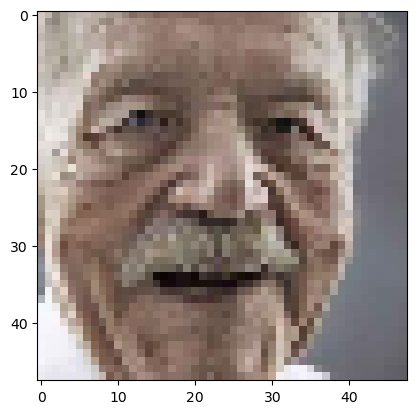

In [9]:
plt.imshow(images[0])

In [10]:
print(ages[20])

10


In [11]:
print(genders[30])

0


### Saving images array, ages and genders array in the system

In [12]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [13]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

### Finding No. of Male and Female samples

In [14]:
values, counts = np.unique(genders_f, return_counts= True)
print(counts)

[12391 11317]


### Plotting No. of Male and Female Samples

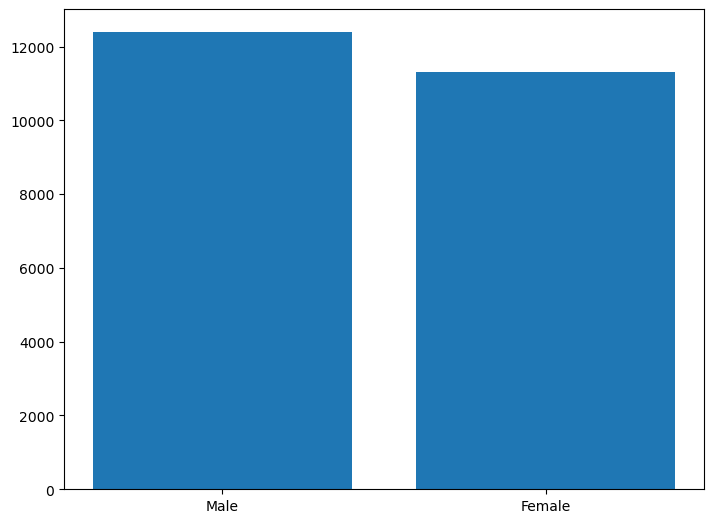

In [15]:
fig = plt.figure()
ax= fig.add_axes([0,0,1,1])
gender = ['Male','Female']
values = [12391,11317]
ax.bar(gender,values)
plt.show()

### Finding the No.of samples in each age

In [16]:
values, counts = np.unique(ages_f, return_counts= True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


### Converting Age counts to lists

In [17]:
val = values.tolist()
cnt = counts.tolist()

### Plotting the samples Agewise

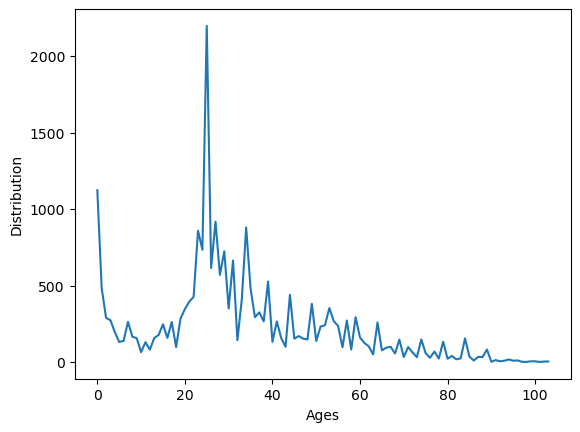

In [18]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [19]:
labels =[]
i=0
while i<len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

### Creating another list of images from existing one

In [20]:
images_f_2 = images_f/255

In [21]:
images_f_2.shape

(23708, 48, 48, 3)

In [22]:
labels_f = np.array(labels)

### Splitting the Dataset into test and train

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)

In [25]:
Y_train[0:5]

array([[20,  0],
       [23,  1],
       [ 2,  1],
       [36,  1],
       [47,  0]])

### Splitting 'Y_test' and 'Y_train' further

In [26]:
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]

In [27]:
Y_train_2[0][0:5]

array([0, 1, 1, 1, 0])

In [28]:
Y_train_2[1][0:5]

array([20, 23,  2, 36, 47])

### Define the Model

In [29]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [30]:
def create_model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='gender_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss={"gender_out": "binary_crossentropy", "age_out": "mae"},optimizer="Adam",metrics={"gender_out": "accuracy", "age_out": "accuracy"})
    return model

In [31]:
Model=create_model((48, 48, 3))

In [32]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

### Initializing the Model

In [34]:
fle_s='Age_Gender_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [37]:
History = Model.fit(X_train,Y_train_2, batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - age_out_accuracy: 0.0420 - gender_out_accuracy: 0.7013 - loss: 12.7742
Epoch 1: val_loss improved from 15.28398 to 13.13234, saving model to Age_Gender_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 53s 189ms/step - age_out_accuracy: 0.0420 - gender_out_accuracy: 0.7014 - loss: 12.7724 - val_age_out_accuracy: 0.0309 - val_gender_out_accuracy: 0.7373 - val_loss: 13.1323
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - age_out_accuracy: 0.0325 - gender_out_accuracy: 0.7503 - loss: 10.8728
Epoch 2: val_loss improved from 13.13234 to 13.00842, saving model to Age_Gender_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 50s 178ms/step - age_out_accuracy: 0.0325 - gender_out_accuracy: 0.7503 - loss: 10.8724 - val_age_out_accuracy: 0.0391 - val_gender_out_accuracy: 0.7911 - val_loss: 13.0084
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - age_out_accuracy: 0.0443 - gender_out_accuracy: 0.7886 - loss: 10.1009
Epoch 3: val_loss 

278/278 ━━━━━━━━━━━━━━━━━━━━ 58s 209ms/step - age_out_accuracy: 0.0478 - gender_out_accuracy: 0.8792 - loss: 7.4721 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8770 - val_loss: 8.9599
Epoch 19/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - age_out_accuracy: 0.0482 - gender_out_accuracy: 0.8839 - loss: 7.3157
Epoch 19: val_loss did not improve from 7.46850
278/278 ━━━━━━━━━━━━━━━━━━━━ 57s 204ms/step - age_out_accuracy: 0.0482 - gender_out_accuracy: 0.8839 - loss: 7.3161 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8770 - val_loss: 9.4674
Epoch 20/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - age_out_accuracy: 0.0454 - gender_out_accuracy: 0.8834 - loss: 7.2583
Epoch 20: val_loss did not improve from 7.46850
278/278 ━━━━━━━━━━━━━━━━━━━━ 72s 168ms/step - age_out_accuracy: 0.0454 - gender_out_accuracy: 0.8834 - loss: 7.2587 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8787 - val_loss: 8.6821
Epoch 21/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 169

Epoch 37/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - age_out_accuracy: 0.0484 - gender_out_accuracy: 0.9034 - loss: 6.5441
Epoch 37: val_loss did not improve from 7.46850
278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step - age_out_accuracy: 0.0484 - gender_out_accuracy: 0.9034 - loss: 6.5442 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8922 - val_loss: 8.0546
Epoch 38/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - age_out_accuracy: 0.0473 - gender_out_accuracy: 0.9015 - loss: 6.4081
Epoch 38: val_loss did not improve from 7.46850
278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 172ms/step - age_out_accuracy: 0.0473 - gender_out_accuracy: 0.9015 - loss: 6.4086 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8881 - val_loss: 8.0700
Epoch 39/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - age_out_accuracy: 0.0478 - gender_out_accuracy: 0.9031 - loss: 6.5056
Epoch 39: val_loss did not improve from 7.46850
278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step - age_out_accuracy: 0.0478 -

278/278 ━━━━━━━━━━━━━━━━━━━━ 50s 179ms/step - age_out_accuracy: 0.0433 - gender_out_accuracy: 0.9137 - loss: 6.2313 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8900 - val_loss: 7.8506
Epoch 56/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - age_out_accuracy: 0.0490 - gender_out_accuracy: 0.9094 - loss: 6.1613
Epoch 56: val_loss did not improve from 7.46850
278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step - age_out_accuracy: 0.0490 - gender_out_accuracy: 0.9094 - loss: 6.1613 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8863 - val_loss: 8.2111
Epoch 57/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - age_out_accuracy: 0.0457 - gender_out_accuracy: 0.9092 - loss: 6.1974
Epoch 57: val_loss did not improve from 7.46850
278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 172ms/step - age_out_accuracy: 0.0457 - gender_out_accuracy: 0.9092 - loss: 6.1974 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8919 - val_loss: 8.4549
Epoch 58/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 161

Epoch 74/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - age_out_accuracy: 0.0440 - gender_out_accuracy: 0.9226 - loss: 5.9861
Epoch 74: val_loss did not improve from 7.46850
278/278 ━━━━━━━━━━━━━━━━━━━━ 49s 175ms/step - age_out_accuracy: 0.0440 - gender_out_accuracy: 0.9226 - loss: 5.9863 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8919 - val_loss: 7.7872
Epoch 75/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - age_out_accuracy: 0.0441 - gender_out_accuracy: 0.9280 - loss: 5.9521
Epoch 75: val_loss did not improve from 7.46850
278/278 ━━━━━━━━━━━━━━━━━━━━ 49s 175ms/step - age_out_accuracy: 0.0441 - gender_out_accuracy: 0.9280 - loss: 5.9523 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8920 - val_loss: 8.0376
Epoch 76/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - age_out_accuracy: 0.0453 - gender_out_accuracy: 0.9230 - loss: 5.8936
Epoch 76: val_loss did not improve from 7.46850
278/278 ━━━━━━━━━━━━━━━━━━━━ 49s 175ms/step - age_out_accuracy: 0.0453 -

278/278 ━━━━━━━━━━━━━━━━━━━━ 49s 178ms/step - age_out_accuracy: 0.0414 - gender_out_accuracy: 0.9309 - loss: 5.8857 - val_age_out_accuracy: 0.0483 - val_gender_out_accuracy: 0.8930 - val_loss: 7.9481


### Model Evaluation

In [41]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - age_out_accuracy: 0.0549 - gender_out_accuracy: 0.8777 - loss: 7.3706


[7.468496322631836, 0.048253752291202545, 0.8788594603538513]

In [42]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step


In [43]:
pred[1]

array([[27.304054],
       [21.792248],
       [26.671612],
       ...,
       [29.903461],
       [75.493645],
       [50.51605 ]], dtype=float32)

### Plotting the Loss

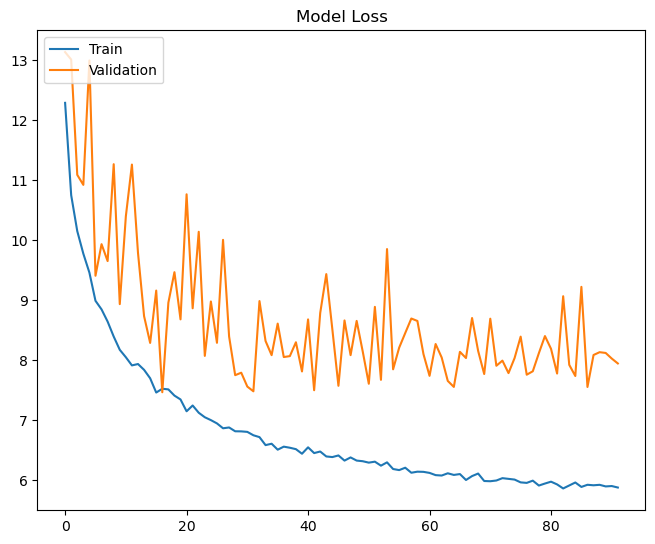

In [46]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

### Plotting Gender Accuracy

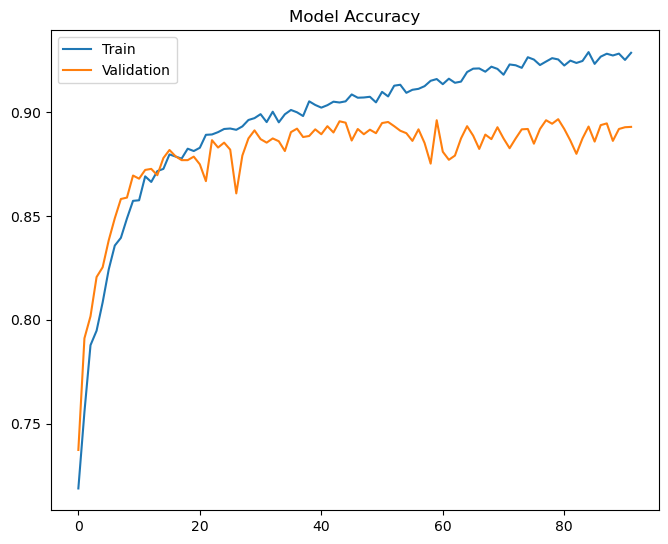

In [48]:
plt.plot(History.history['gender_out_accuracy'])
plt.plot(History.history['val_gender_out_accuracy'])
plt.title("Model Accuracy")
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

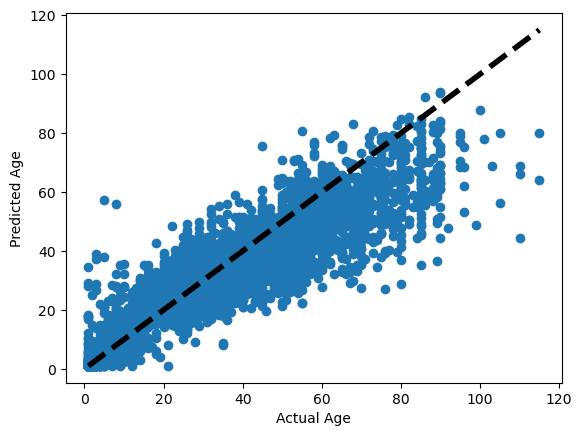

In [54]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(), Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()


### Making Report of Model (Gender only)

In [72]:
i=0
pred_l=[]
while(i<len(pred[0])):
    pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [74]:
report = classification_report(Y_test_2[0],pred_l)

In [75]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      3092
           1       0.85      0.91      0.88      2835

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



In [76]:
result = confusion_matrix(Y_test_2[0],pred_l)

<Axes: >

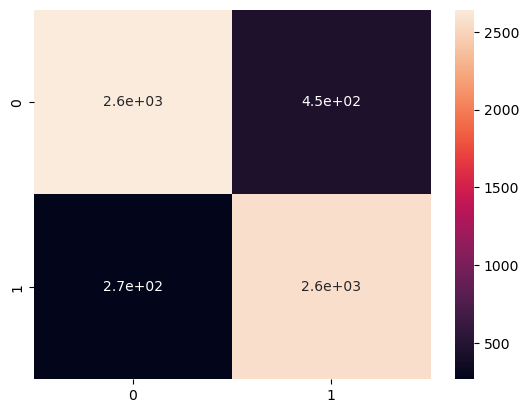

In [77]:
import seaborn as sns
sns.heatmap(result,annot=True)

In [78]:
import warnings
warnings.filterwarnings('ignore')

### Testing image

In [79]:
def test_image(ind,imagess_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    gender_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    gender = int(np.round(pred_l[0][0]))
    print('Age: '+str(age))
    print('gender: '+gender_f[gender])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Age: 11
gender: Male


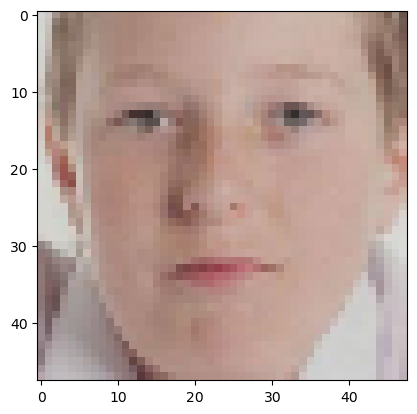

In [101]:
test_image(875,images_f,images_f_2,Model)